In [1]:
import os
import datetime
import pandas as pd
import numpy as np
from scipy.stats import linregress
import seaborn as sns
import copy
from IPython.display import display

import matplotlib.pyplot as plt
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = 20, 16
plt.style.use('ggplot')

/usr/local/lib/python3.5/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
experiment_files = ['../results/2_output.csv', '../results/3_output.csv', '../results/4_output.csv', '../results/1_output.csv']
hive_names = ['Cohort 1', 'Cohort 2', 'Normal Hive 1', 'Normal Hive 2']

experiment_df_list = []
for file in experiment_files:
    df = pd.read_csv(file, comment='#', header = 0)
    experiment_df_list.append(df)

print(experiment_df_list[0].dtypes)
print(experiment_df_list[0]['result_type'].unique())

experiment_df_list[0]

day_num                                  int64
diff_mean_all_tracked_speeds           float64
diff_mean_clustering                   float64
diff_mean_density                      float64
diff_mean_min_tracked_speeds           float64
diff_mean_node_degree                  float64
diff_median_all_tracked_speeds         float64
diff_median_clustering                 float64
diff_median_density                    float64
diff_median_min_tracked_speeds         float64
diff_median_node_degree                float64
diff_percent_idle_all_tracked          float64
diff_percent_idle_min_tracked          float64
diff_spread_all_tracked_all_xy         float64
diff_spread_all_tracked_individuals    float64
diff_spread_min_tracked_all_xy         float64
diff_spread_min_tracked_individuals    float64
mean_all_tracked_speeds                float64
mean_clustering                        float64
mean_density                           float64
mean_min_tracked_speeds                float64
mean_node_deg

day_num  diff_mean_all_tracked_speeds  diff_mean_clustering  \
0            0                      3.020365              0.138153   
1            0                           NaN                   NaN   
2            0                      4.302984              0.138153   
3            0                           NaN                   NaN   
4            0                      3.200401              0.138153   
5            0                           NaN                   NaN   
6            0                           NaN              0.138153   
7            0                           NaN                   NaN   
8            0                      3.727570              0.138153   
9            0                           NaN                   NaN   
10           0                     -0.117888              0.003234   
11           0                           NaN                   NaN   
12           0                      0.040428              0.003234   
13           0                           NaN                   NaN   
14           0                      0.058301              0.003234   
15           0                           NaN                   NaN   
16           0                           NaN              0.003234   
17           0                           NaN                   NaN   
18           0                      0.007821              0.003234   
19           0                           NaN                   NaN   
20           0                      2.851845              0.128921   
21           0                           NaN                   NaN   
22           0                      4.296545              0.128921   
23           0                           NaN                   NaN   
24           0                      3.552326              0.128921   
25           0                           NaN                   NaN   
26           0                           NaN              0.128921   
27           0                           NaN                   NaN   
28           0                      3.807345              0.128921   
29           0                           NaN                   NaN   
...        ...                           ...                   ...   
26100       12                      1.334334             -0.241454   
26101       12                           NaN                   NaN   
26102       12                      4.818055             -0.241454   
26103       12                           NaN                   NaN   
26104       12                     -0.139286             -0.241454   
26105       12                           NaN                   NaN   
26106       12                     25.603128             -0.241454   
26107       12                           NaN                   NaN   
26108       12                      2.154449             -0.241454   
26109       12                           NaN                   NaN   
26110       12                      1.824125             -0.031081   
26111       12                           NaN                   NaN   
26112       12                     -0.872108             -0.031081   
26113       12                           NaN                   NaN   
26114       12                      1.777568             -0.031081   
26115       12                           NaN                   NaN   
26116       12                     -5.956049             -0.031081   
26117       12                           NaN                   NaN   
26118       12                     -0.244113             -0.031081   
26119       12                           NaN                   NaN   
26120       12                      2.679168             -0.248998   
26121       12                           NaN                   NaN   
26122       12                      5.223885             -0.248998   
26123       12                           NaN                   NaN   
26124       12                      2.427910             -0.248998   
26125       12   

In [3]:
real_result_df_list = []
shuffled_result_df_list = []
bootstrapped_result_df_list = []
for df in experiment_df_list:
    real_df = df[(df['result_type'] == 'real') & (df['tag_type'] == 'All')].reset_index()
    real_result_df_list.append(real_df)
    
    shuffled_df = df[(df['result_type'] == 'shuffled') & (df['tag_type'] == 'All')].reset_index()
    shuffled_result_df_list.append(shuffled_df)
    
    bootstrapped_df = df[(df['result_type'] == 'bootstrapped') & (df['tag_type'] == 'All')].reset_index()
    bootstrapped_result_df_list.append(bootstrapped_df)
    
real_result_df_list[0]
#shuffled_result_df_list[0]
#bootstrapped_result_df_list

index  day_num  diff_mean_all_tracked_speeds  diff_mean_clustering  \
0       8        0                      3.727570              0.138153   
1       9        0                           NaN                   NaN   
2    2018        1                      0.031370             -0.021842   
3    2019        1                           NaN                   NaN   
4    4028        2                      1.294042             -0.035528   
5    4029        2                           NaN                   NaN   
6    6038        3                     -0.100310              0.065866   
7    6039        3                           NaN                   NaN   
8    8048        4                      1.418010             -0.016678   
9    8049        4                           NaN                   NaN   
10  10058        5                      2.131969              0.046892   
11  10059        5                           NaN                   NaN   
12  12068        6                      2.390443              0.040072   
13  12069        6                           NaN                   NaN   
14  14078        7                      4.087537              0.080315   
15  14079        7                           NaN                   NaN   
16  16088        8                      3.223703              0.097598   
17  16089        8                           NaN                   NaN   
18  18098        9                      5.212056              0.082060   
19  18099        9                           NaN                   NaN   
20  20108       10                      6.610898              0.150634   
21  20109       10                           NaN                   NaN   
22  22118       11                      4.401962              0.135567   
23  22119       11                           NaN                   NaN   
24  24128       12                      2.034245             -0.242169   
25  24129       12                           NaN                   NaN   

    diff_mean_density  diff_mean_min_tracked_speeds  diff_mean_node_degree  \
0            0.010347                      3.732812               2.006401   
1                 NaN                           NaN                    NaN   
2           -0.006518                      0.034699              -0.664056   
3                 NaN                           NaN                    NaN   
4           -0.002035                      1.279400              -0.182699   
5                 NaN                           NaN                    NaN   
6           -0.000525                     -0.091905               0.442375   
7                 NaN                           NaN                    NaN   
8            0.001137                      1.382756               0.107075   
9                 NaN                           NaN                    NaN   
10           0.001399                      2.123229               0.348734   
11                NaN                           NaN                    NaN   
12           0.000378                      2.400184               0.231568   
13                NaN                           NaN                    NaN   
14          -0.000837                      4.138952               0.380590   
15                NaN                           NaN                    NaN   
16           0.001455                      3.282759               0.504733   
17                NaN                           NaN                    NaN   
18           0.003053                      5.243538               0.447041   
19                NaN                           NaN                    NaN   
20           0.006240                      6.634919               0.735584   
21                NaN                           NaN                    NaN   
22           0.003151                      4.427537               0.655859   
23                NaN                           NaN                    NaN   
24          -0.003239                      2.050252    

In [4]:
shuffled_permutations = []

for shuffled_df in shuffled_result_df_list:
    num_perms = int(len(shuffled_df[shuffled_df['day_num']==0]) / 2)
    empty_lists = [[] for i in range(num_perms)]
    permutations = {}
    for m in ['diff_spread_all_tracked_all_xy', 'diff_median_all_tracked_speeds', 'diff_median_density', 'diff_percent_idle_all_tracked']:
        permutations[m] = copy.deepcopy(empty_lists)
    #permutations = {'diff_spread_all_tracked_all_xy': copy.deepcopy(empty_lists)}

    days_nums_in_experiment = list(shuffled_df['day_num'].unique())
    days_nums_in_experiment.sort()
    for day_num in days_nums_in_experiment:
        day_num_df = shuffled_df[shuffled_df['day_num'] == day_num]
        night_df = day_num_df[day_num_df['time_period'] == 'night']
        #day_df = day_num_df[day_num_df['time_period'] == 'day']
        
        for metric in permutations.keys():
            night_metric = list(night_df[metric])
            #day_metric = list(day_df[metric])
            for i, group in enumerate(permutations[metric]):
                permutations[metric][i].append(night_metric[i])
                #permutations[metric][i].extend([night_metric[i], day_metric[i]])
        
    shuffled_permutations.append(permutations)
       
                                                
print(shuffled_permutations[0]['diff_spread_all_tracked_all_xy'][0])

[0.1837881265283112, -0.040117690770541621, -0.17633706936921278, 0.095144232074222401, -0.12788181637796292, 0.17385101392836333, 0.17605830151413038, 0.17619568833483967, 0.040446375936904033, 0.041797692274547771, -0.0046216161158518787, 0.2766907763992954, 0.93926691919052641]


Difference in Day and Night Percentage of Time Idle for All Bees Tracked (0.1, -0.1)


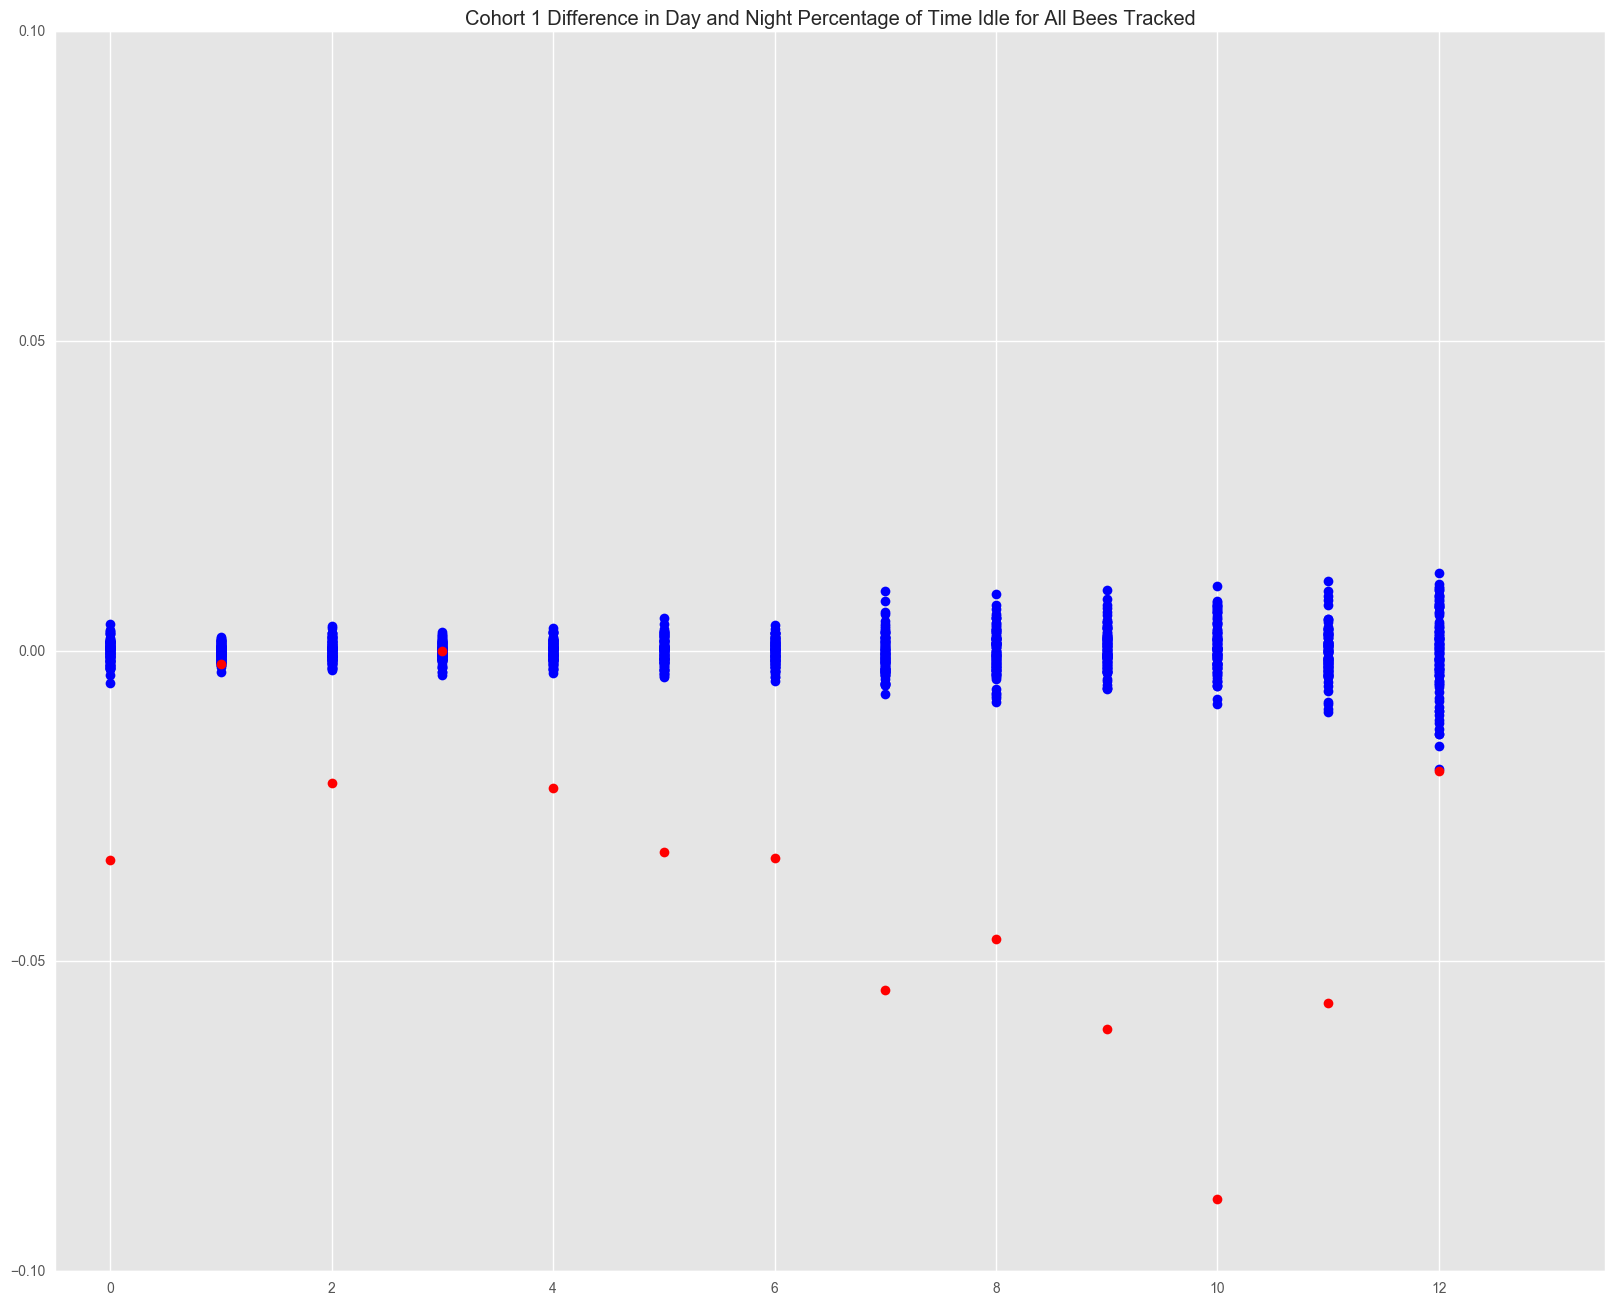

Difference in Day and Night Median Speed for All Bees Tracked (7.5, -2)


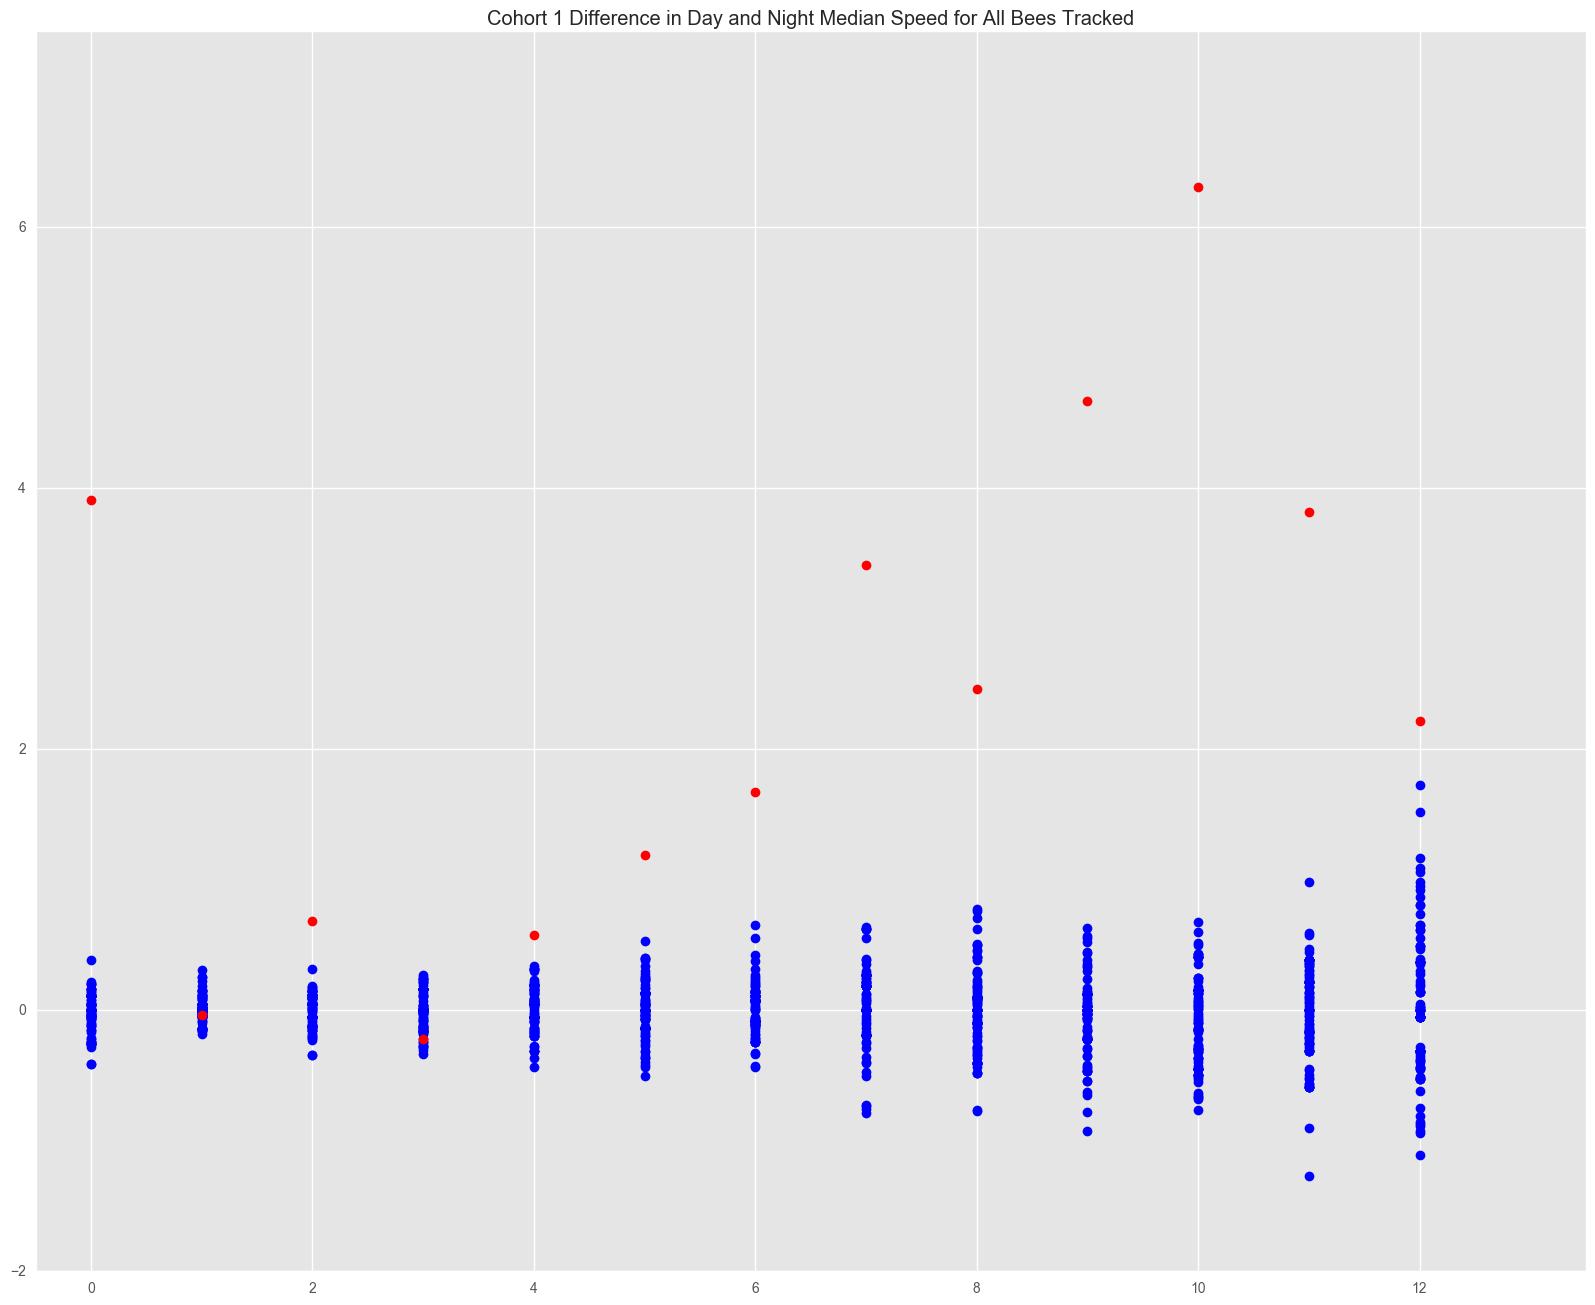

Difference in Day and Night Median Density for All Bees Tracked (0.15, -0.02)


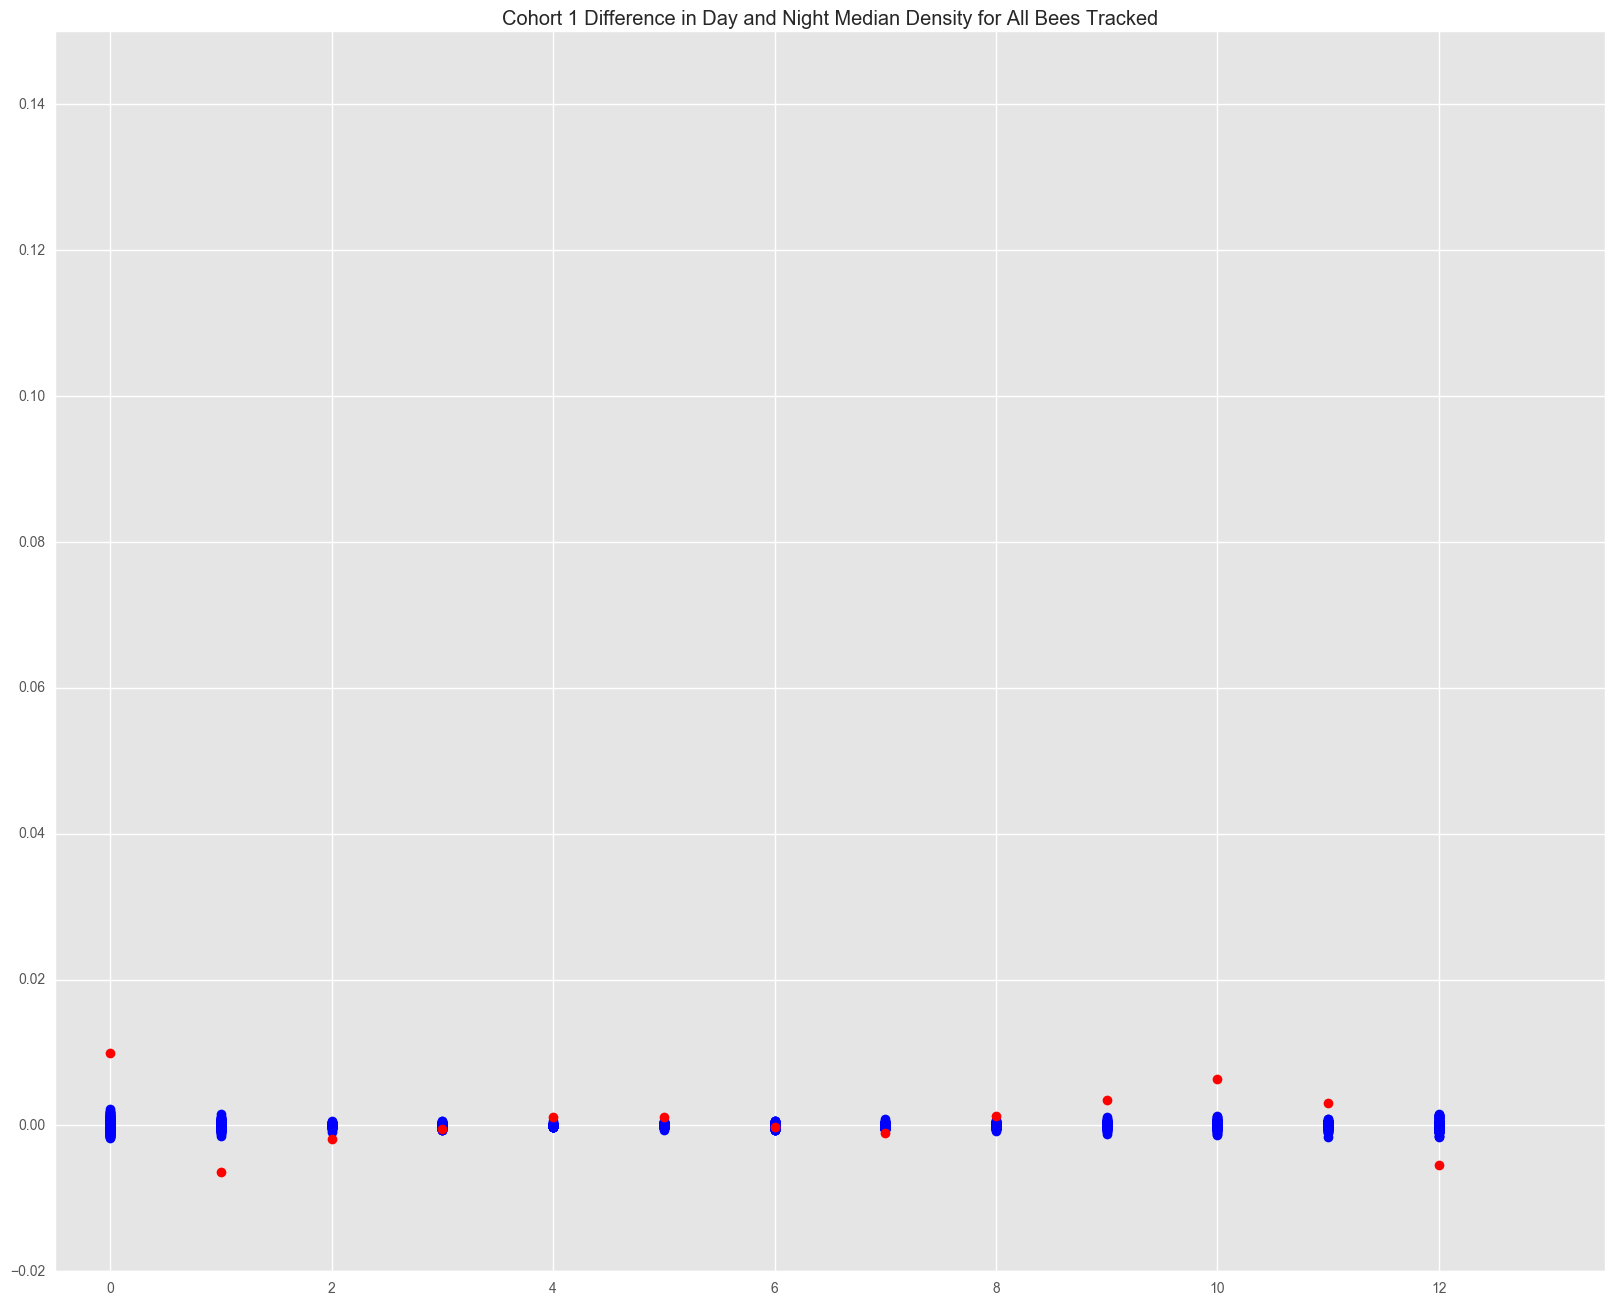

Difference in Day and Night Spread for All Bees Tracked (2, -3)


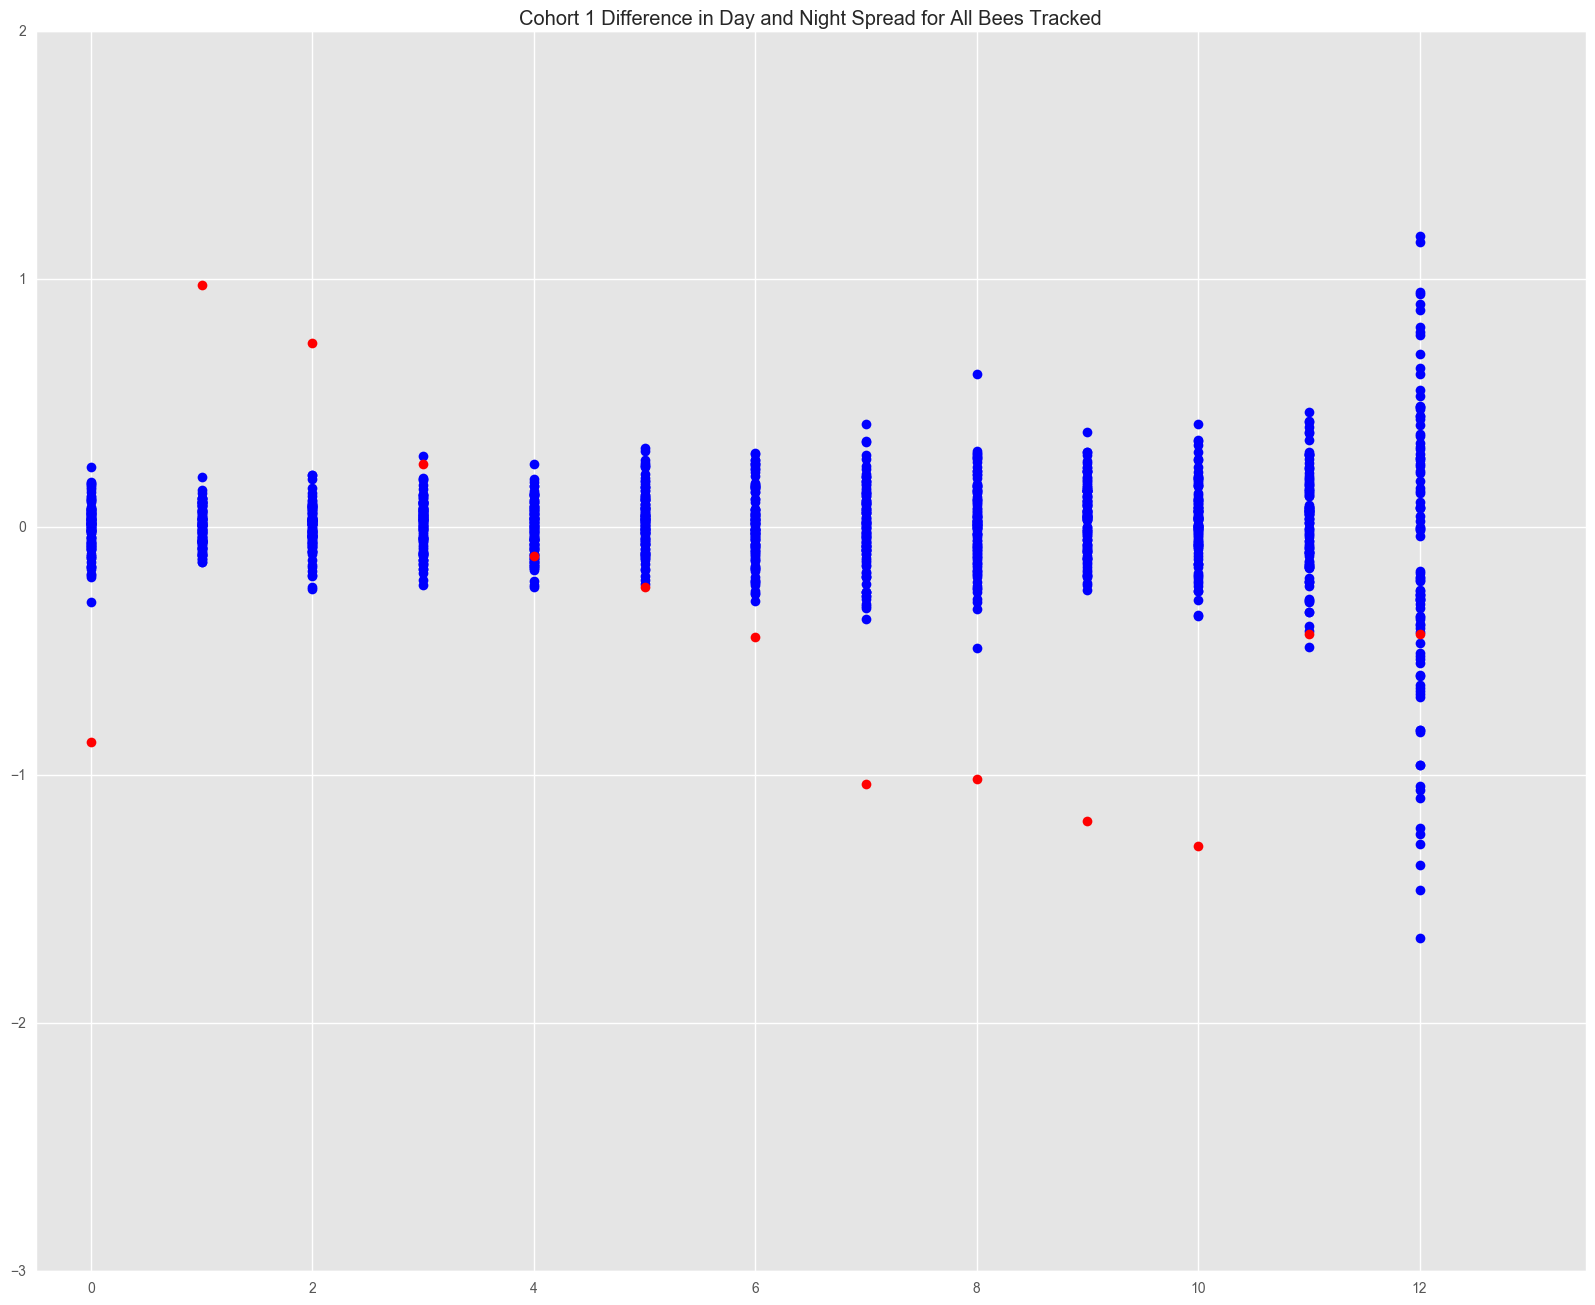

Difference in Day and Night Percentage of Time Idle for All Bees Tracked (0.1, -0.1)


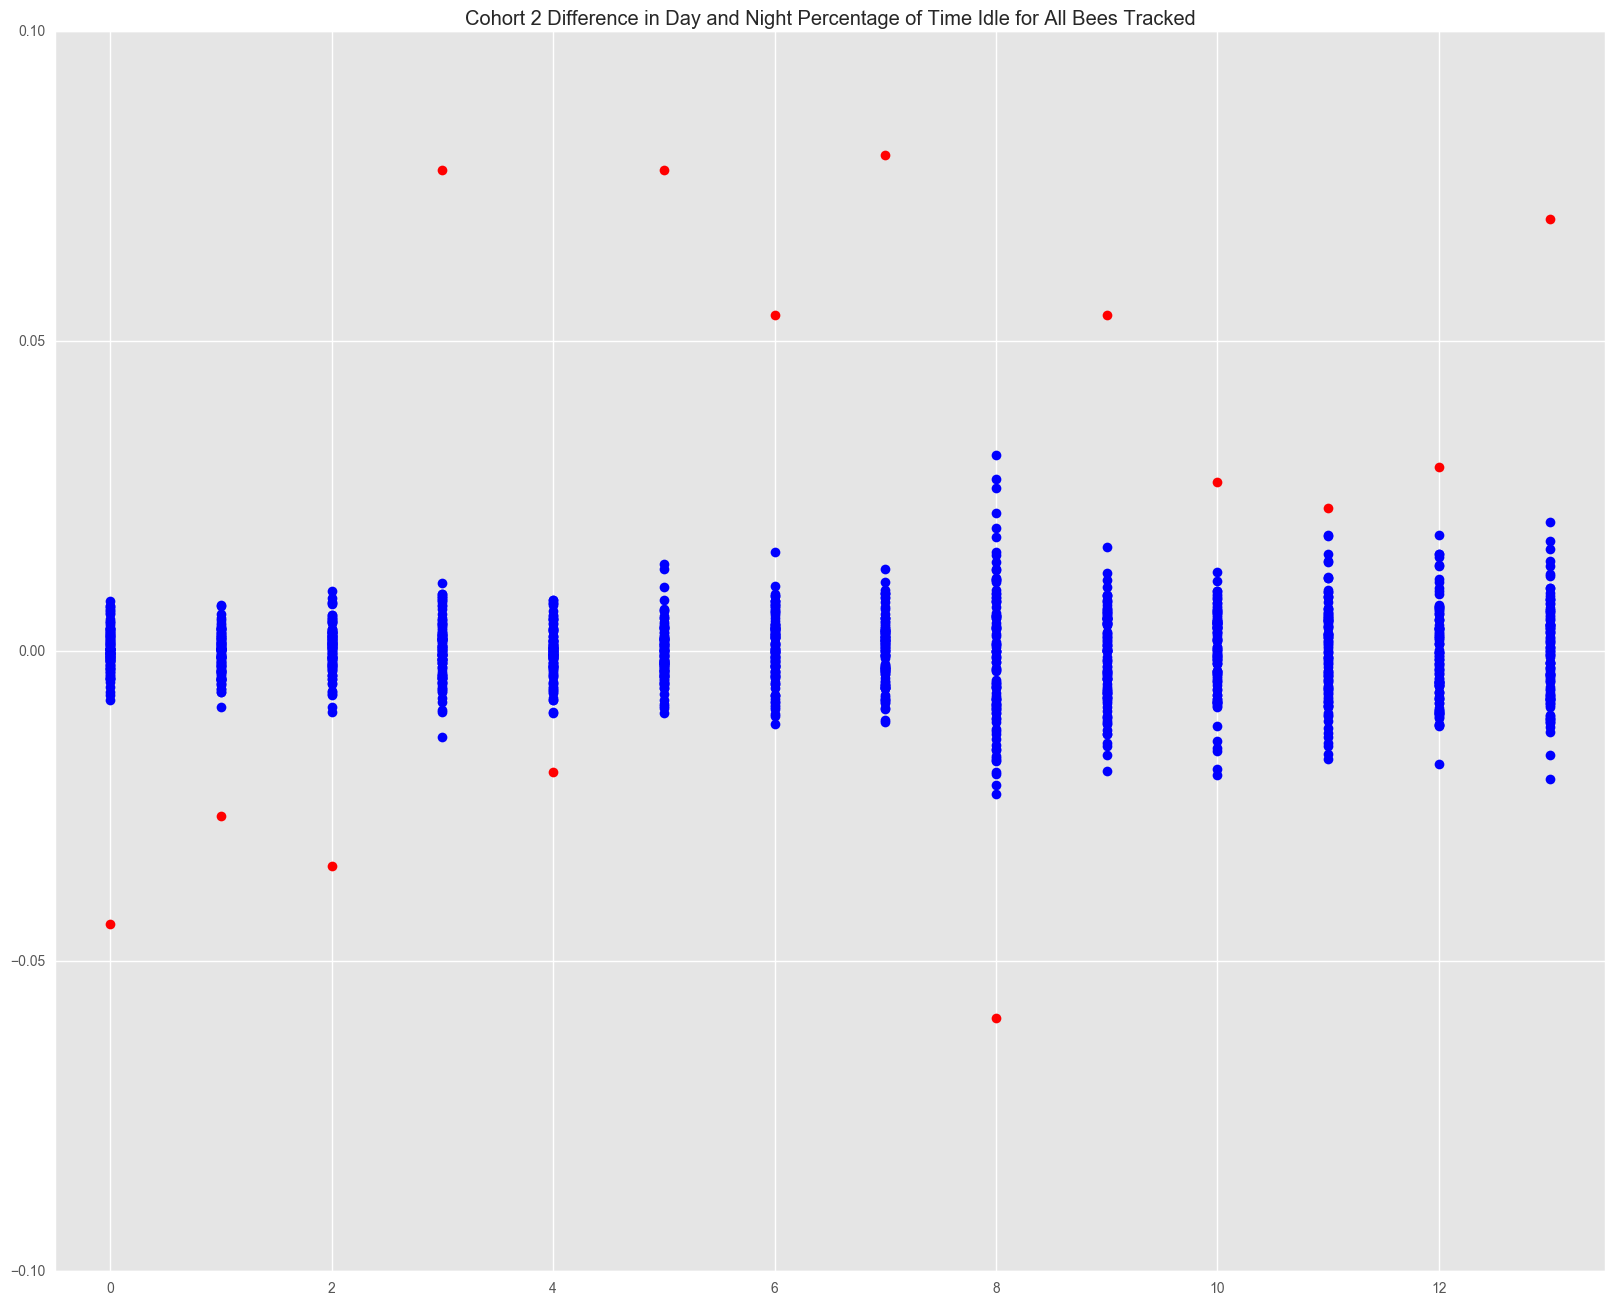

Difference in Day and Night Median Speed for All Bees Tracked (7.5, -2)


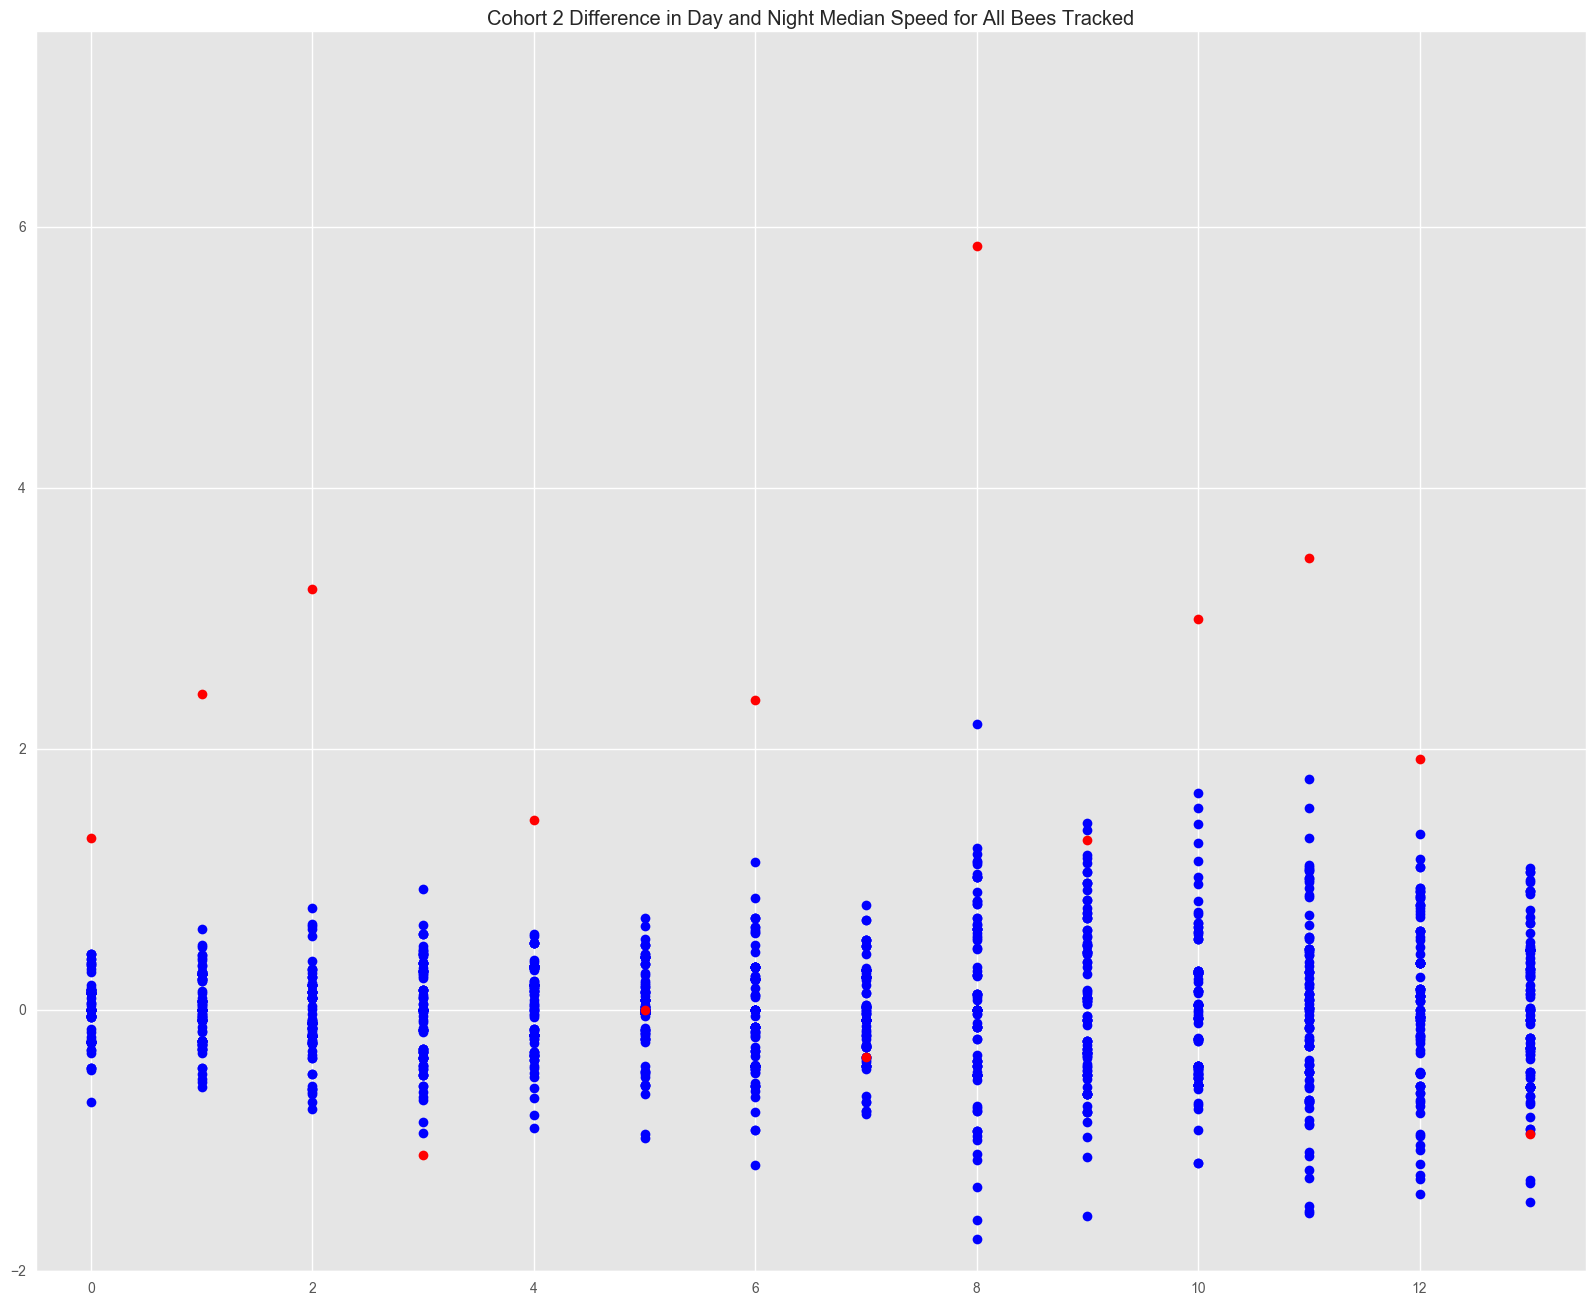

Difference in Day and Night Median Density for All Bees Tracked (0.15, -0.02)


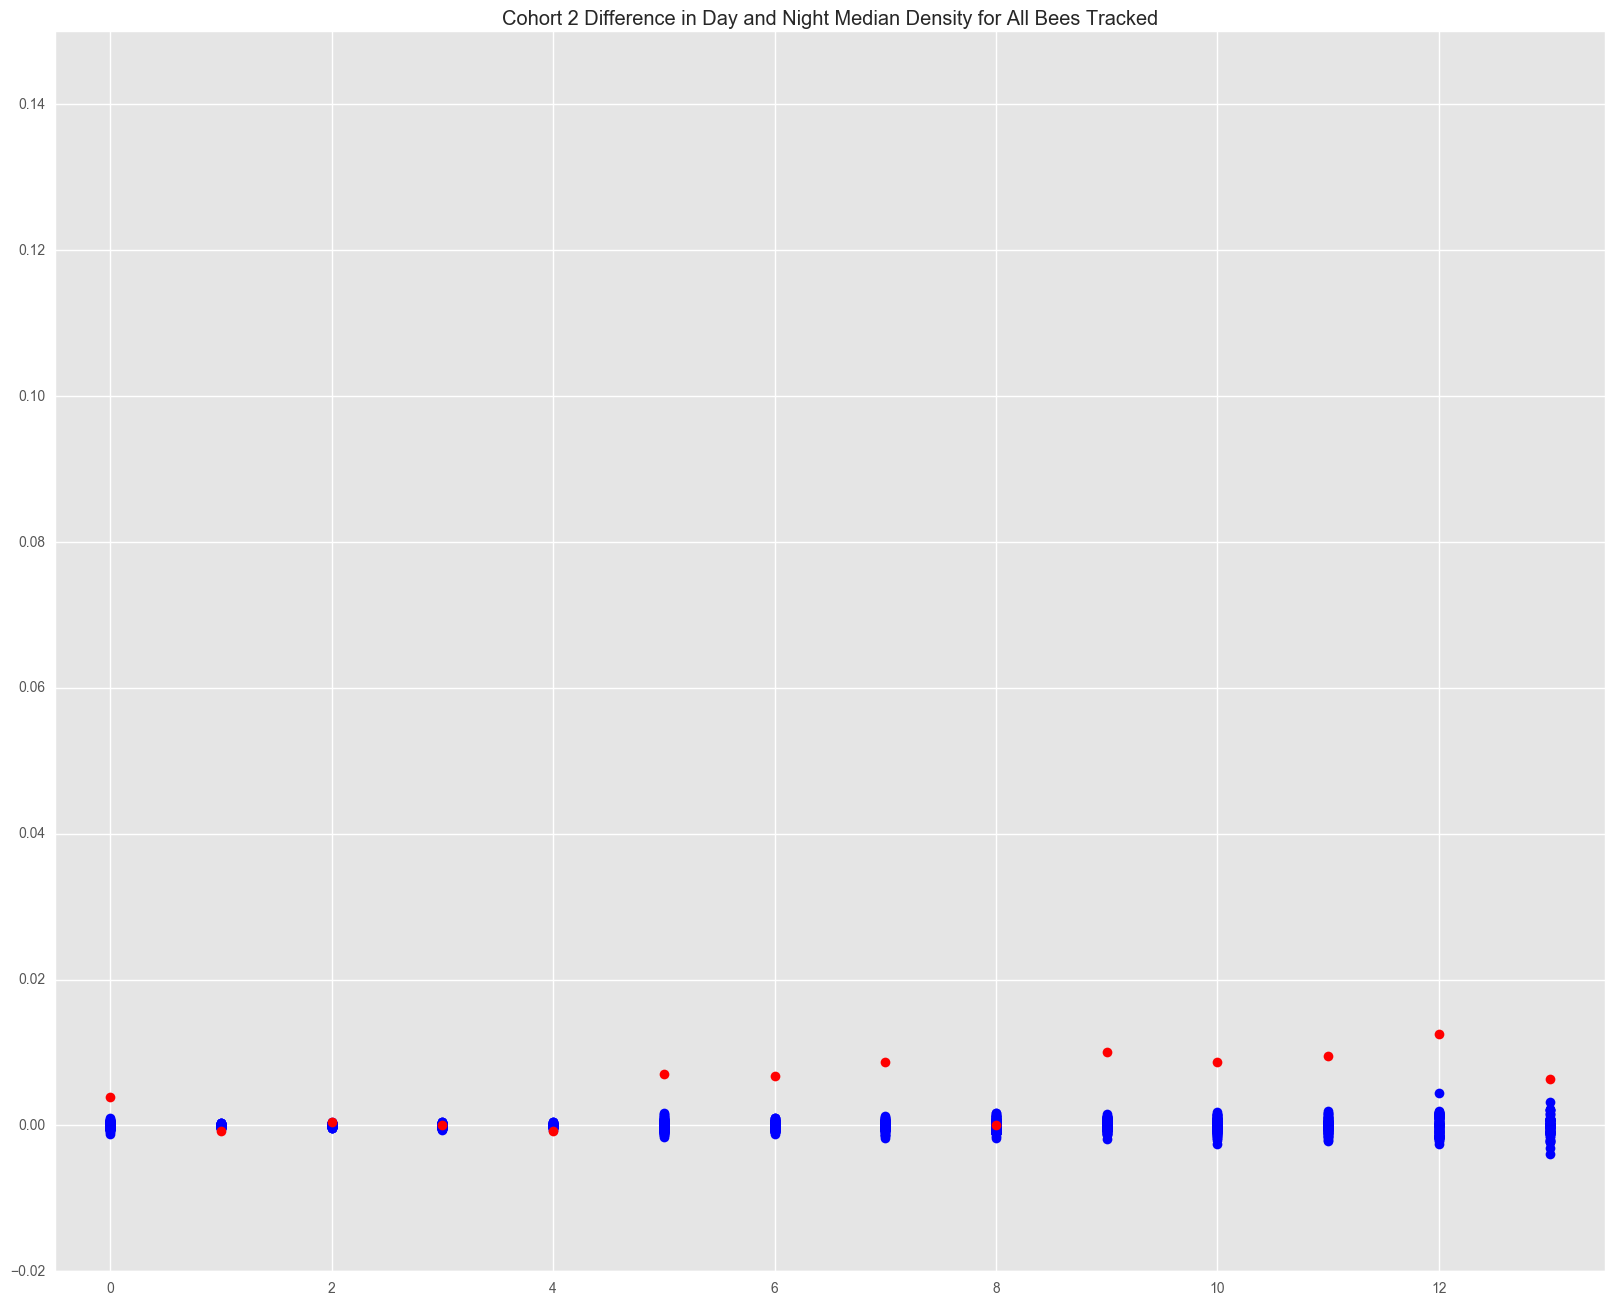

Difference in Day and Night Spread for All Bees Tracked (2, -3)


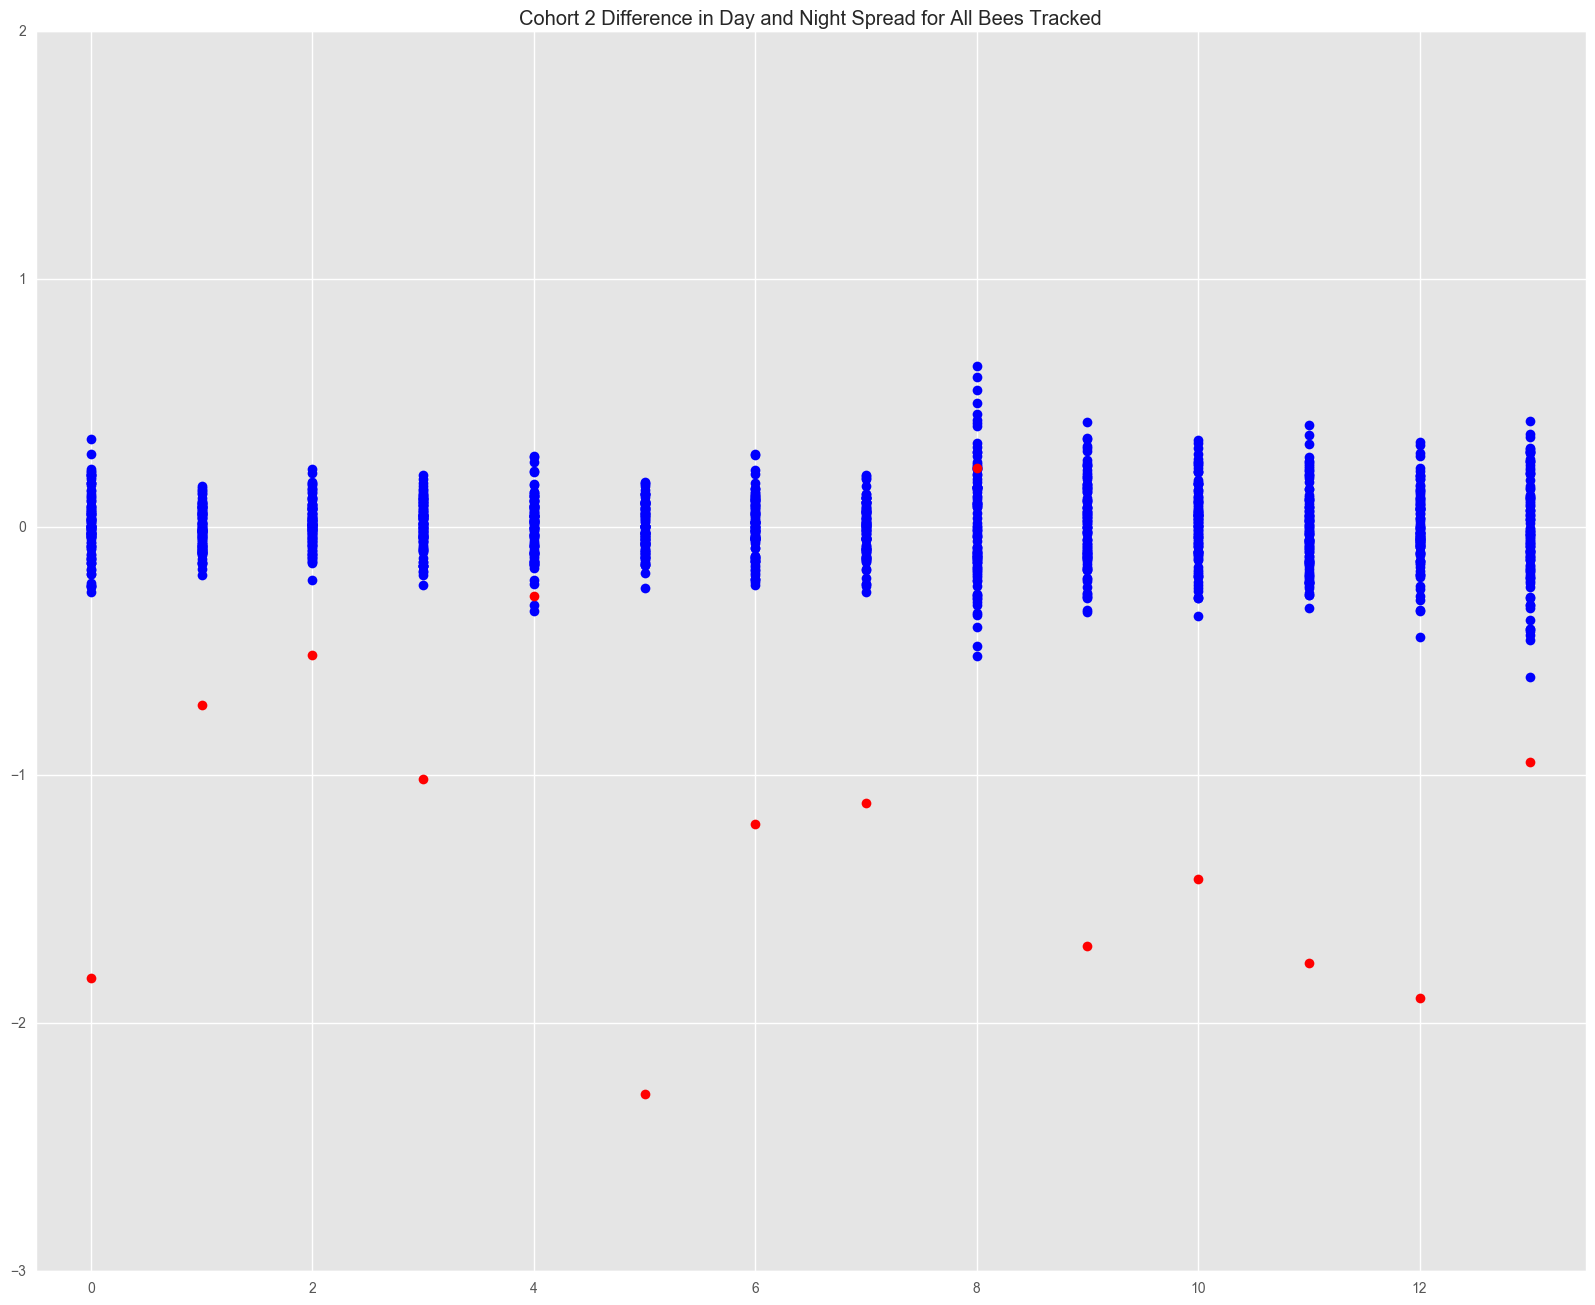

Difference in Day and Night Percentage of Time Idle for All Bees Tracked (0.1, -0.1)


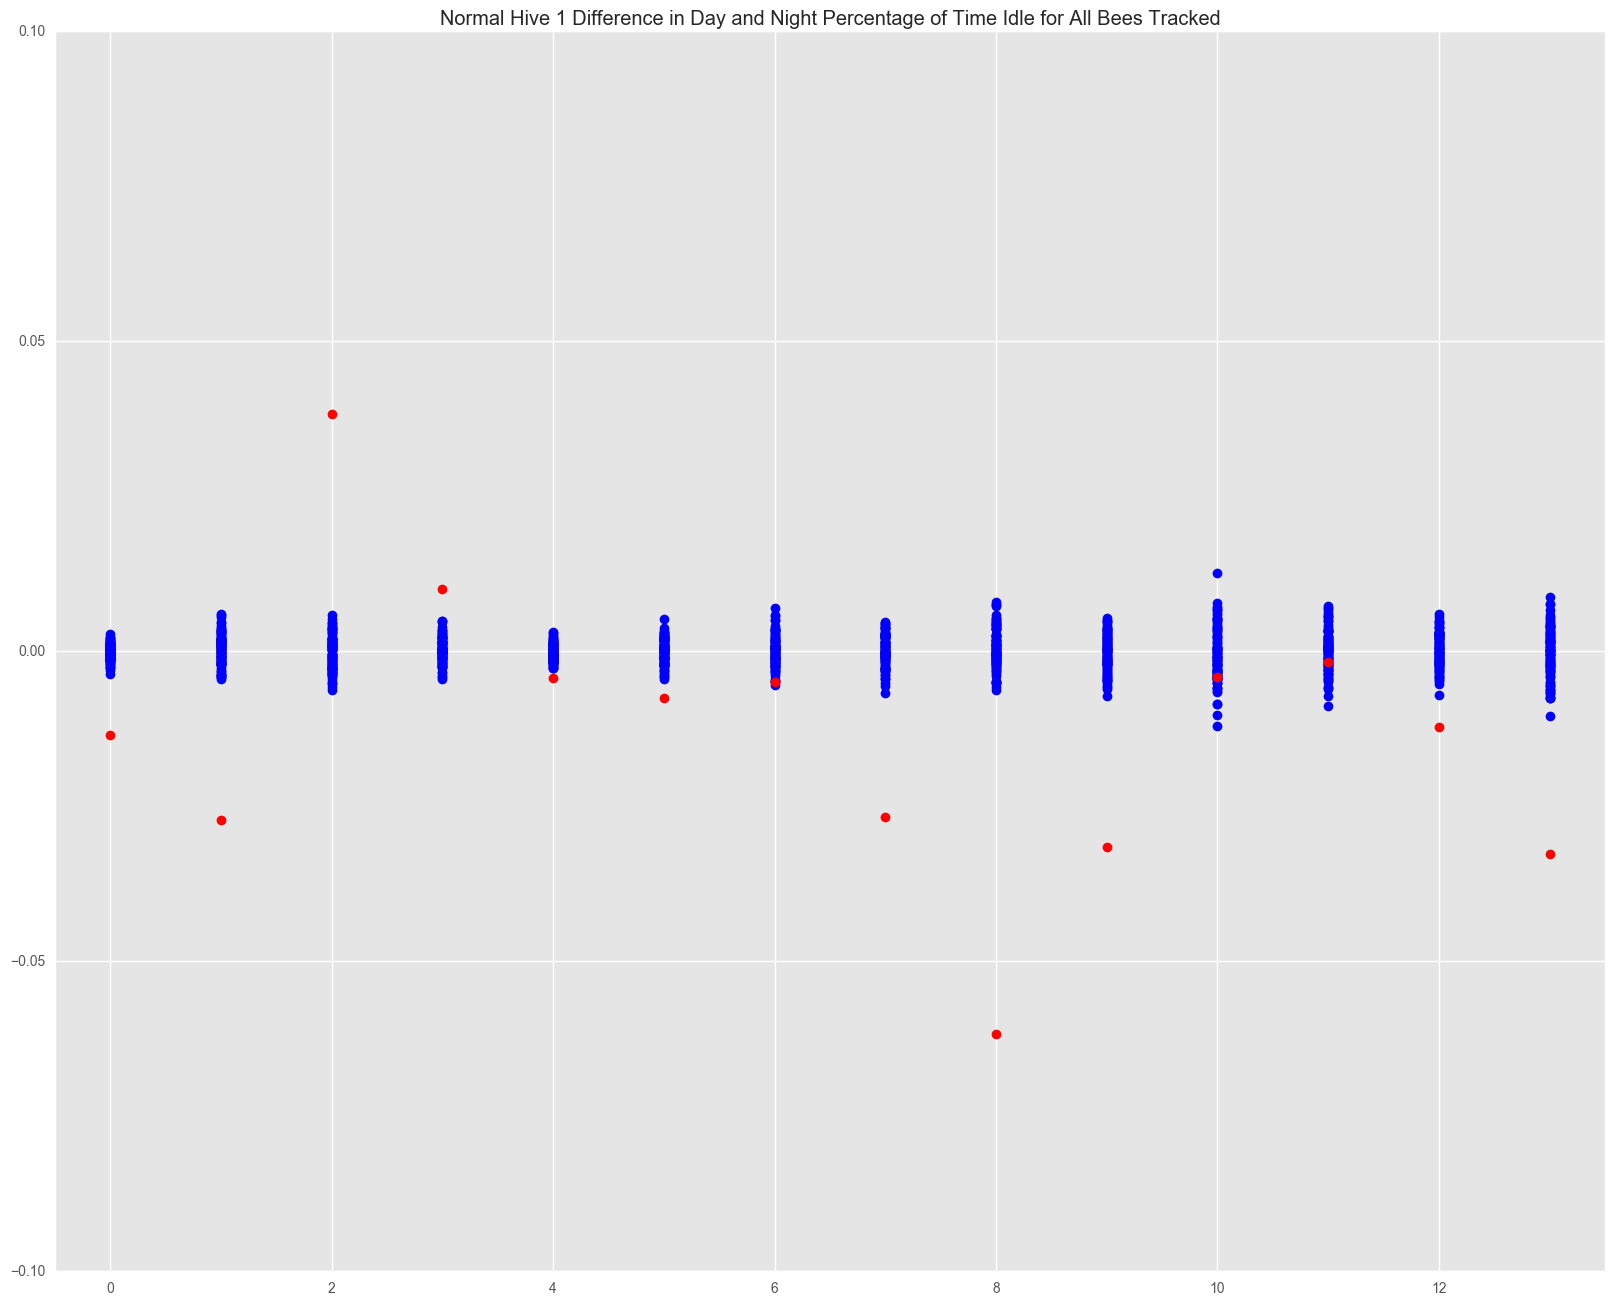

Difference in Day and Night Median Speed for All Bees Tracked (7.5, -2)


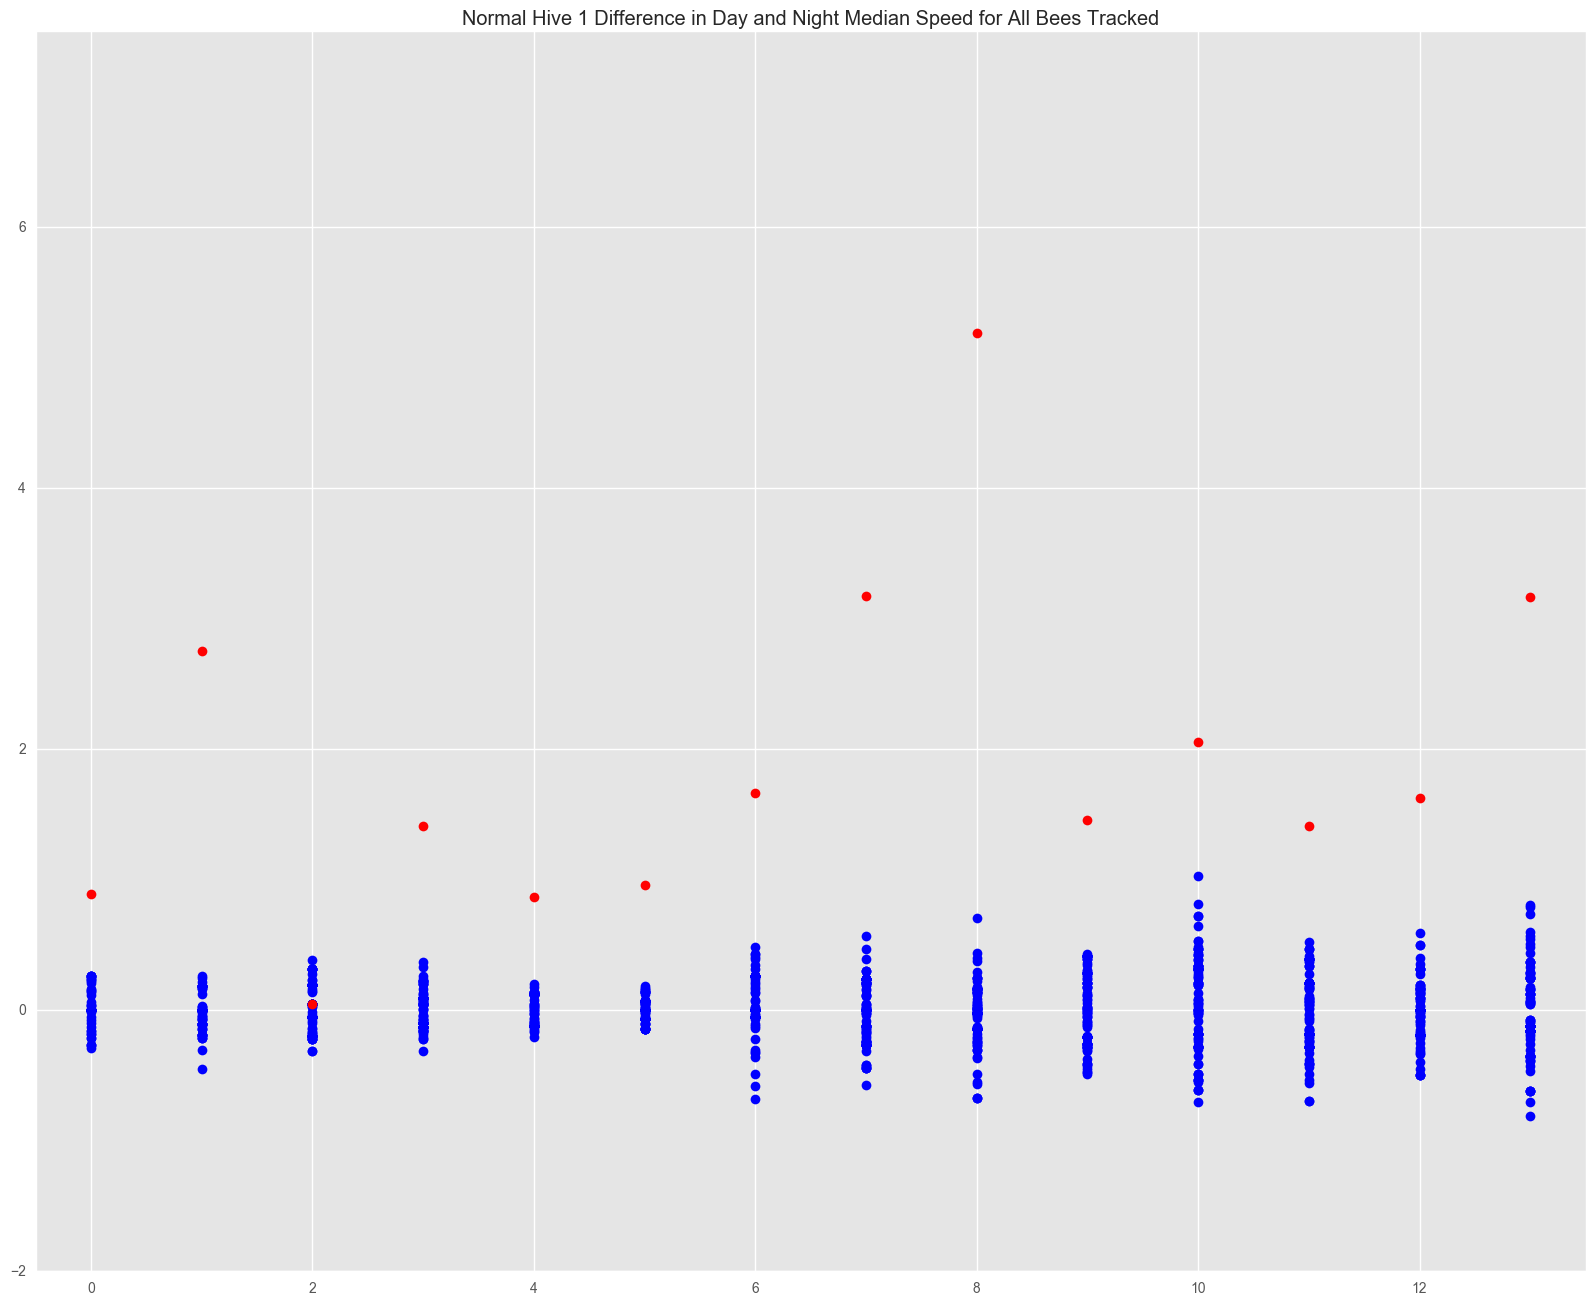

Difference in Day and Night Median Density for All Bees Tracked (0.15, -0.02)


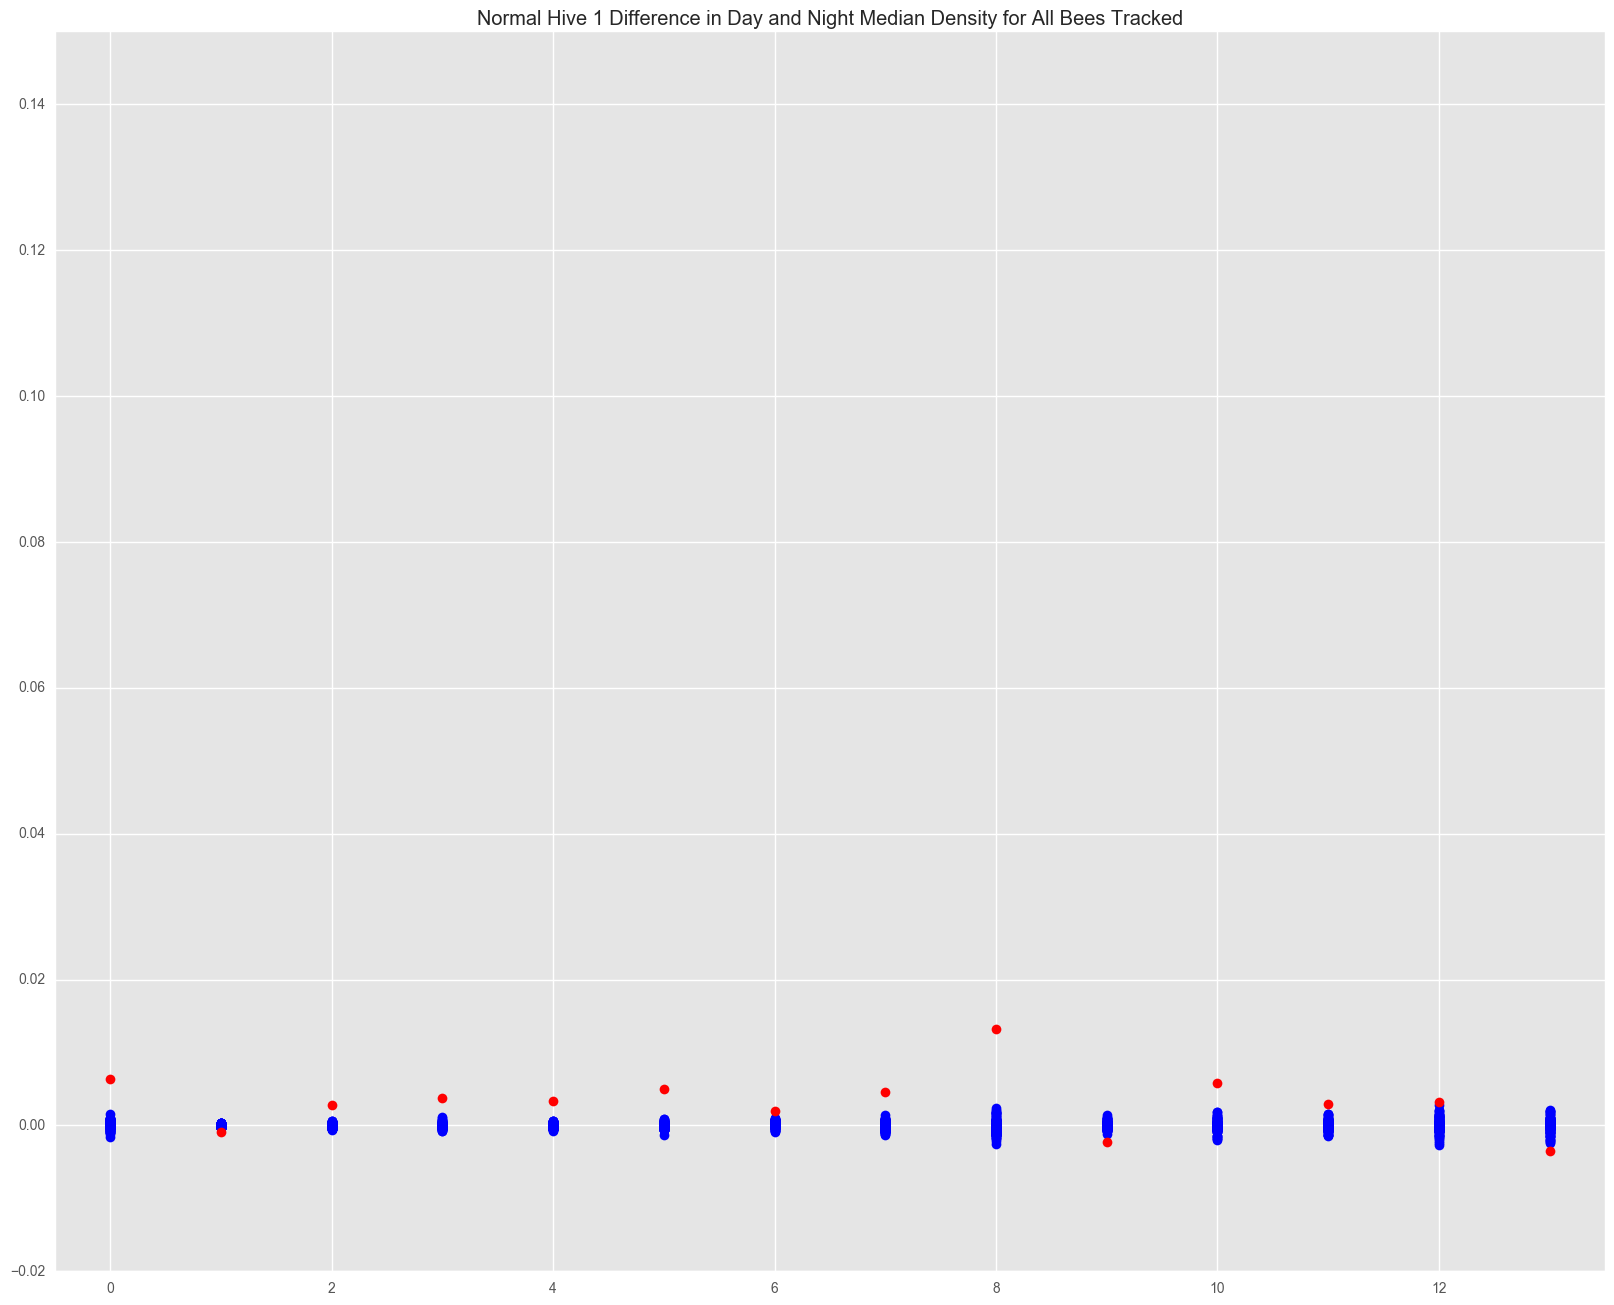

Difference in Day and Night Spread for All Bees Tracked (2, -3)


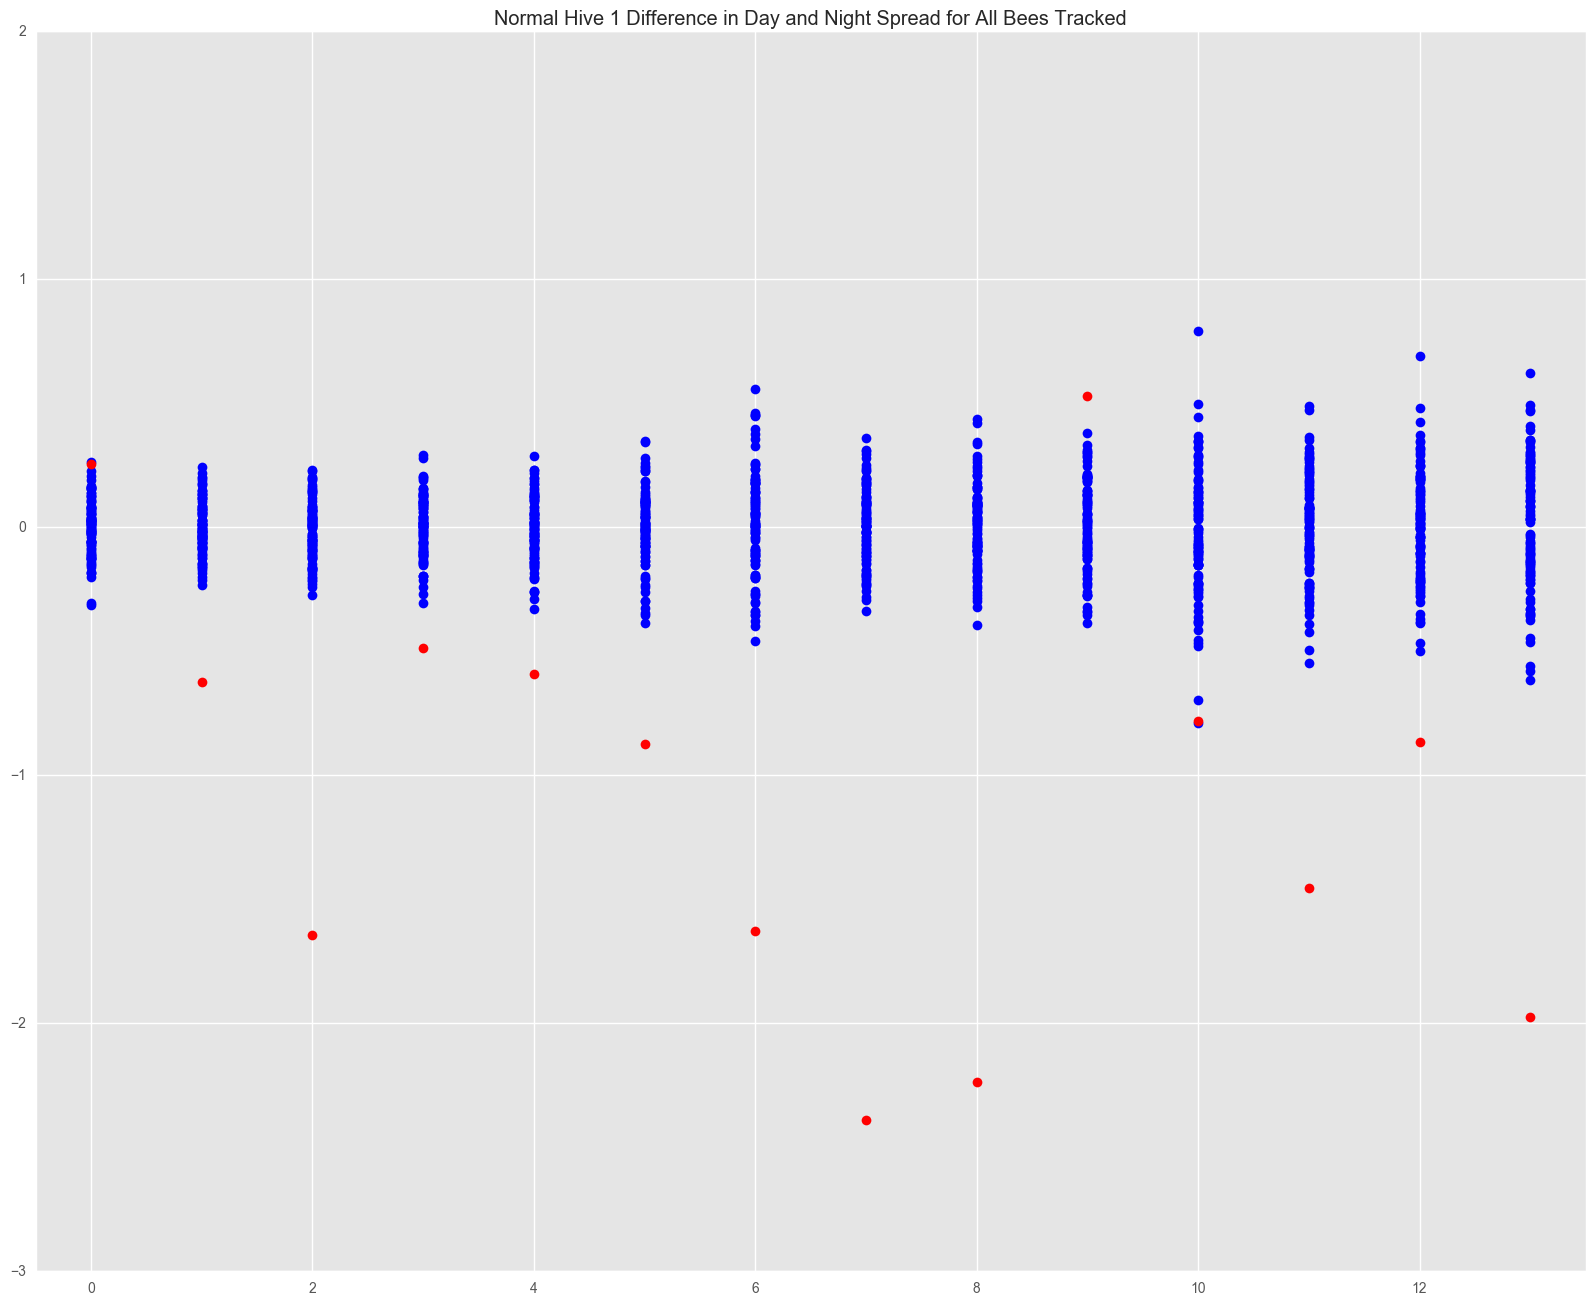

Difference in Day and Night Percentage of Time Idle for All Bees Tracked (0.1, -0.1)


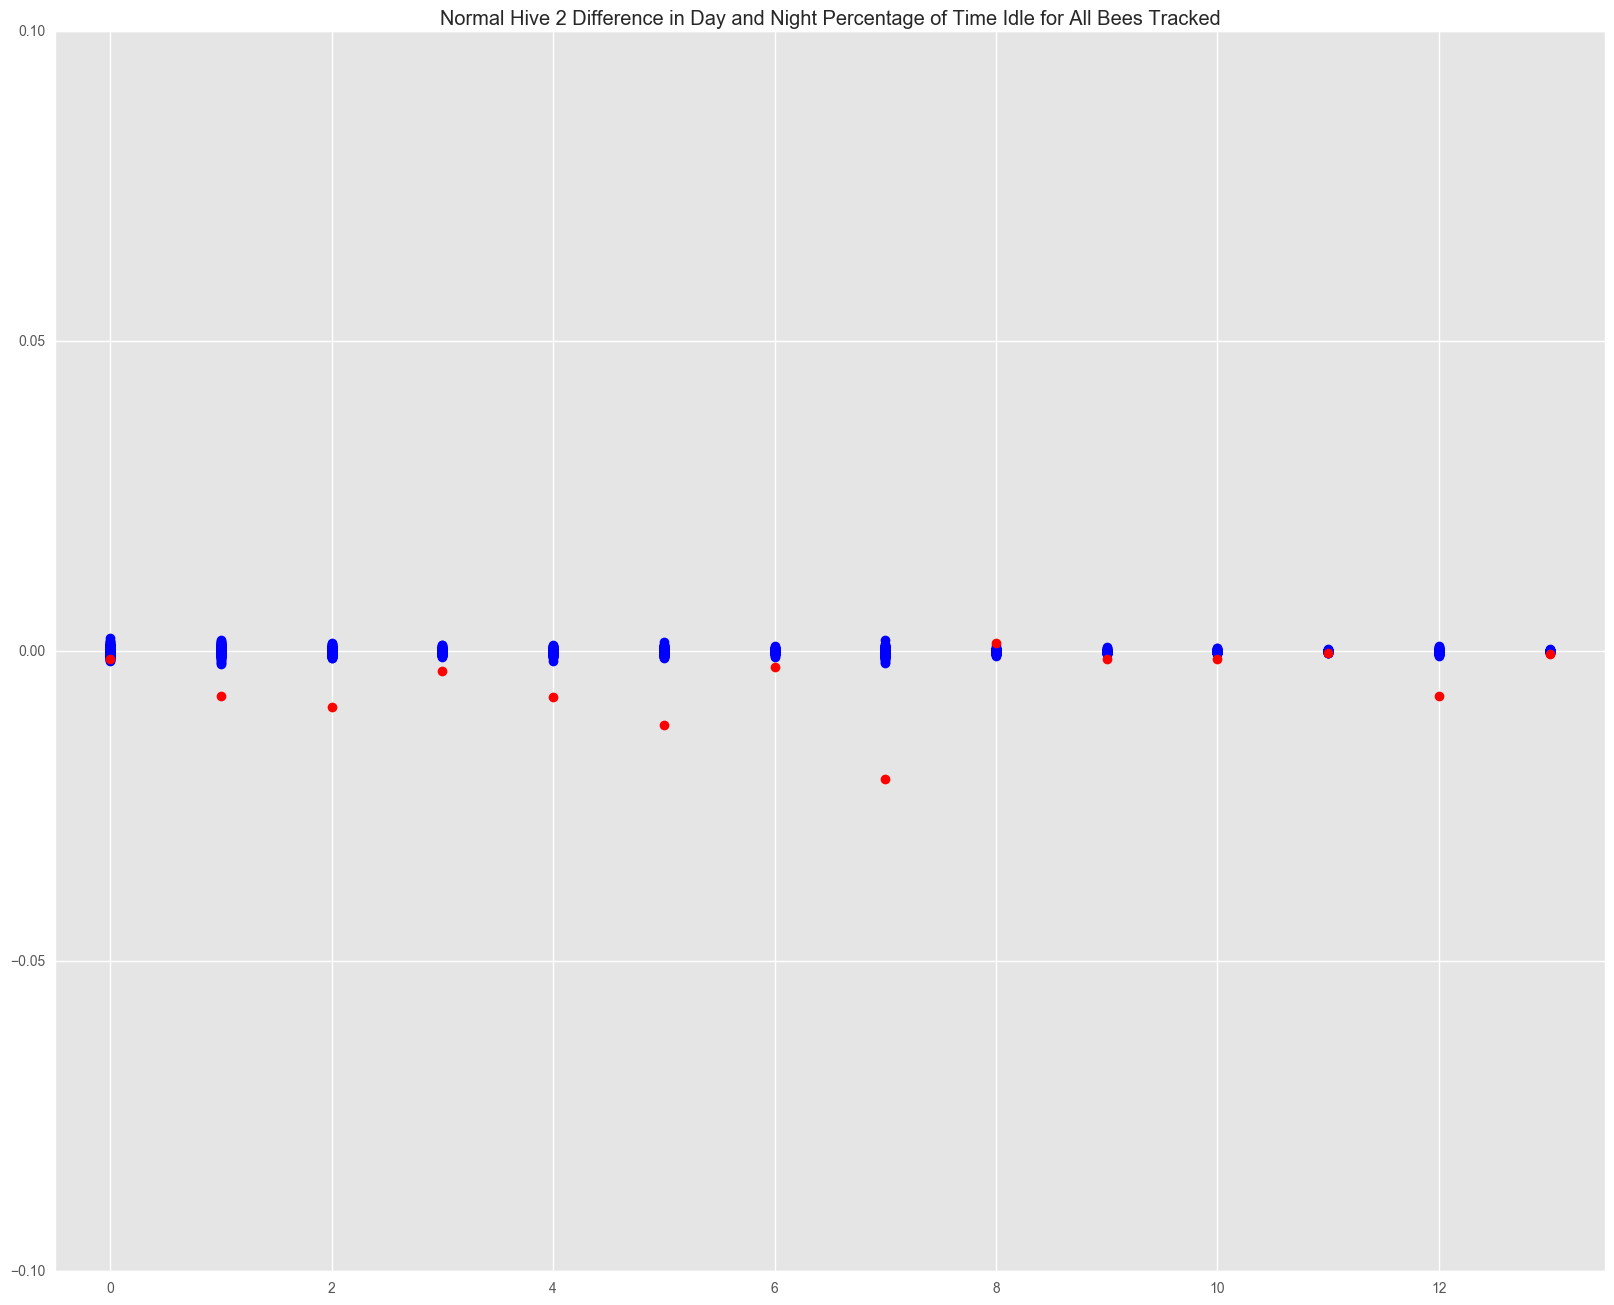

Difference in Day and Night Median Speed for All Bees Tracked (7.5, -2)


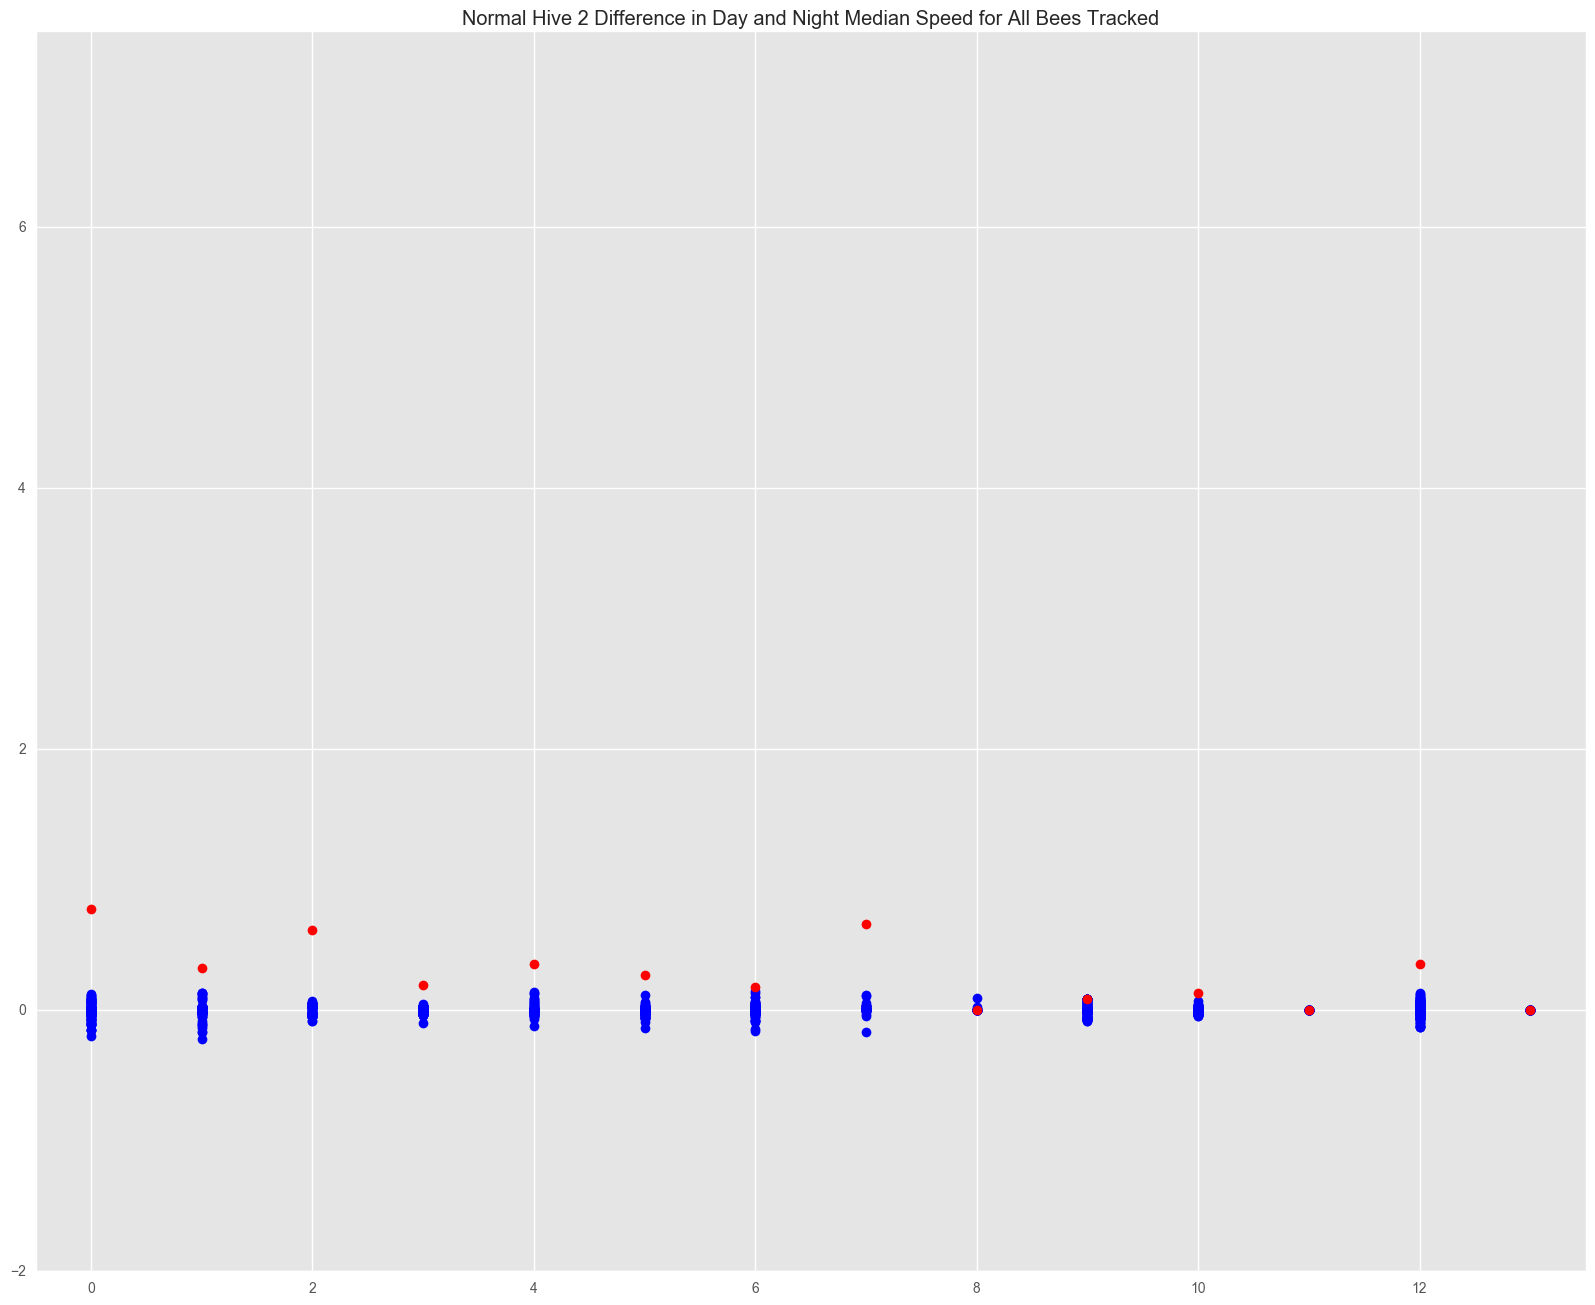

Difference in Day and Night Median Density for All Bees Tracked (0.15, -0.02)


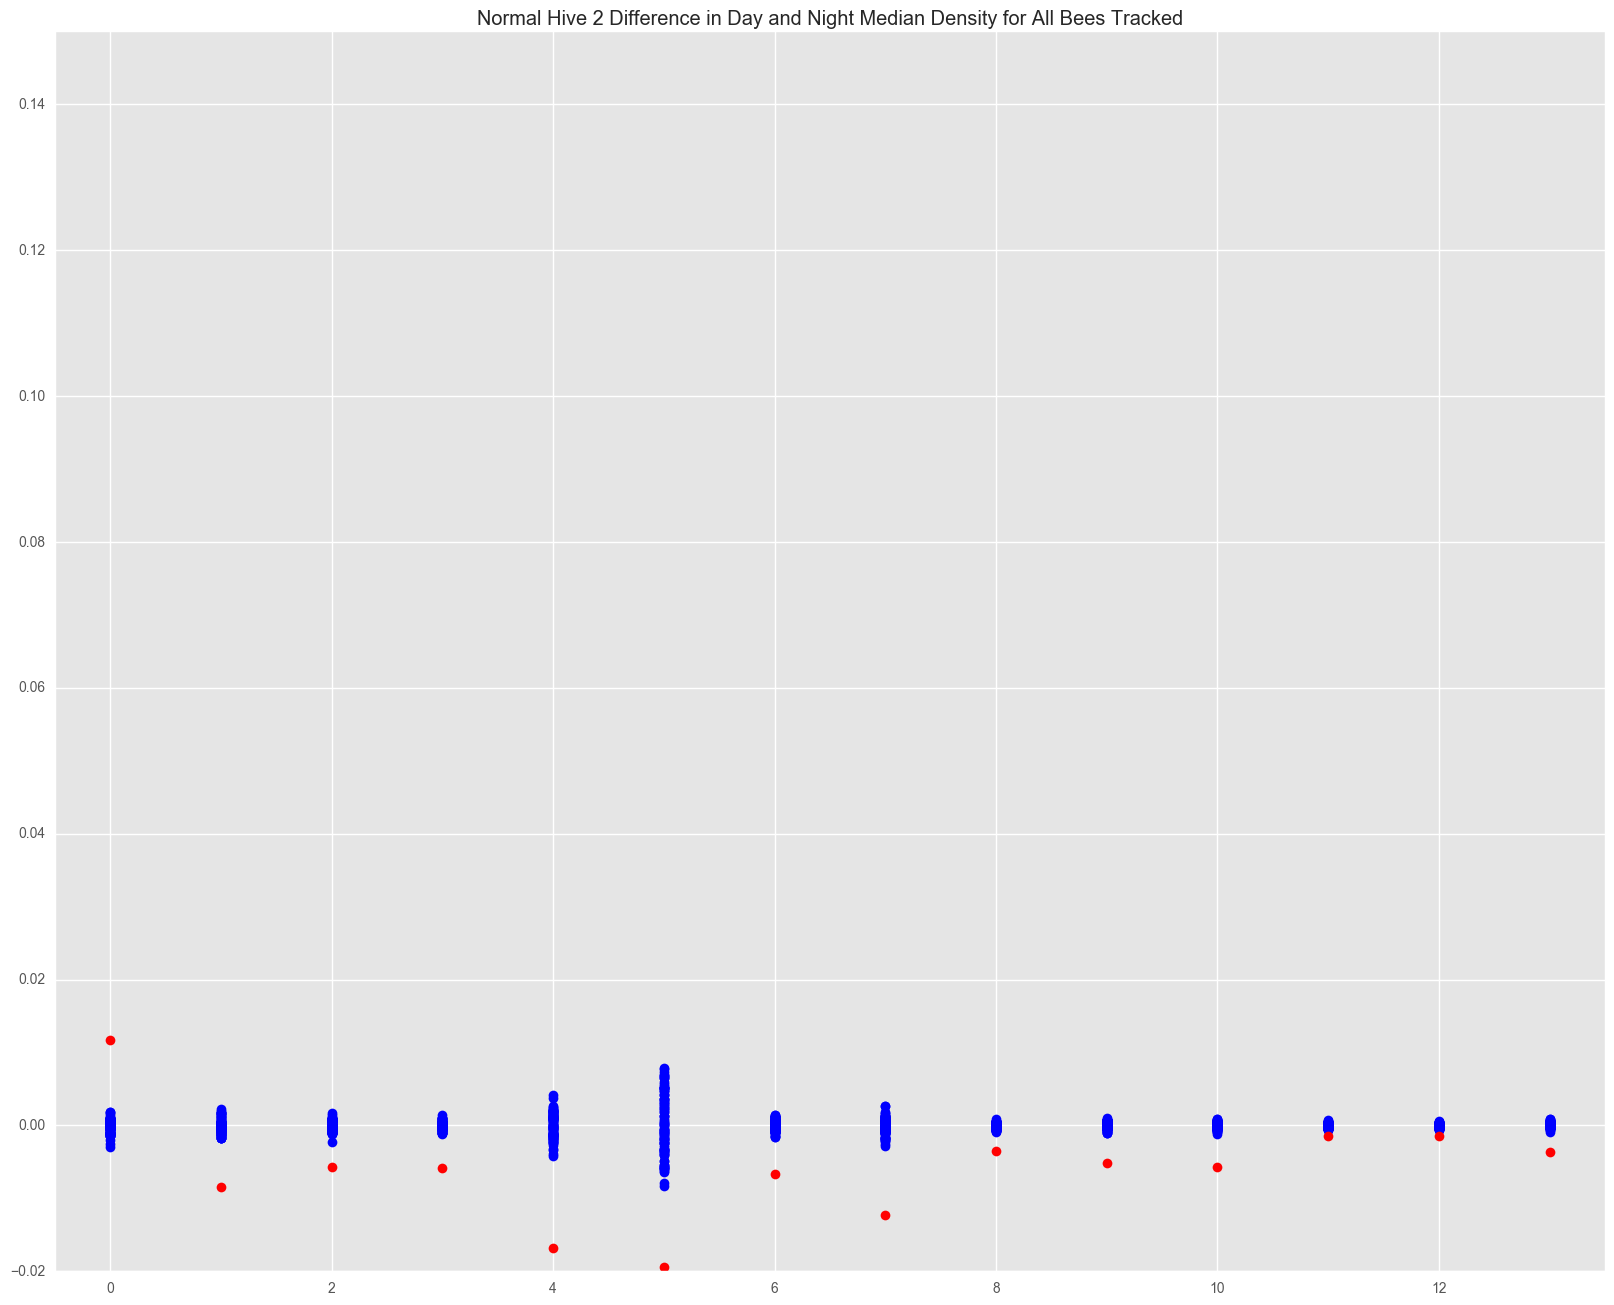

Difference in Day and Night Spread for All Bees Tracked (2, -3)


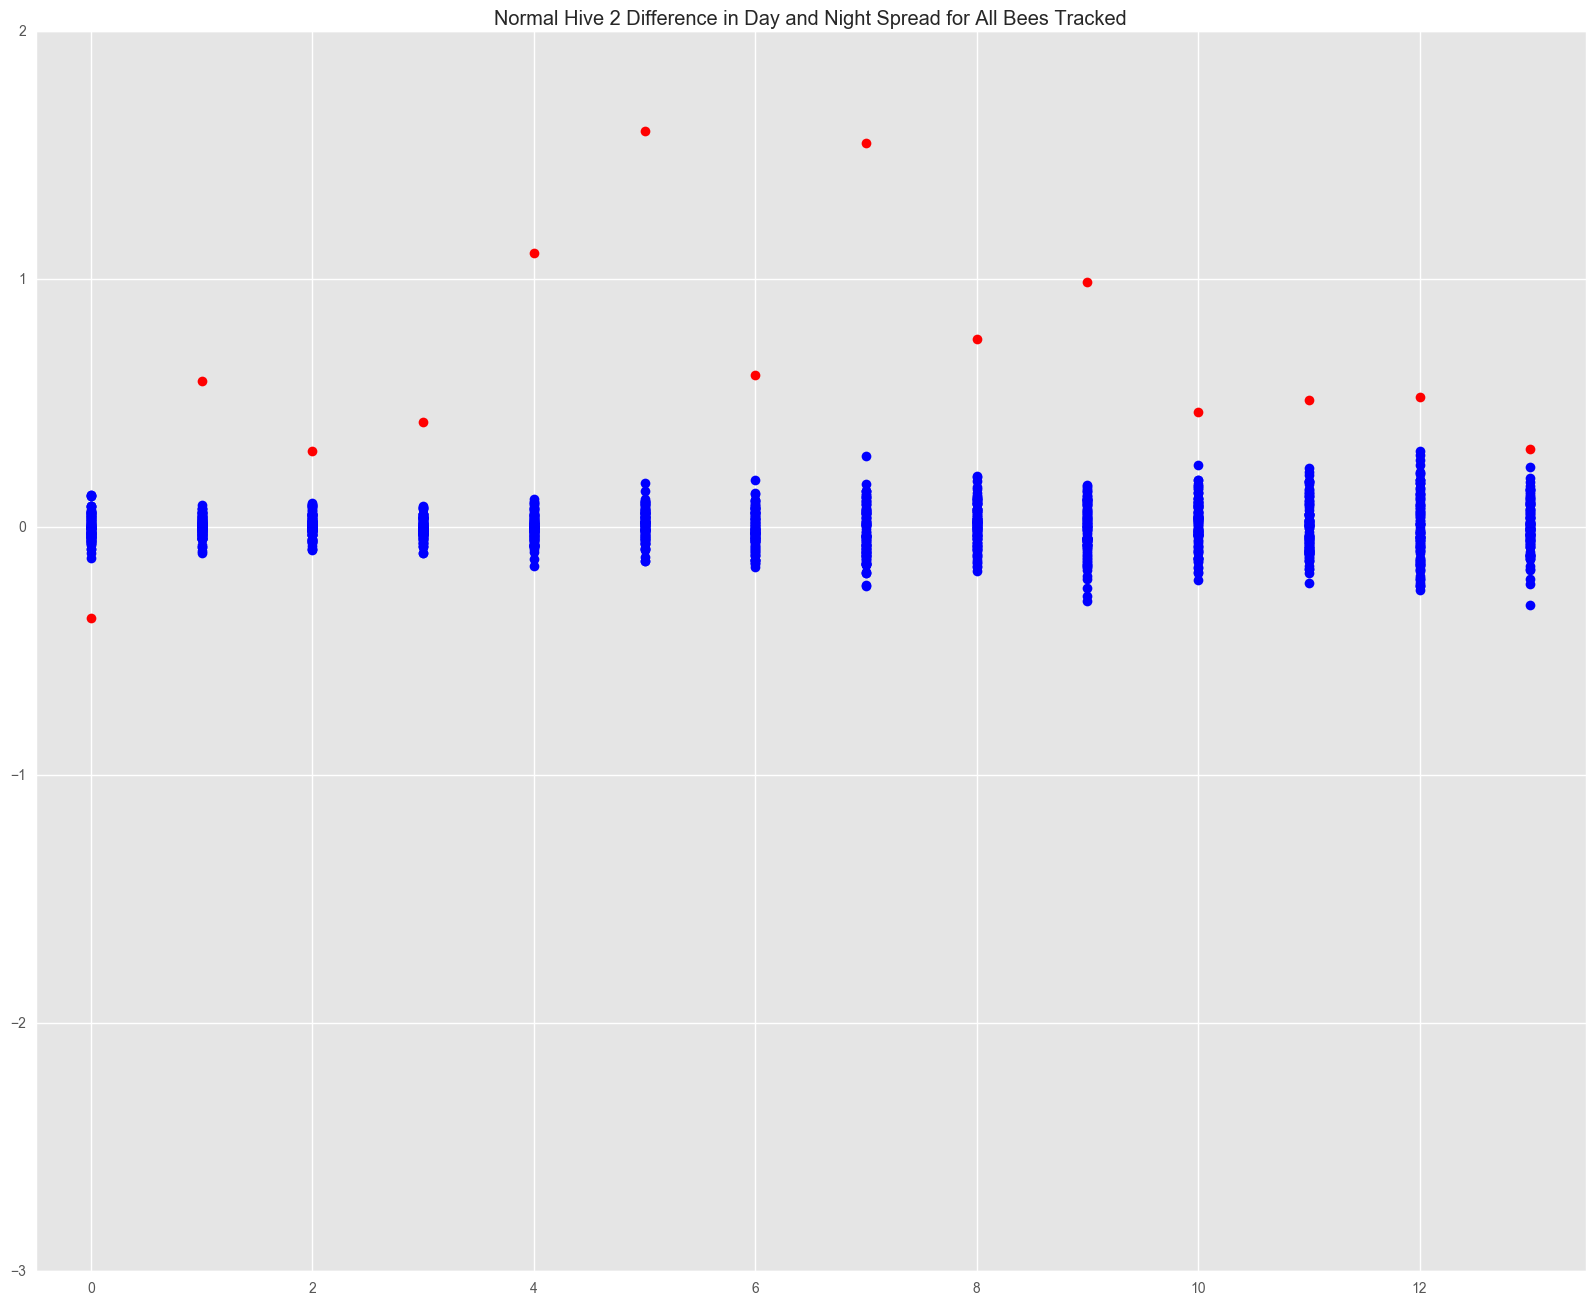

In [5]:
formatting = {'diff_spread_all_tracked_all_xy': ('Difference in Day and Night Spread for All Bees Tracked',(2,-3)), 'diff_median_all_tracked_speeds': ('Difference in Day and Night Median Speed for All Bees Tracked',(7.5,-2)), 'diff_median_density': ('Difference in Day and Night Median Density for All Bees Tracked',(0.15,-0.02)), 'diff_percent_idle_all_tracked': ('Difference in Day and Night Percentage of Time Idle for All Bees Tracked',(0.1,-0.1))}

for i, df in enumerate(real_result_df_list):
    night_df = df[df['time_period']=='night']
    
    for metric in shuffled_permutations[0].keys():
        
        plt.figure()

        for shuffled_days in shuffled_permutations[i][metric]:
            plt.plot(shuffled_days[0:14], marker='o', color='b', linestyle="None")

        plt.plot(list(night_df[metric])[0:14], marker='o', color='r', linestyle="None") #, label='{}'.format(hive_names[i])
        
        metric_title, y_axis = formatting[metric]
        print(metric_title, y_axis)
        
        plt.title('{} {}'.format(hive_names[i], metric_title))
        plt.xlim(-0.5,13.5)
        plt.ylim(ymax=y_axis[0], ymin=y_axis[1])
        plt.show()
    
    '''
    
    plt.xlabel('Days')
    plt.xlim(-0.5,24.5)
    x_len = len(df['spread_all_tracked_all_xy'][0:25])
    day_nums = []
    [day_nums.extend(['', ii + 1]) for ii in range(int(x_len / 2))]
    plt.xticks(range(x_len), day_nums)
    plt.legend(loc='lower left')
    
    for j, time_period in enumerate(real_result_df_list[0]['time_period'][0:25]):
        if time_period == 'night':
            plt.axvspan(j - 0.5, j + 0.5, facecolor='b', alpha=0.1, edgecolor='none')
        else:
            plt.axvspan(j - 0.5, j + 0.5, facecolor='y', alpha=0.1, edgecolor='none')
    '''
    plt.show()

In [6]:
bootstrapped_permutations = []

for bootstrapped_df in bootstrapped_result_df_list:
    num_perms = int(len(bootstrapped_df[bootstrapped_df['day_num']==0]) / 2)
    empty_lists = [[] for i in range(num_perms)]
    permutations = {}
    for m in ['diff_spread_all_tracked_all_xy', 'diff_median_all_tracked_speeds', 'diff_median_density', 'diff_percent_idle_all_tracked']:
        permutations[m] = copy.deepcopy(empty_lists)
    days_nums_in_experiment = list(bootstrapped_df['day_num'].unique())
    days_nums_in_experiment.sort()
    for day_num in days_nums_in_experiment:
        day_num_df = bootstrapped_df[bootstrapped_df['day_num'] == day_num]
        night_df = day_num_df[day_num_df['time_period'] == 'night']
        #day_df = day_num_df[day_num_df['time_period'] == 'day']
        
        for metric in permutations.keys():
            night_metric = list(night_df[metric])
            #day_metric = list(day_df[metric])
            for i, group in enumerate(permutations[metric]):
                permutations[metric][i].append(night_metric[i])
                #permutations[metric][i].extend([night_metric[i], day_metric[i]])
        
    bootstrapped_permutations.append(permutations)

Difference in Day and Night Percentage of Time Idle for All Bees Tracked (0.1, -0.1)


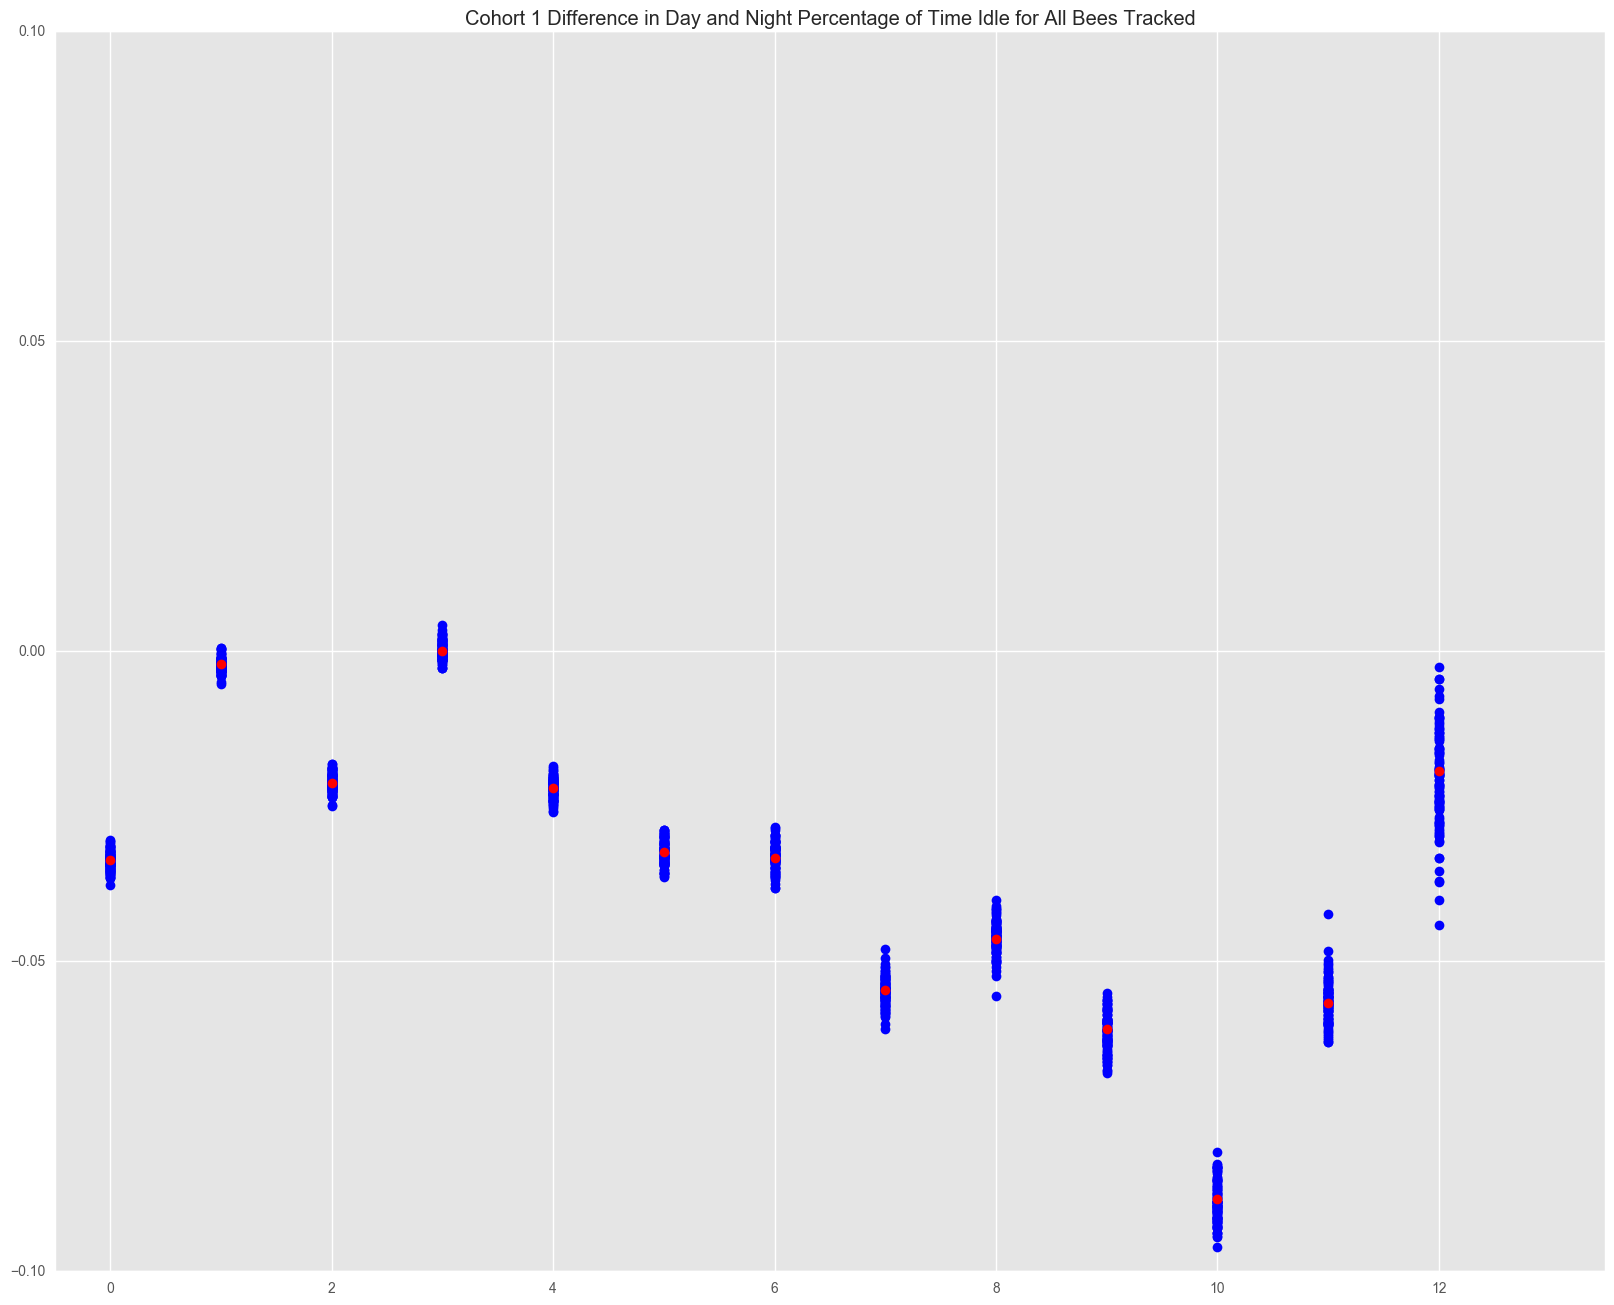

Difference in Day and Night Median Speed for All Bees Tracked (7.5, -2)


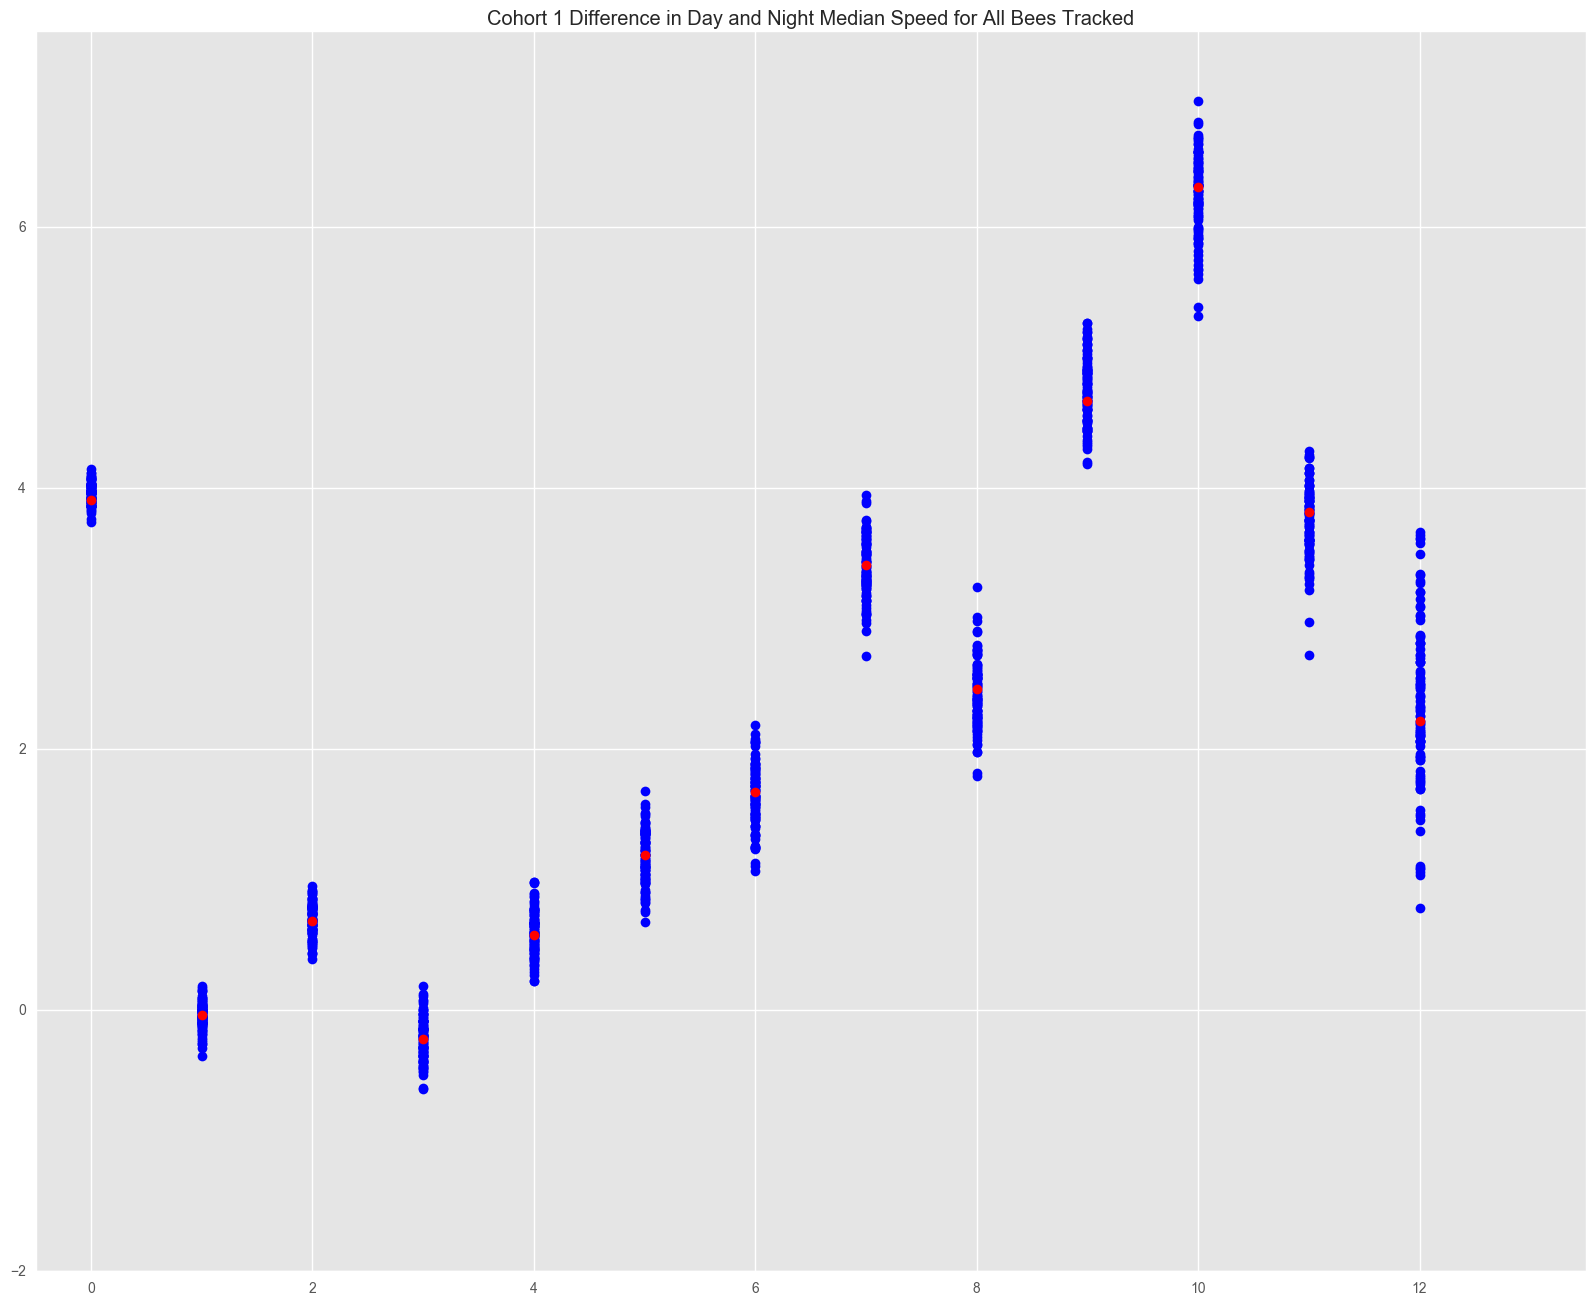

Difference in Day and Night Median Density for All Bees Tracked (0.01, -0.02)


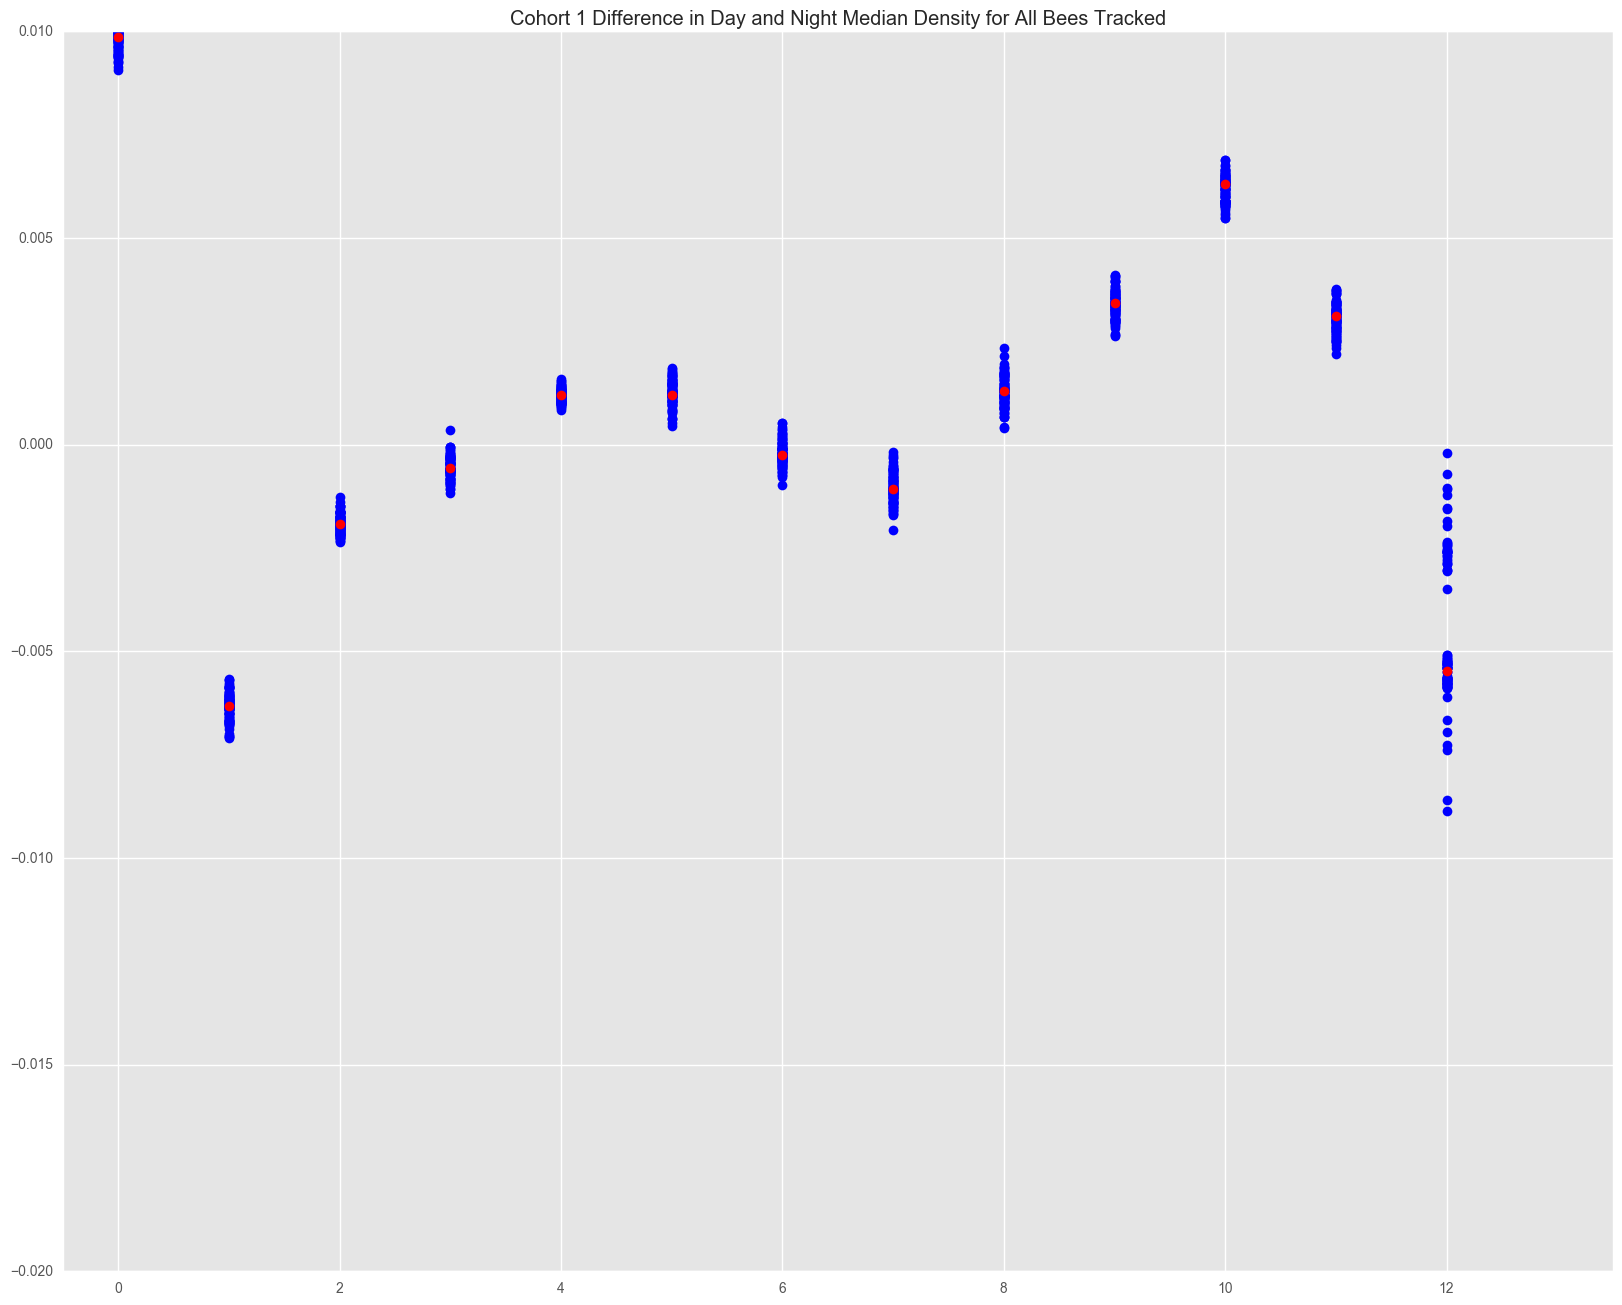

Difference in Day and Night Spread for All Bees Tracked (2, -3)


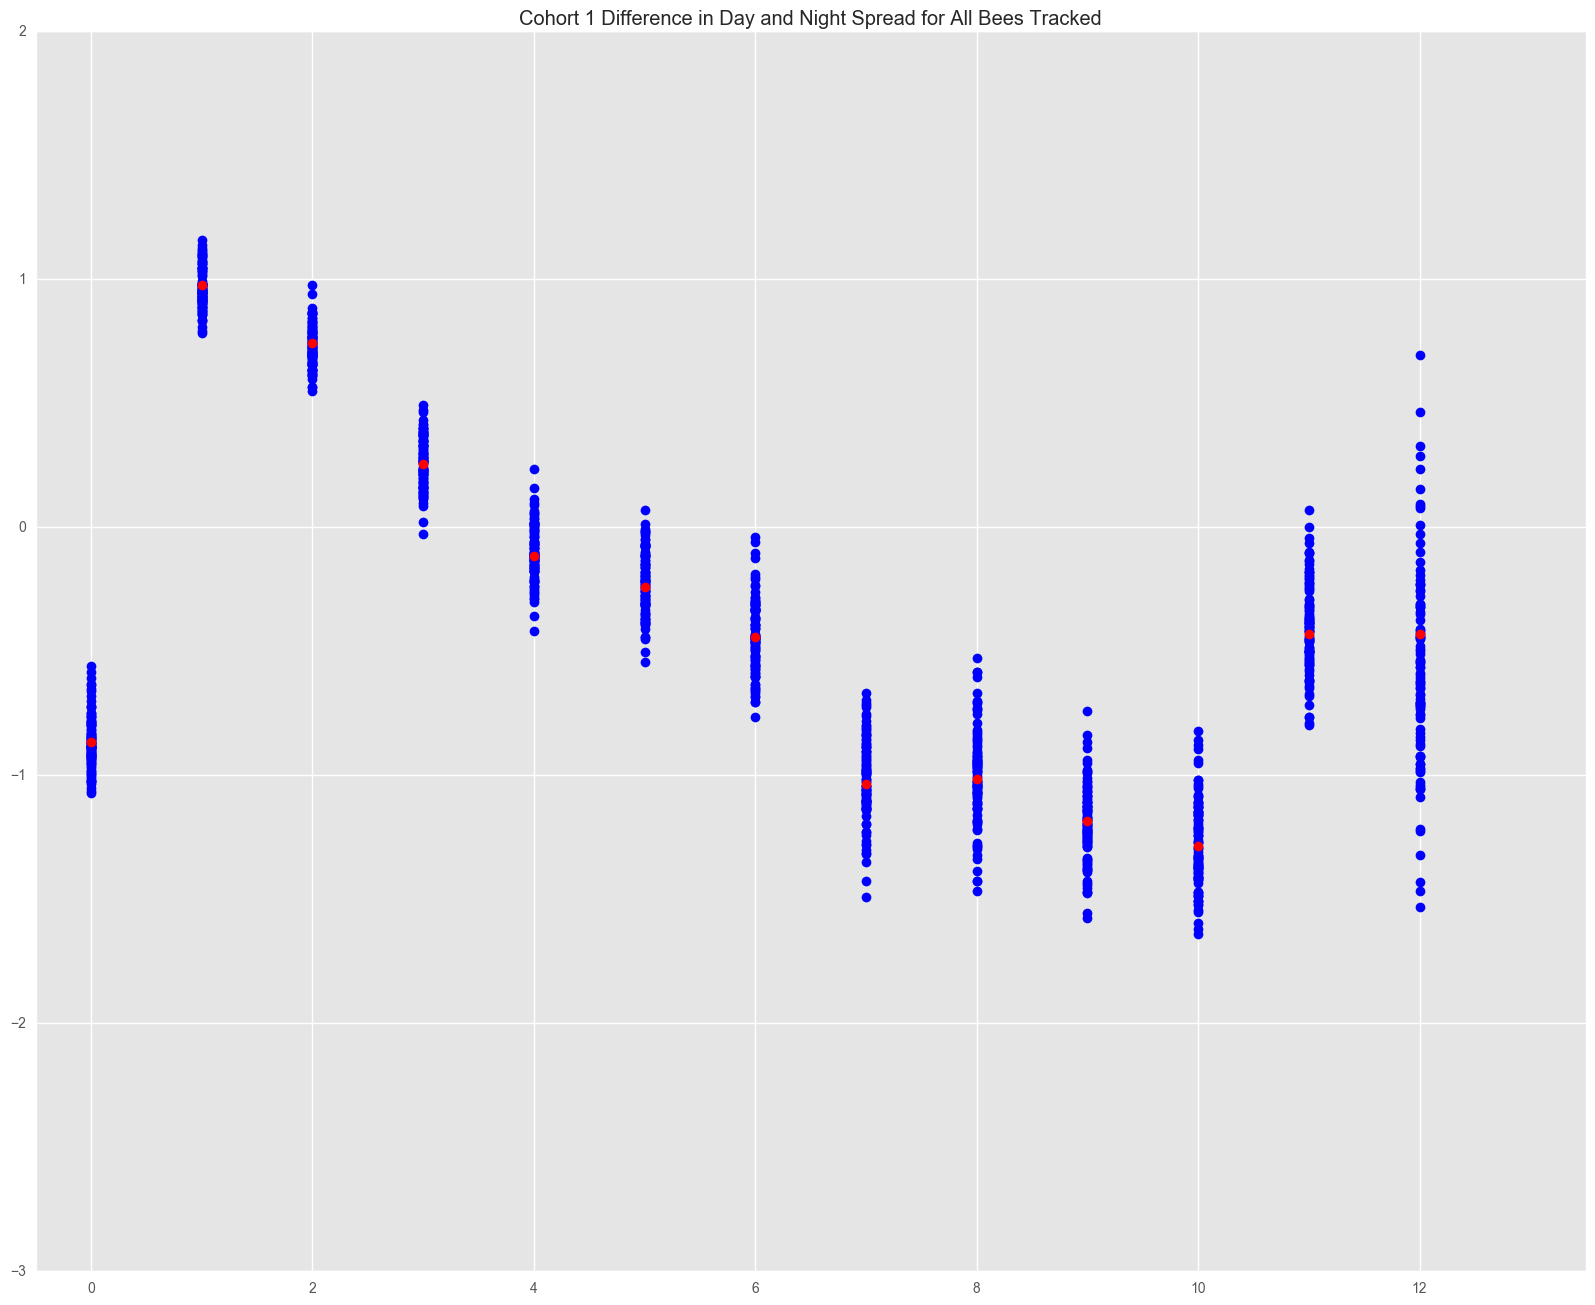

Difference in Day and Night Percentage of Time Idle for All Bees Tracked (0.1, -0.1)


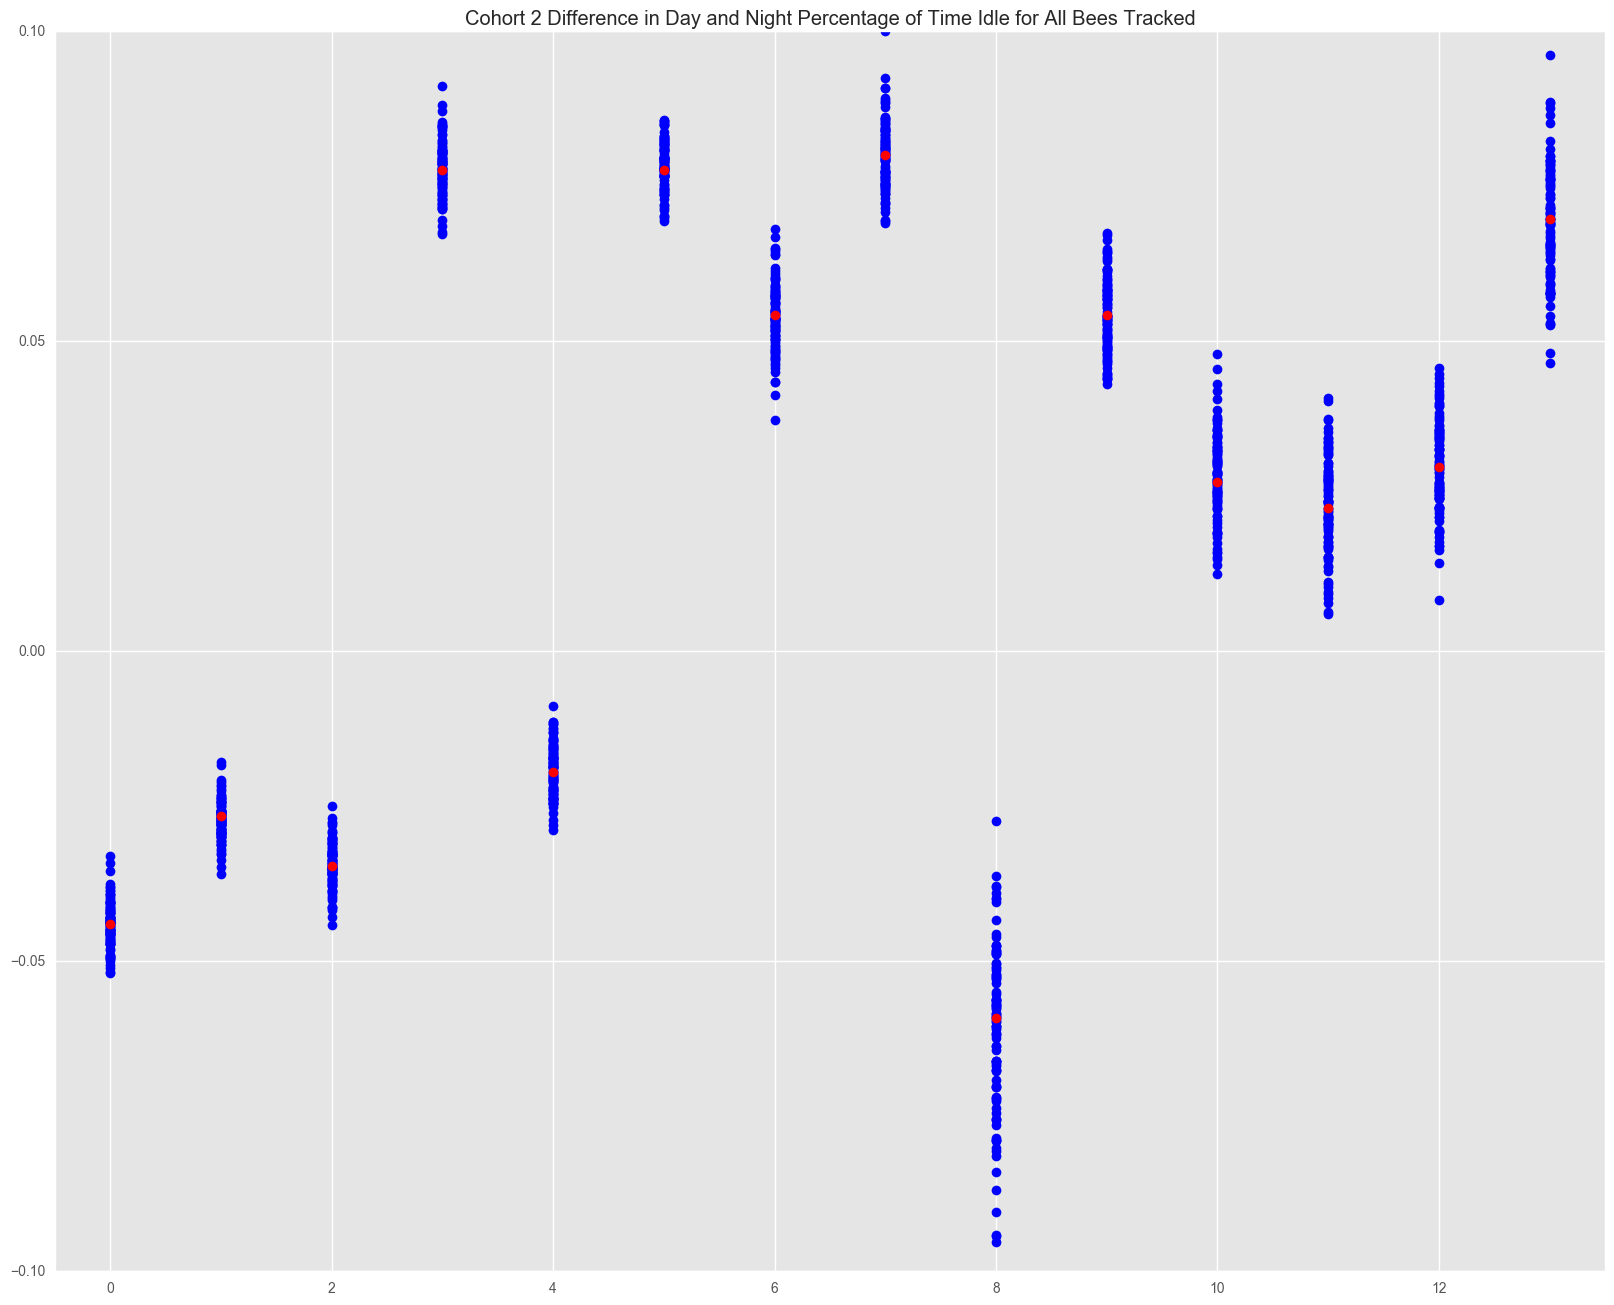

Difference in Day and Night Median Speed for All Bees Tracked (7.5, -2)


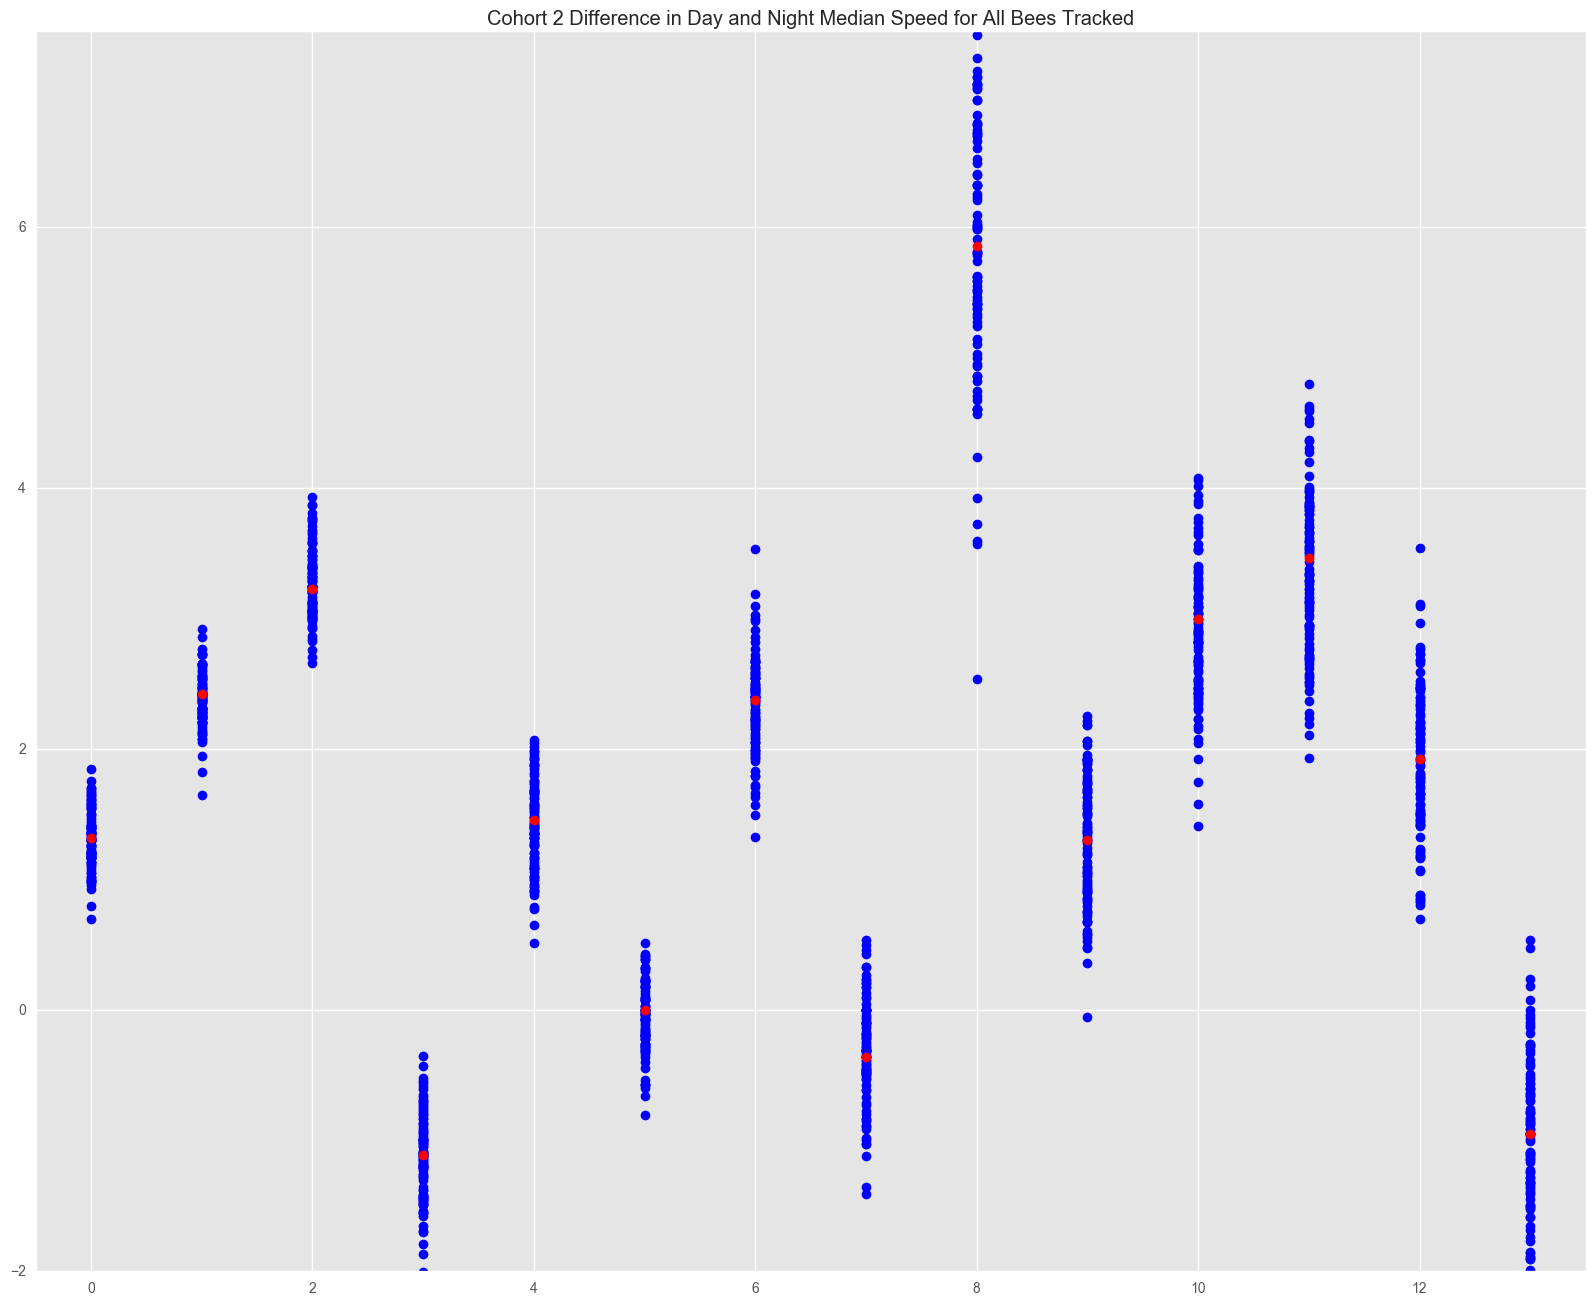

Difference in Day and Night Median Density for All Bees Tracked (0.01, -0.02)


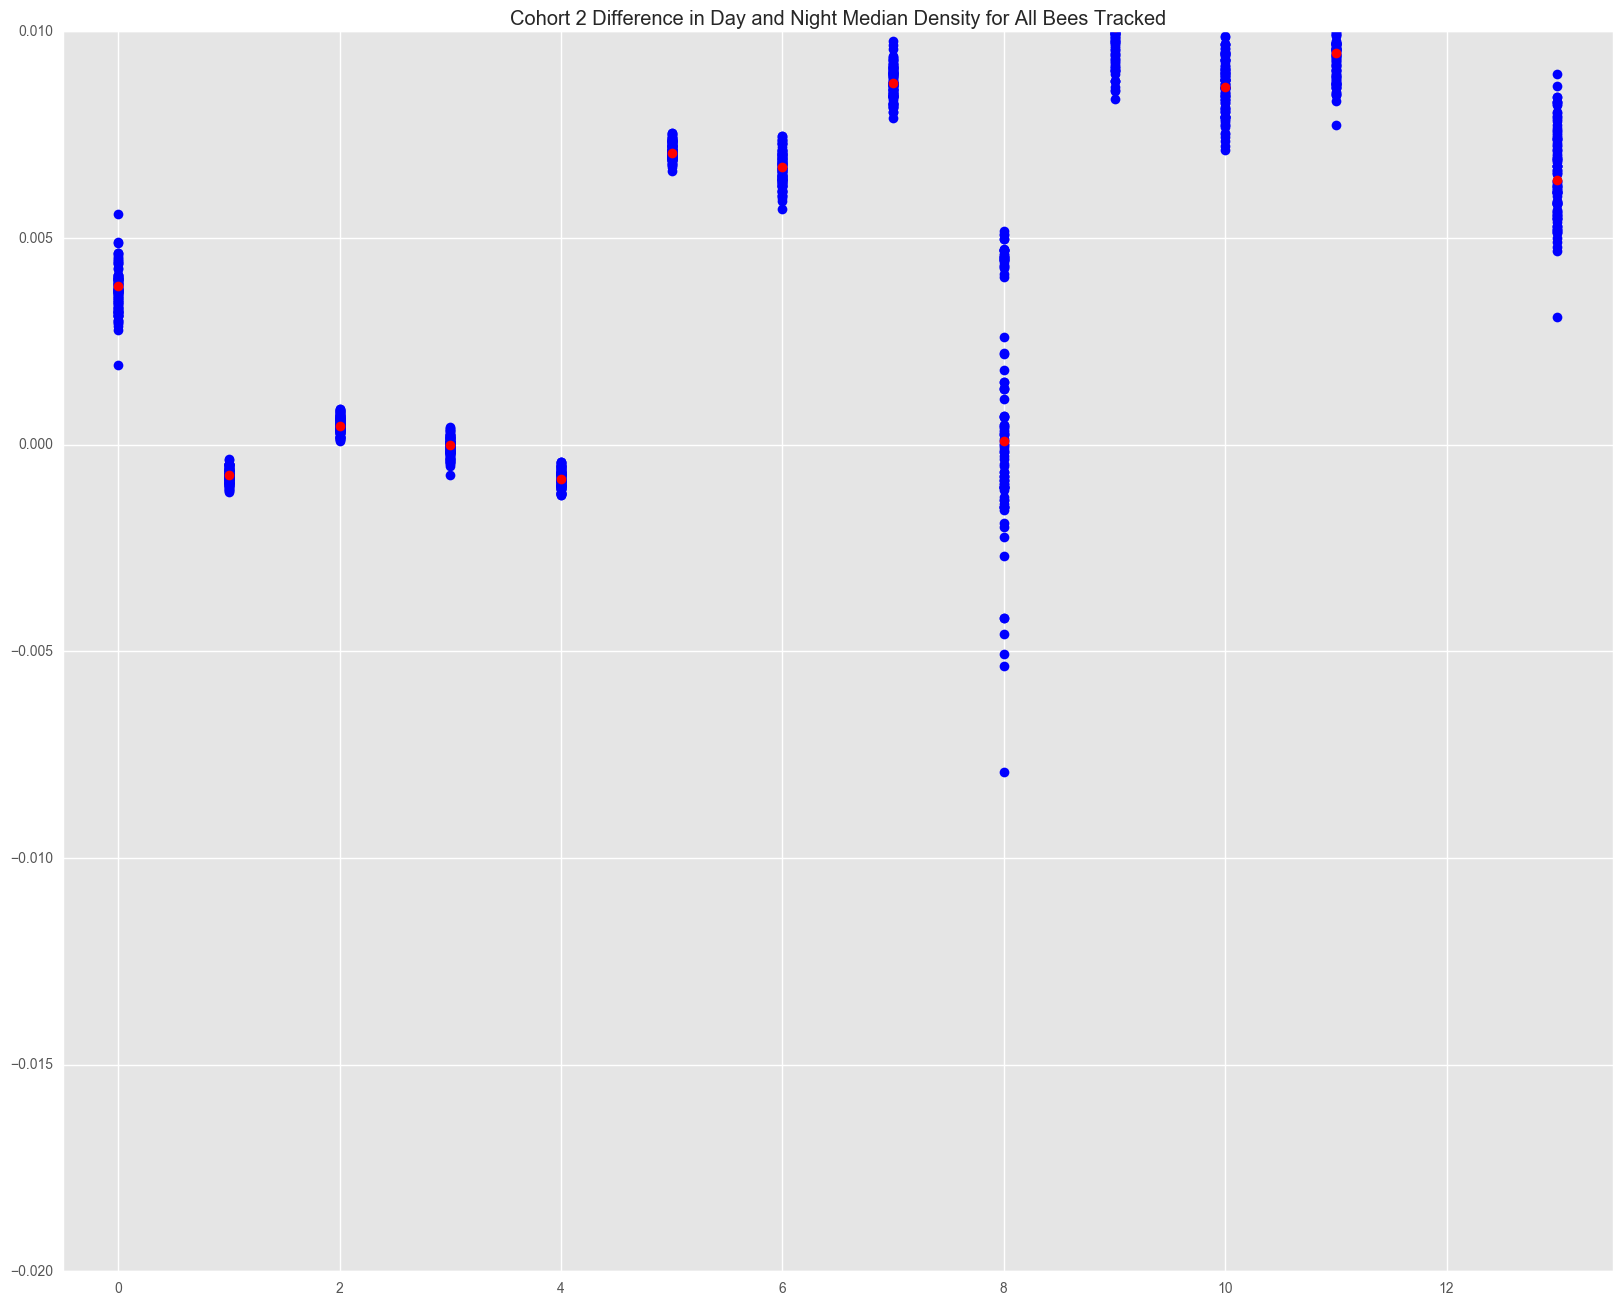

Difference in Day and Night Spread for All Bees Tracked (2, -3)


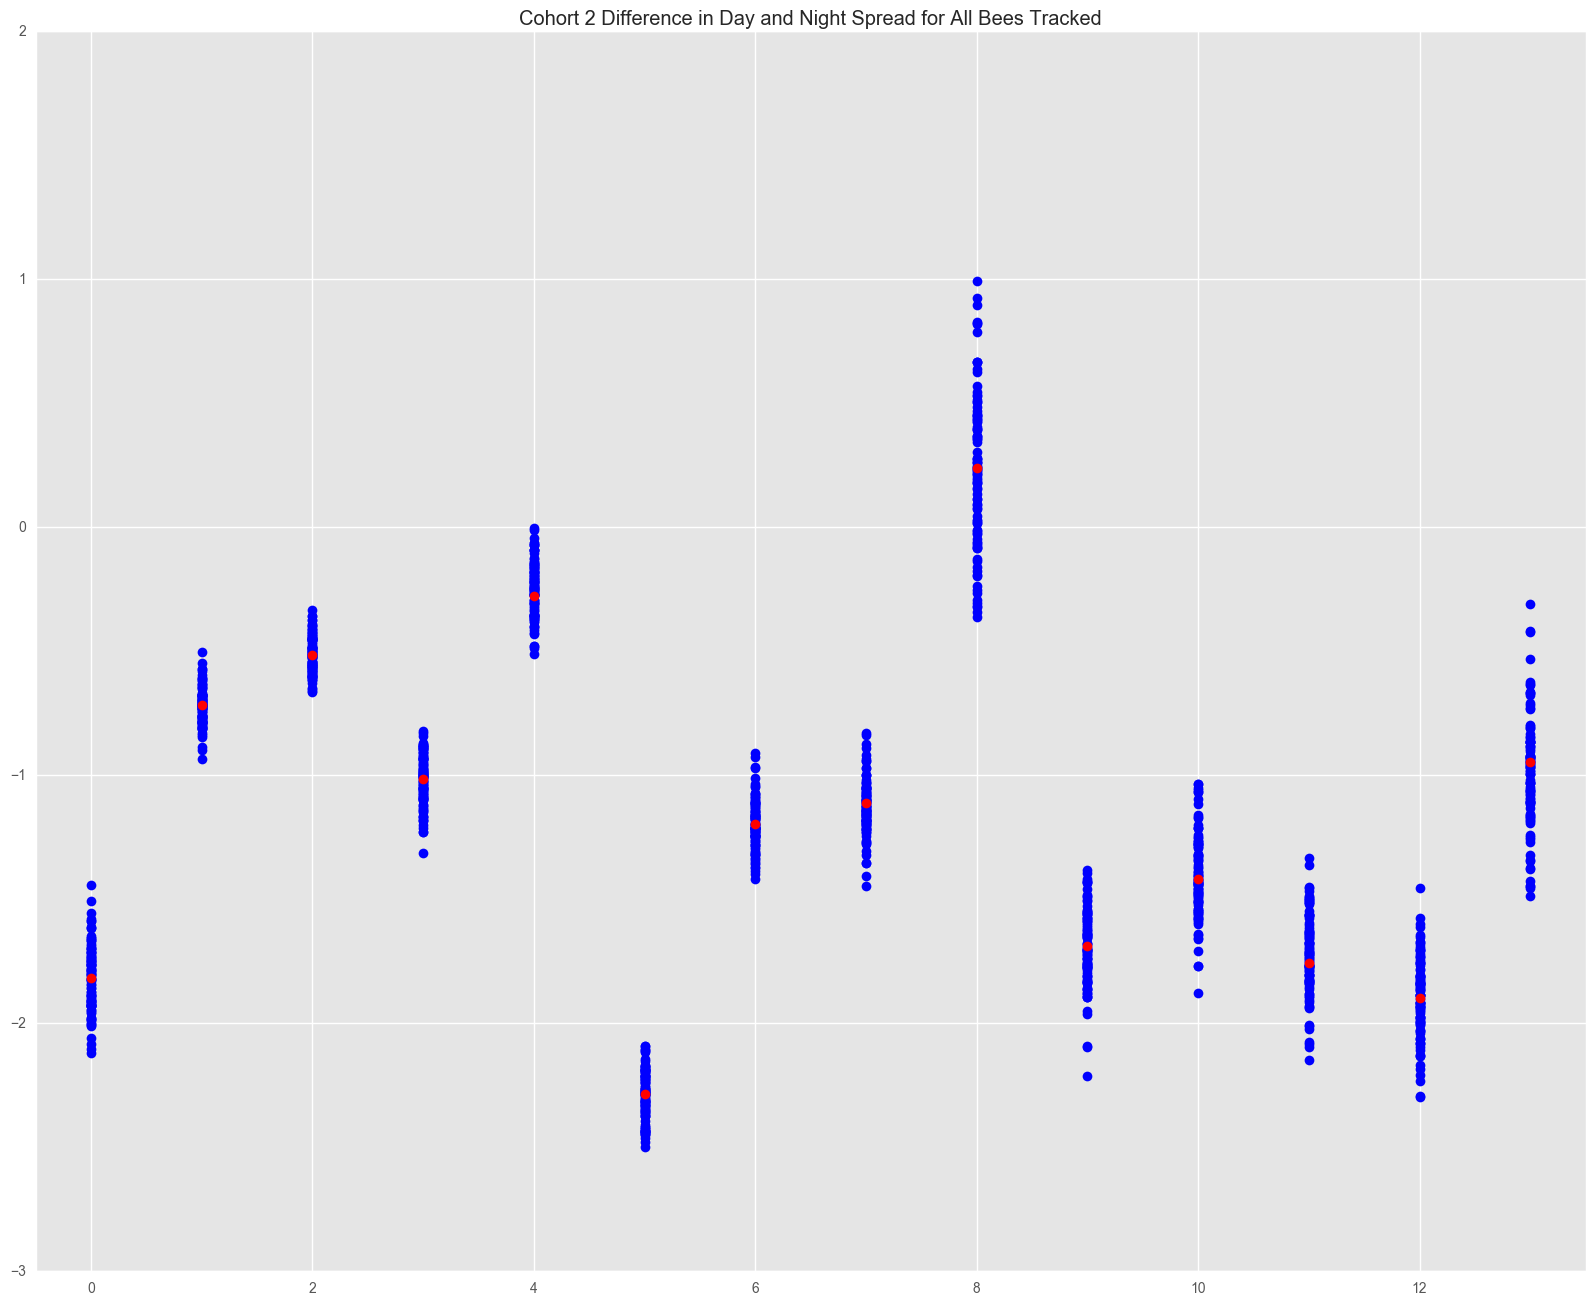

Difference in Day and Night Percentage of Time Idle for All Bees Tracked (0.1, -0.1)


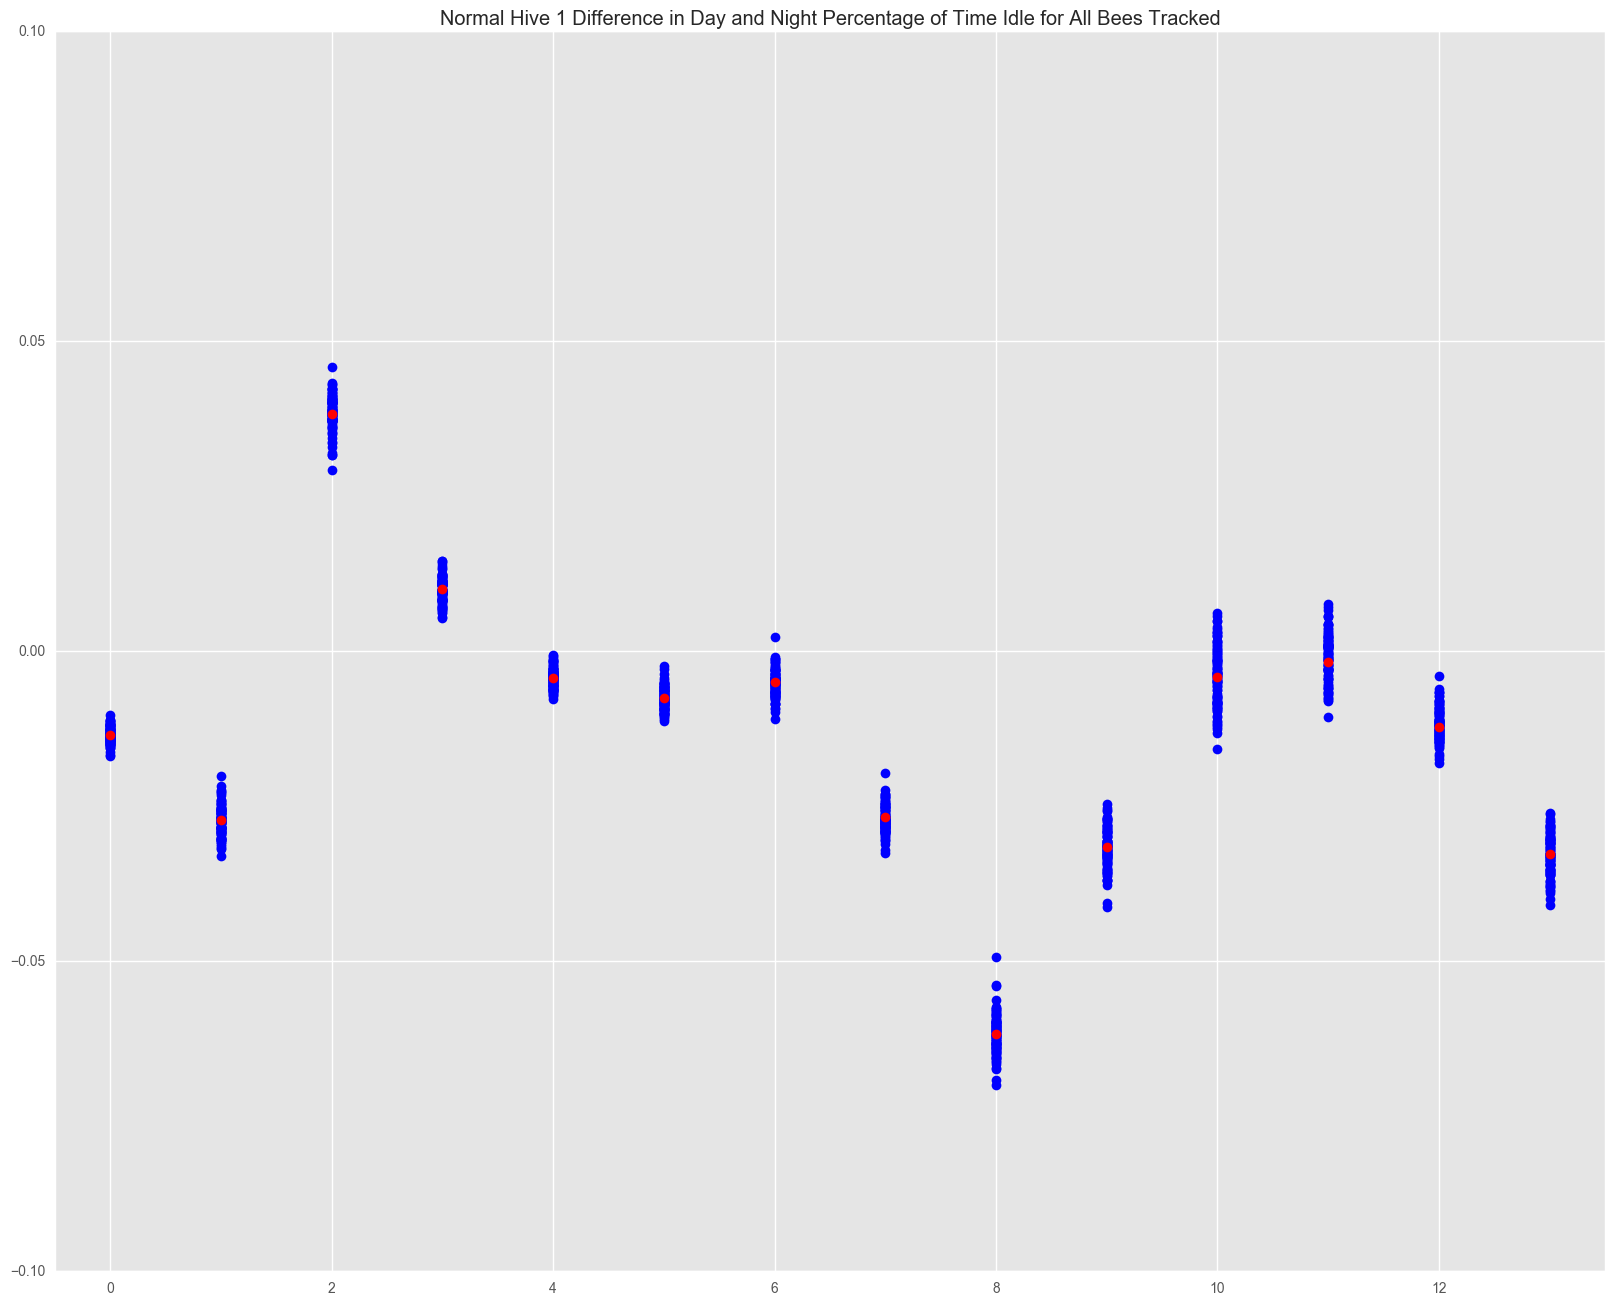

Difference in Day and Night Median Speed for All Bees Tracked (7.5, -2)


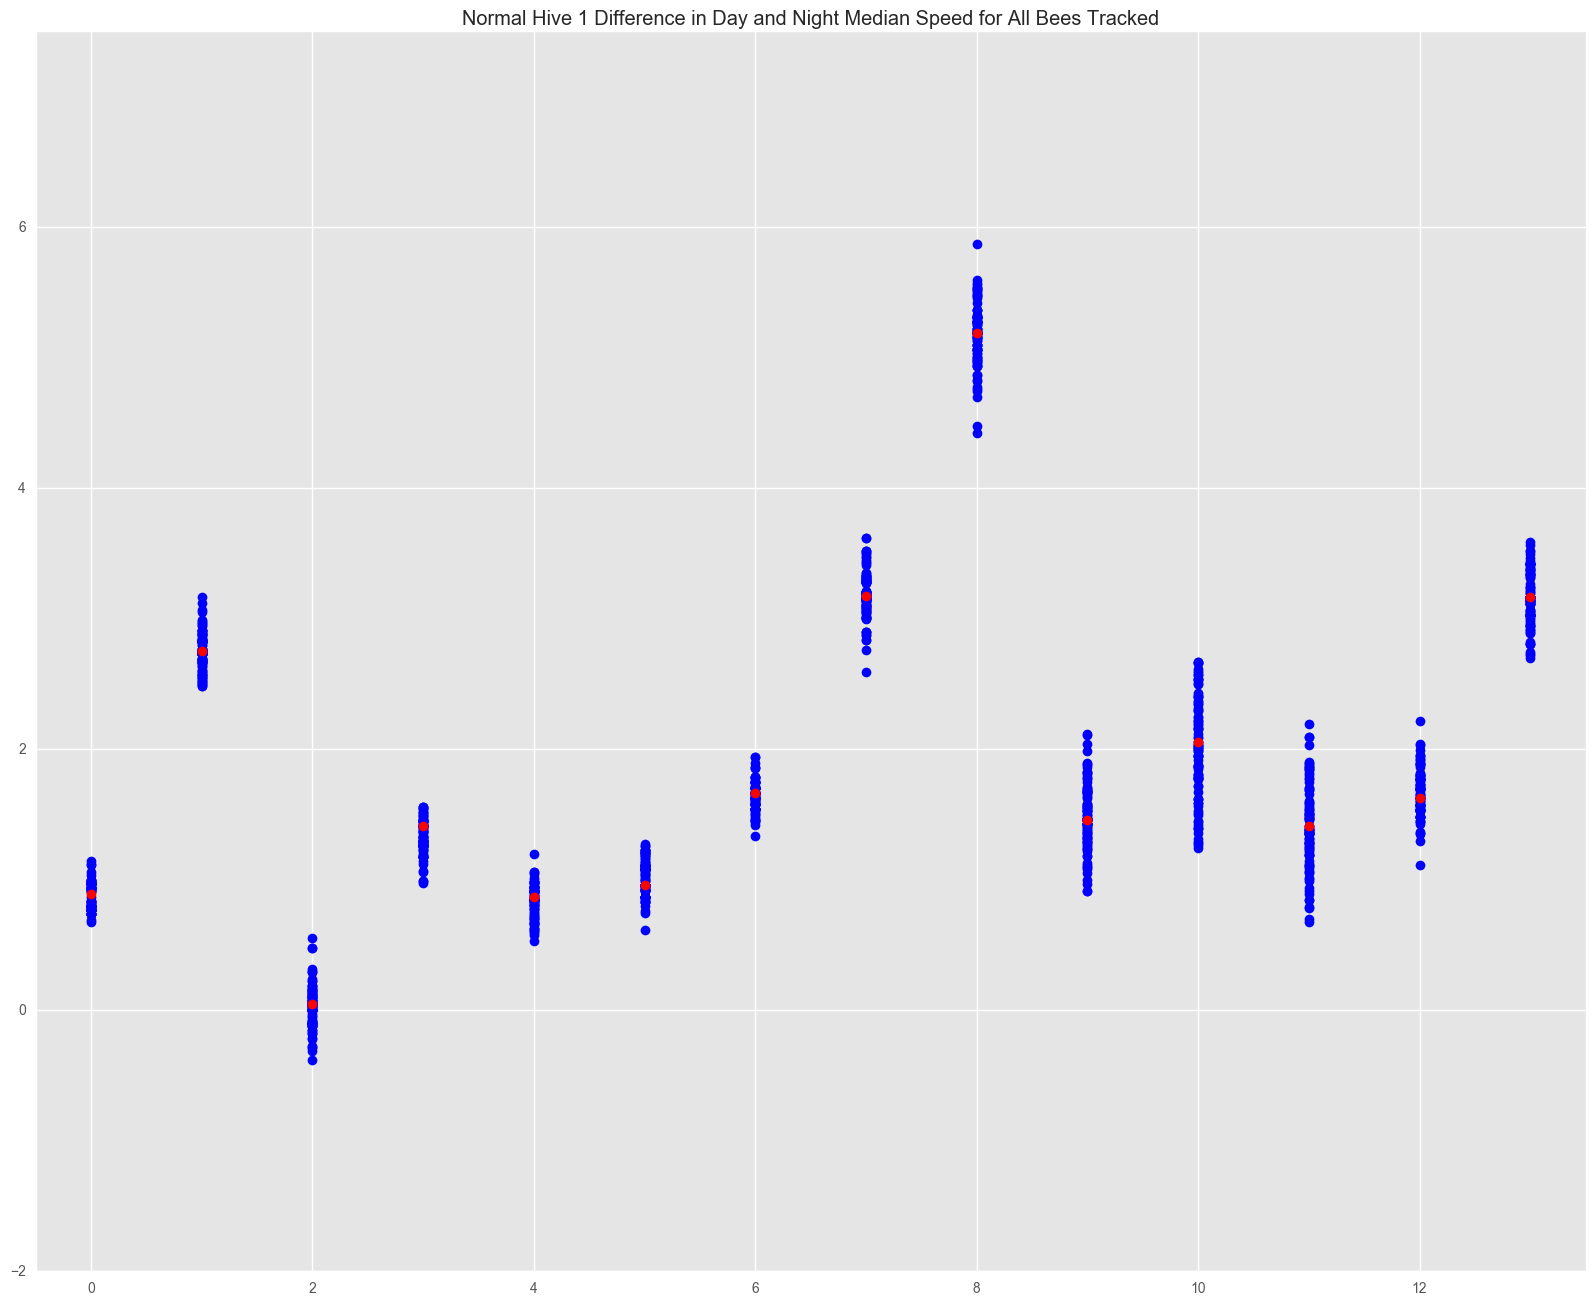

Difference in Day and Night Median Density for All Bees Tracked (0.01, -0.02)


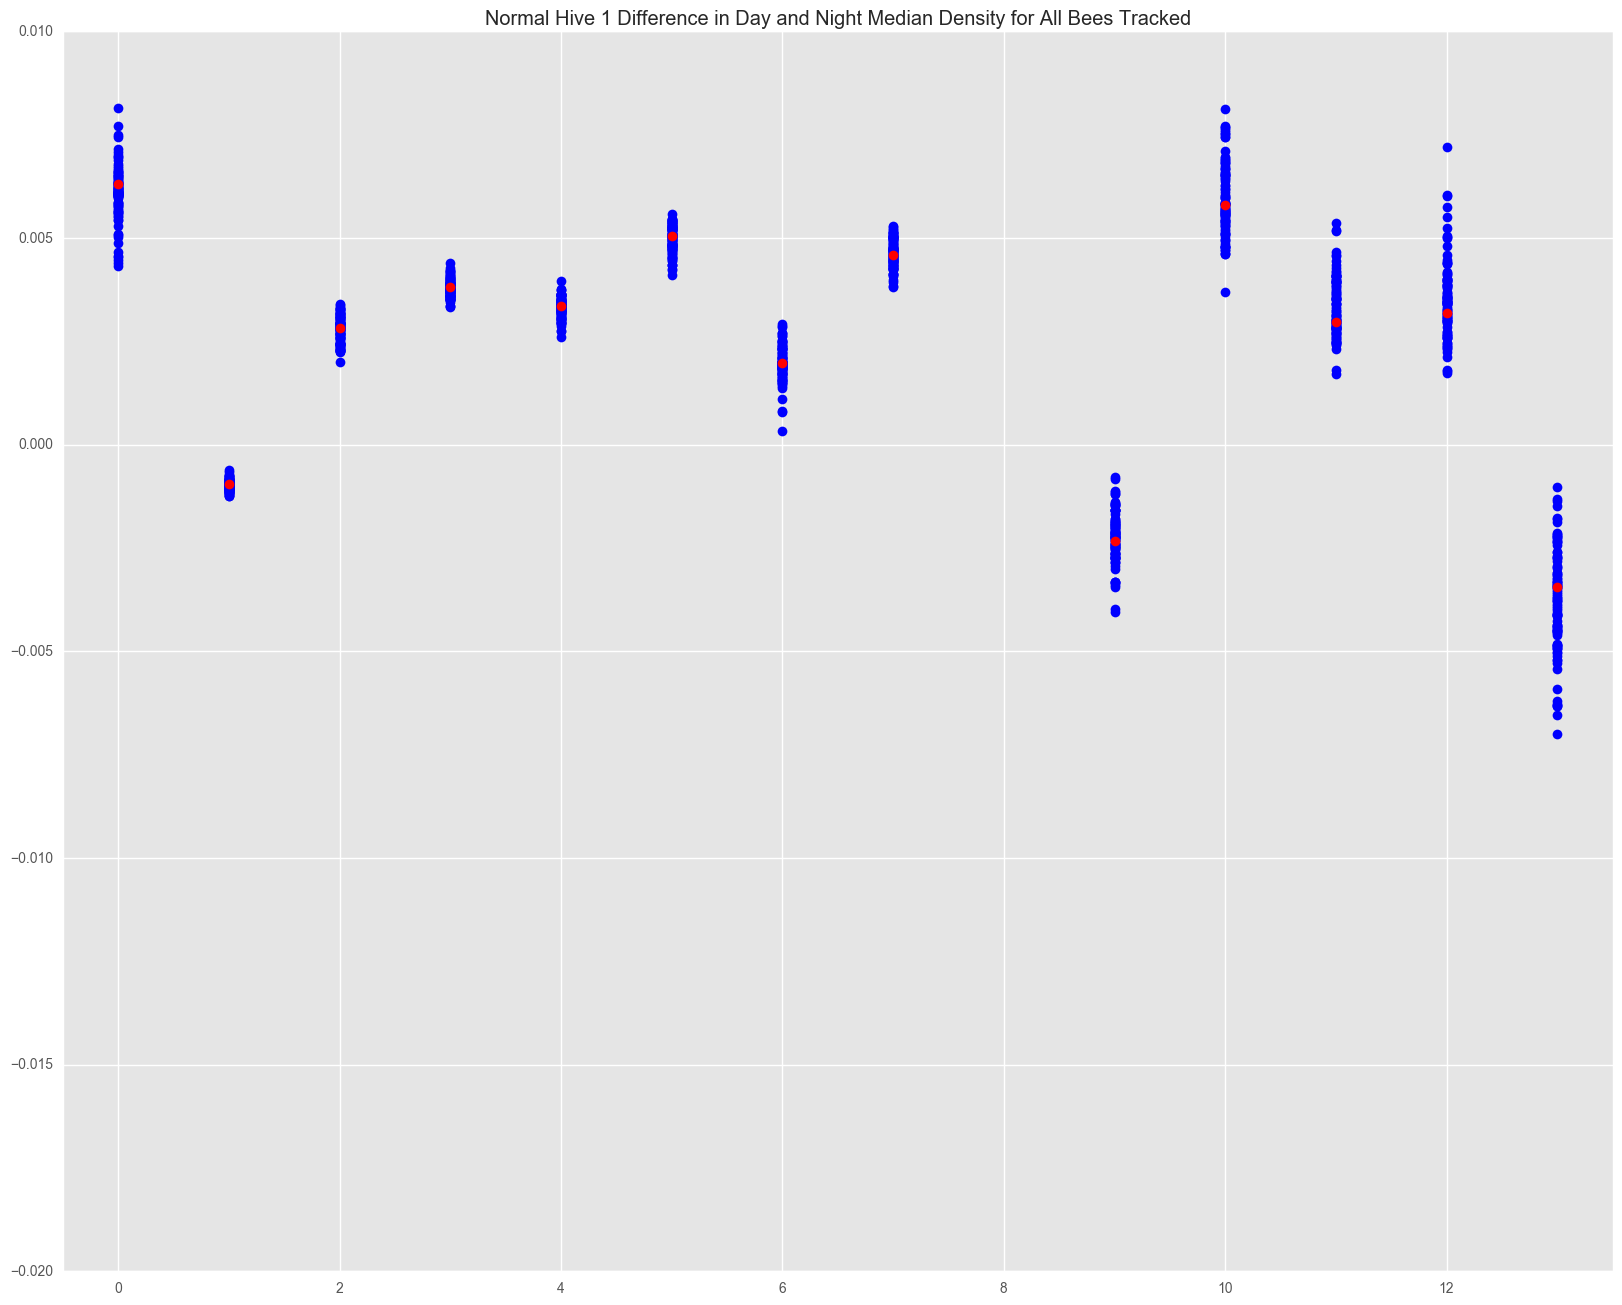

Difference in Day and Night Spread for All Bees Tracked (2, -3)


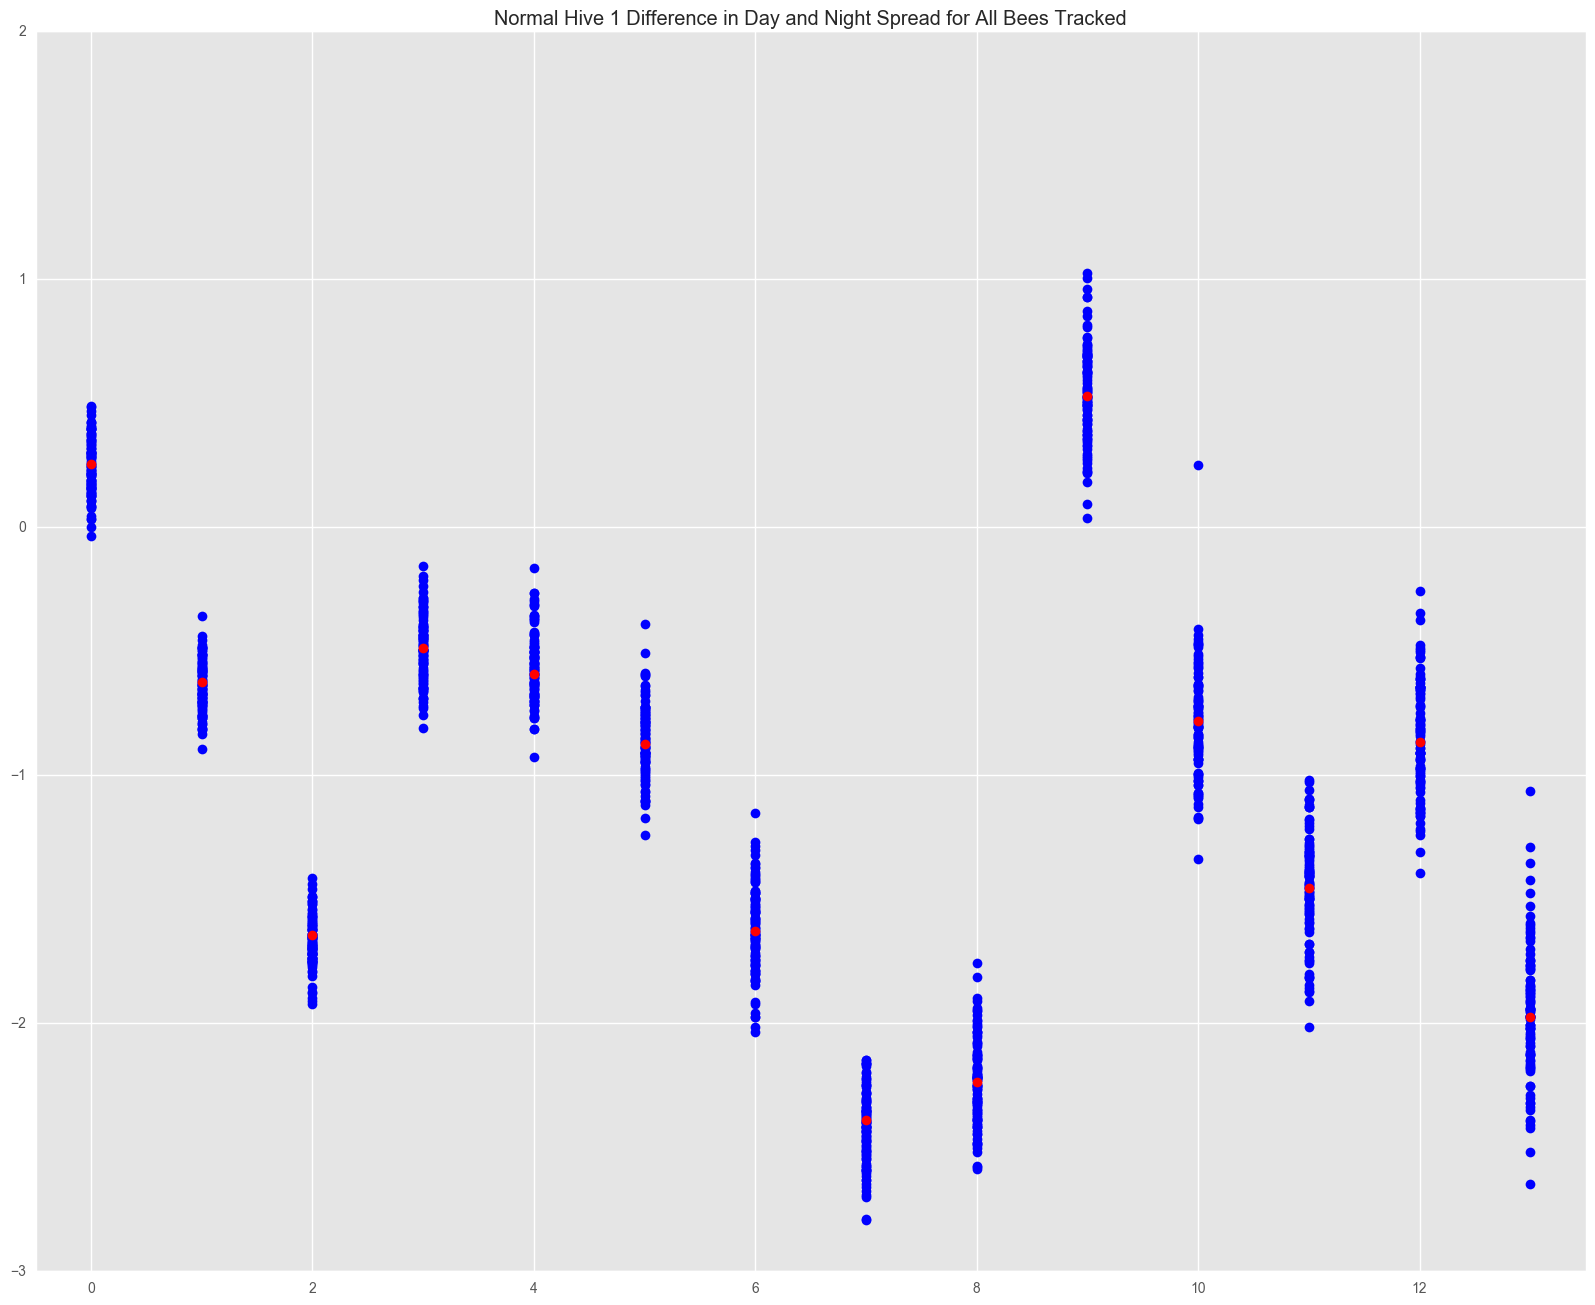

Difference in Day and Night Percentage of Time Idle for All Bees Tracked (0.1, -0.1)


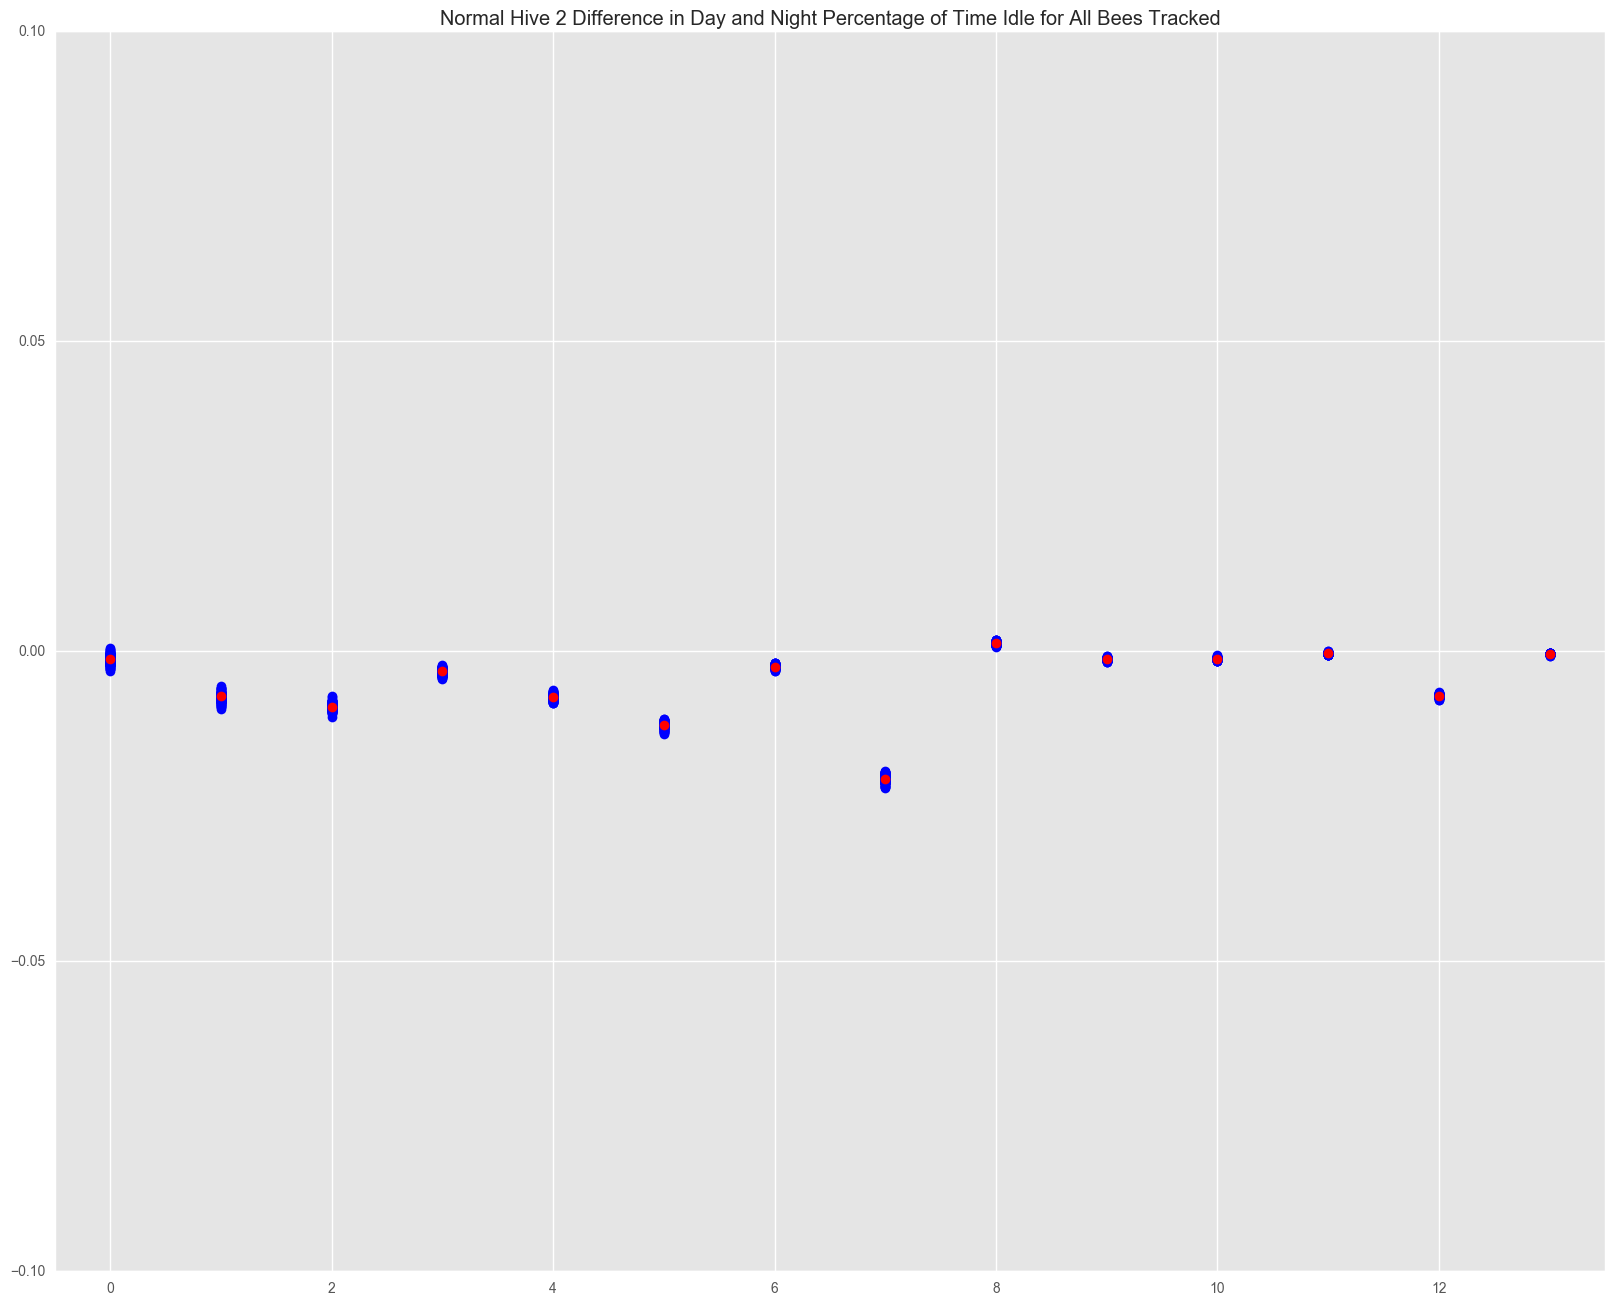

Difference in Day and Night Median Speed for All Bees Tracked (7.5, -2)


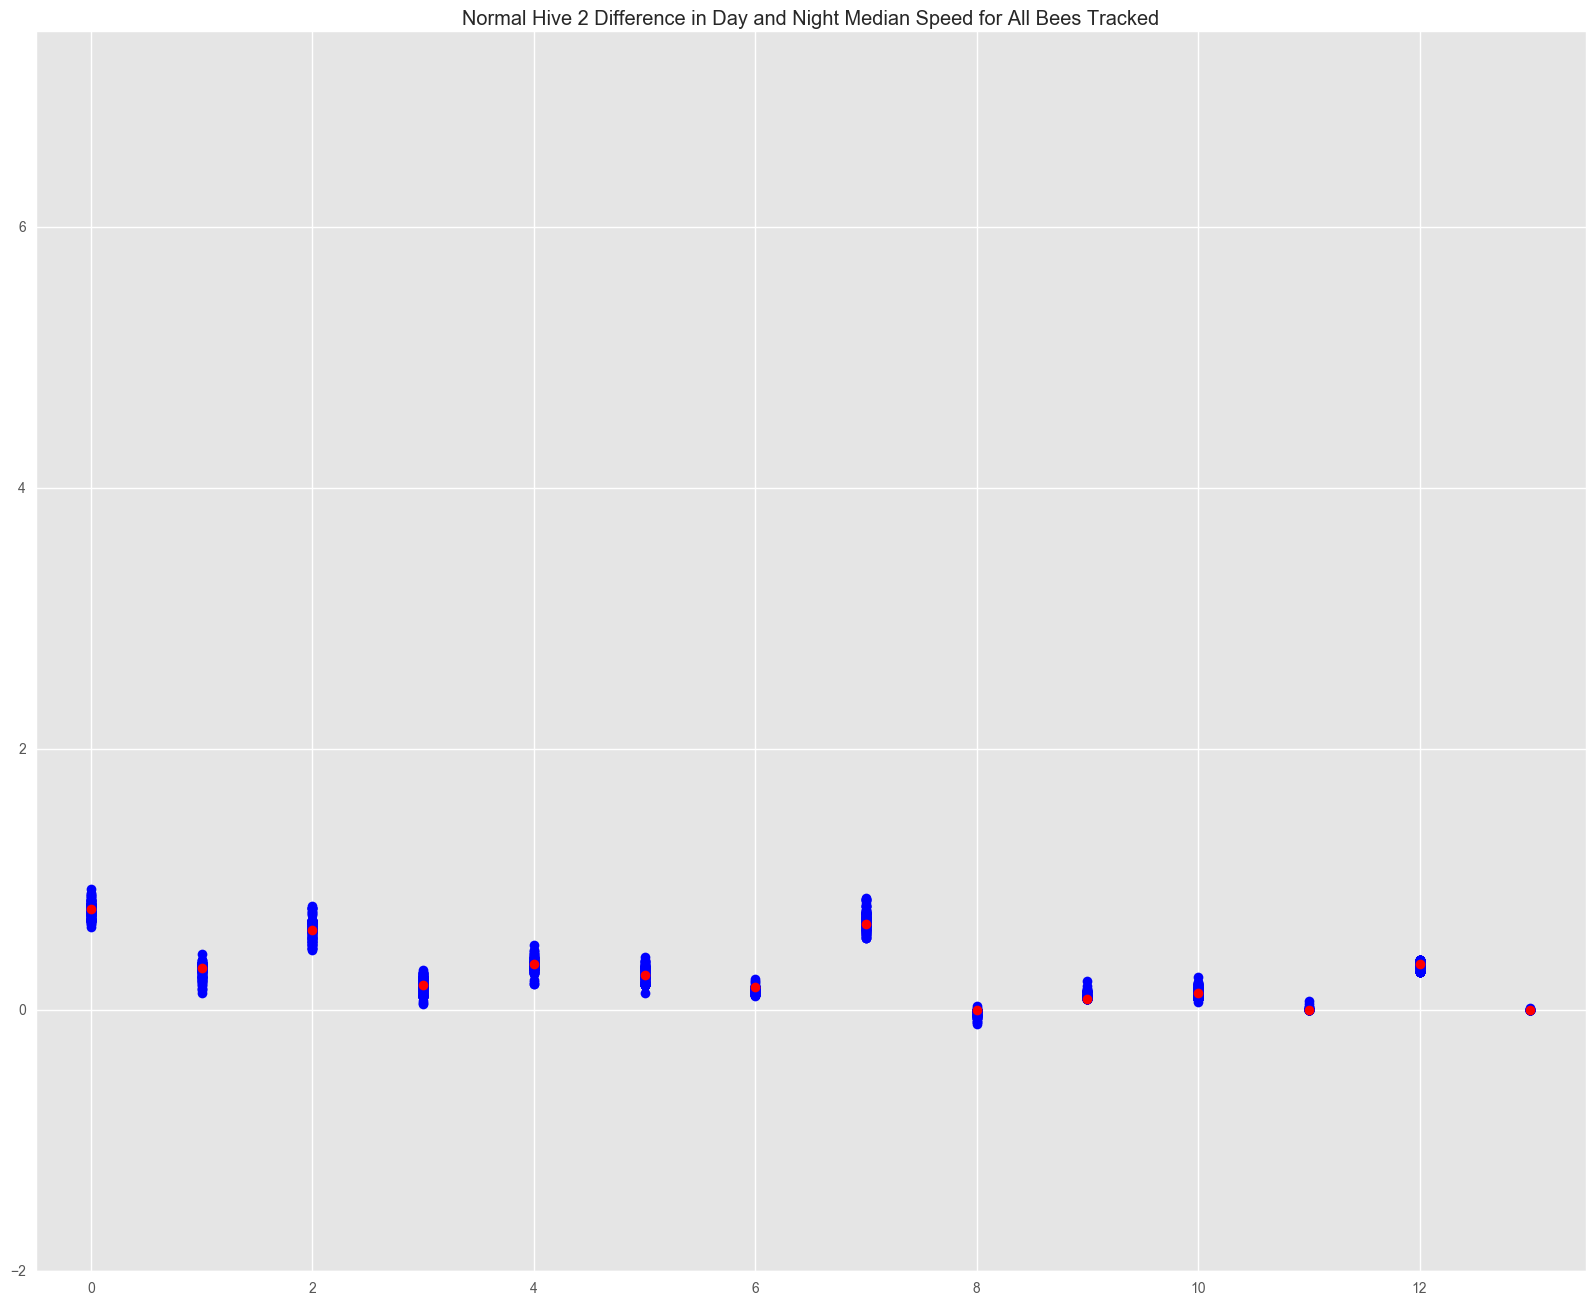

Difference in Day and Night Median Density for All Bees Tracked (0.01, -0.02)


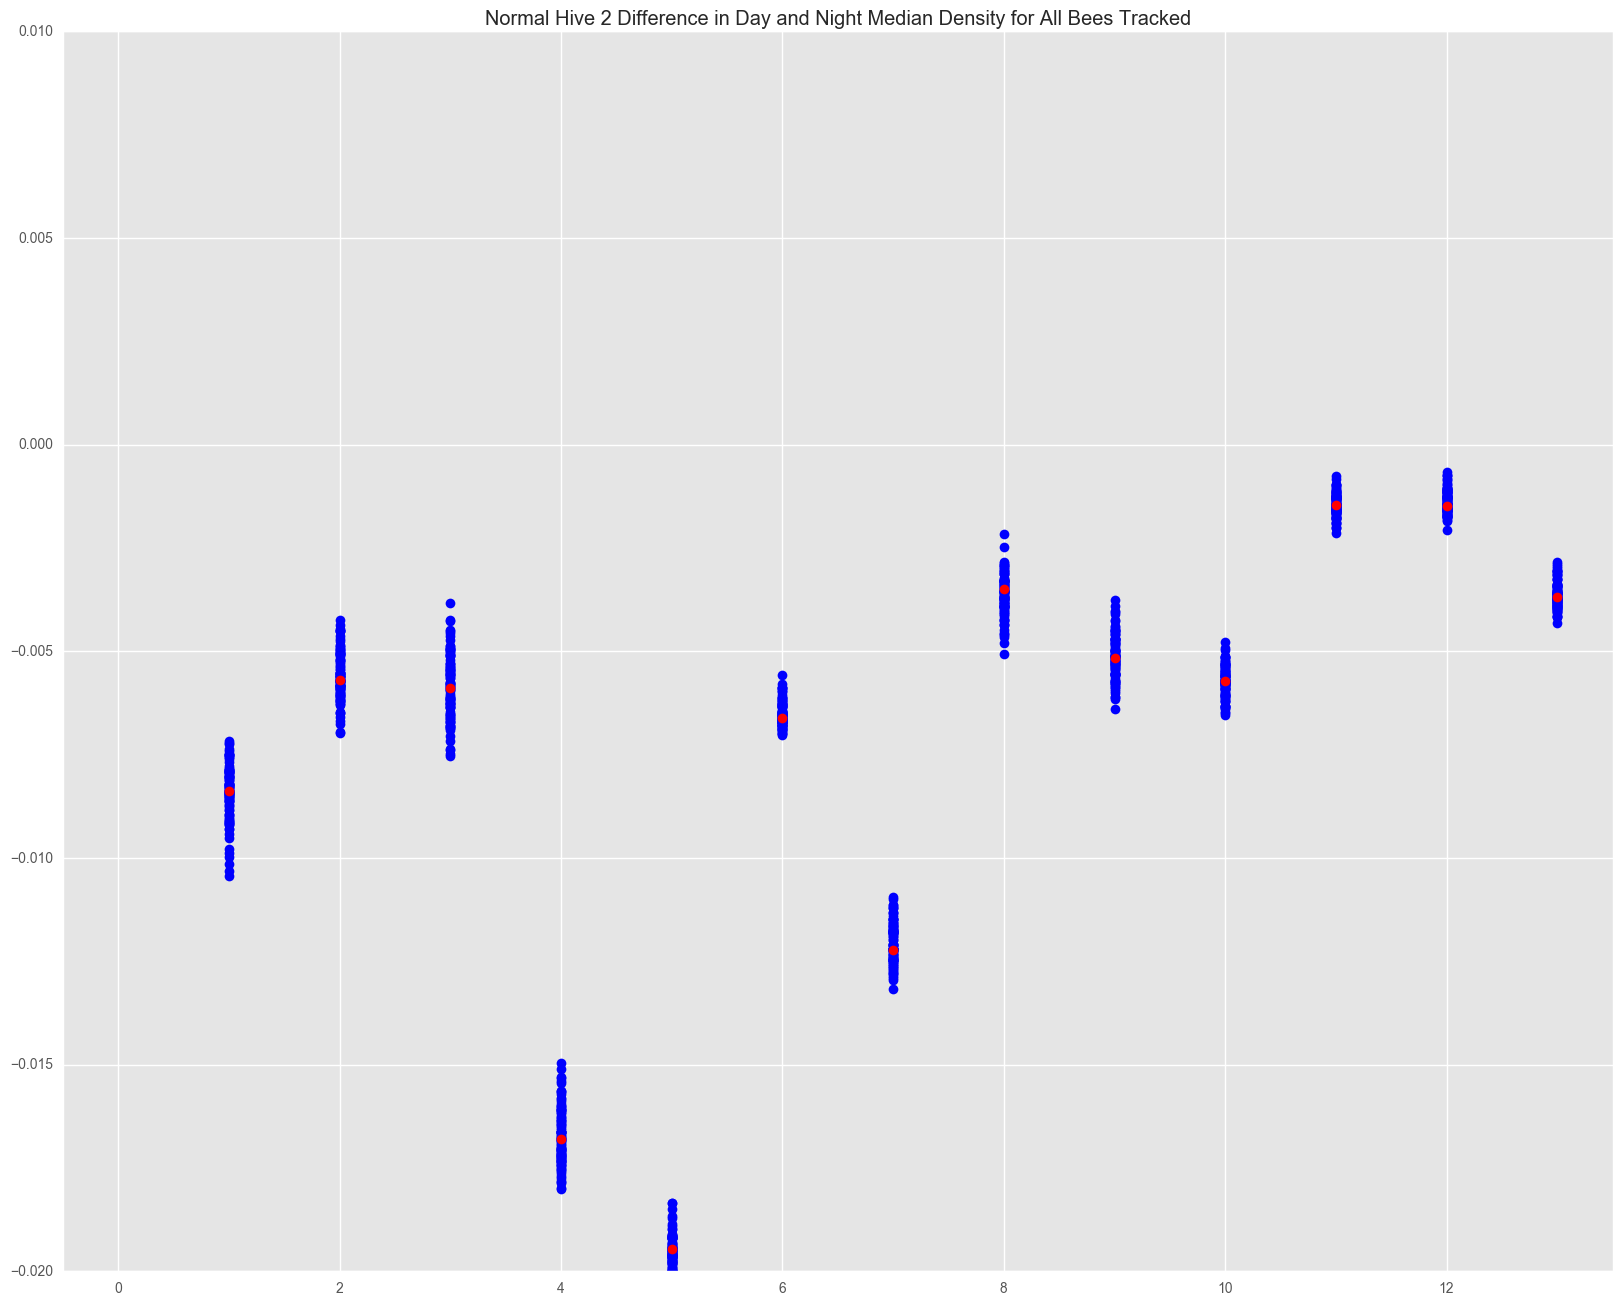

Difference in Day and Night Spread for All Bees Tracked (2, -3)


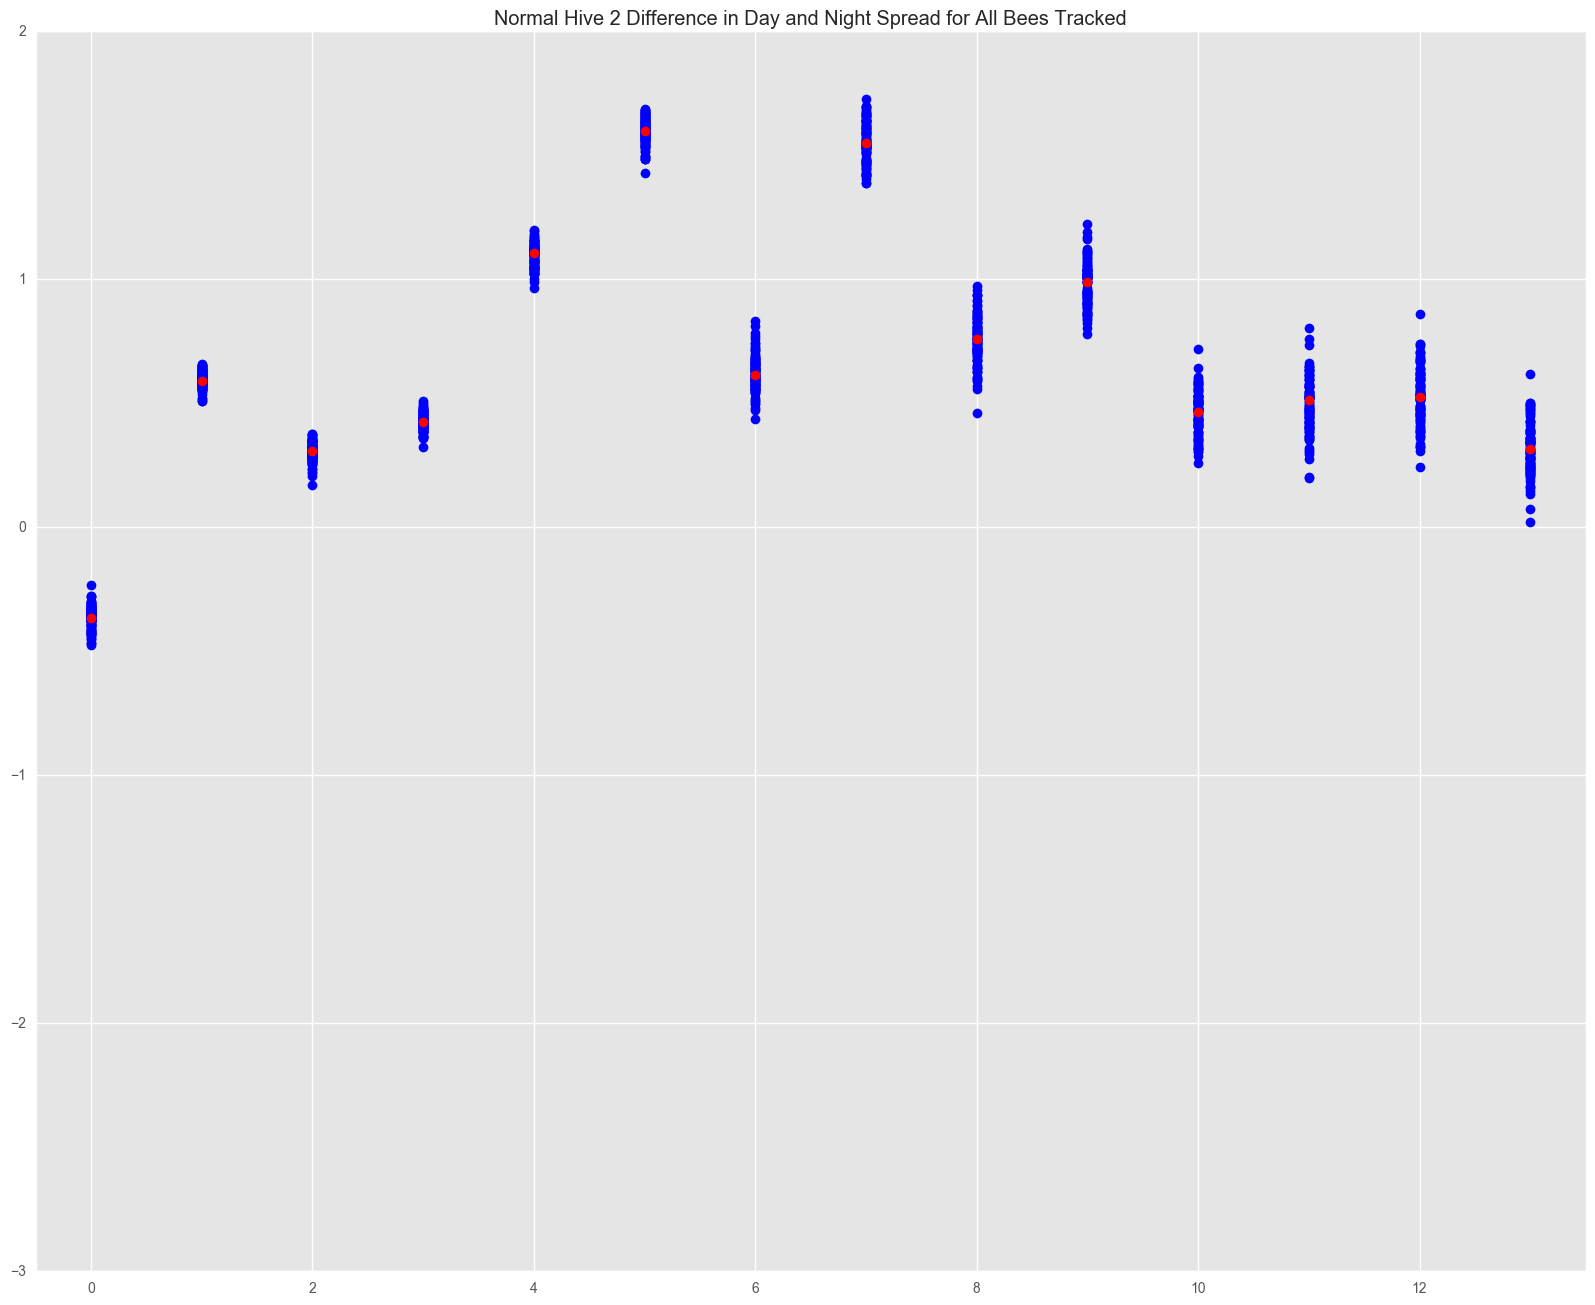

In [7]:
formatting = {'diff_spread_all_tracked_all_xy': ('Difference in Day and Night Spread for All Bees Tracked',(2,-3)), 'diff_median_all_tracked_speeds': ('Difference in Day and Night Median Speed for All Bees Tracked',(7.5,-2)), 'diff_median_density': ('Difference in Day and Night Median Density for All Bees Tracked',(0.01,-0.02)), 'diff_percent_idle_all_tracked': ('Difference in Day and Night Percentage of Time Idle for All Bees Tracked',(0.1,-0.1))}

for i, df in enumerate(real_result_df_list):
    night_df = df[df['time_period']=='night']
    
    for metric in bootstrapped_permutations[0].keys():
        
        plt.figure()

        for bootstrapped_days in bootstrapped_permutations[i][metric]:
            plt.plot(bootstrapped_days[0:14], marker='o', color='b', linestyle="None")

        plt.plot(list(night_df[metric])[0:14], marker='o', color='r', linestyle="None") #, label='{}'.format(hive_names[i])
        
        metric_title, y_axis = formatting[metric]
        print(metric_title, y_axis)
        
        plt.title('{} {}'.format(hive_names[i], metric_title))
        plt.xlim(-0.5,13.5)
        plt.ylim(ymax=y_axis[0], ymin=y_axis[1])
        plt.show()

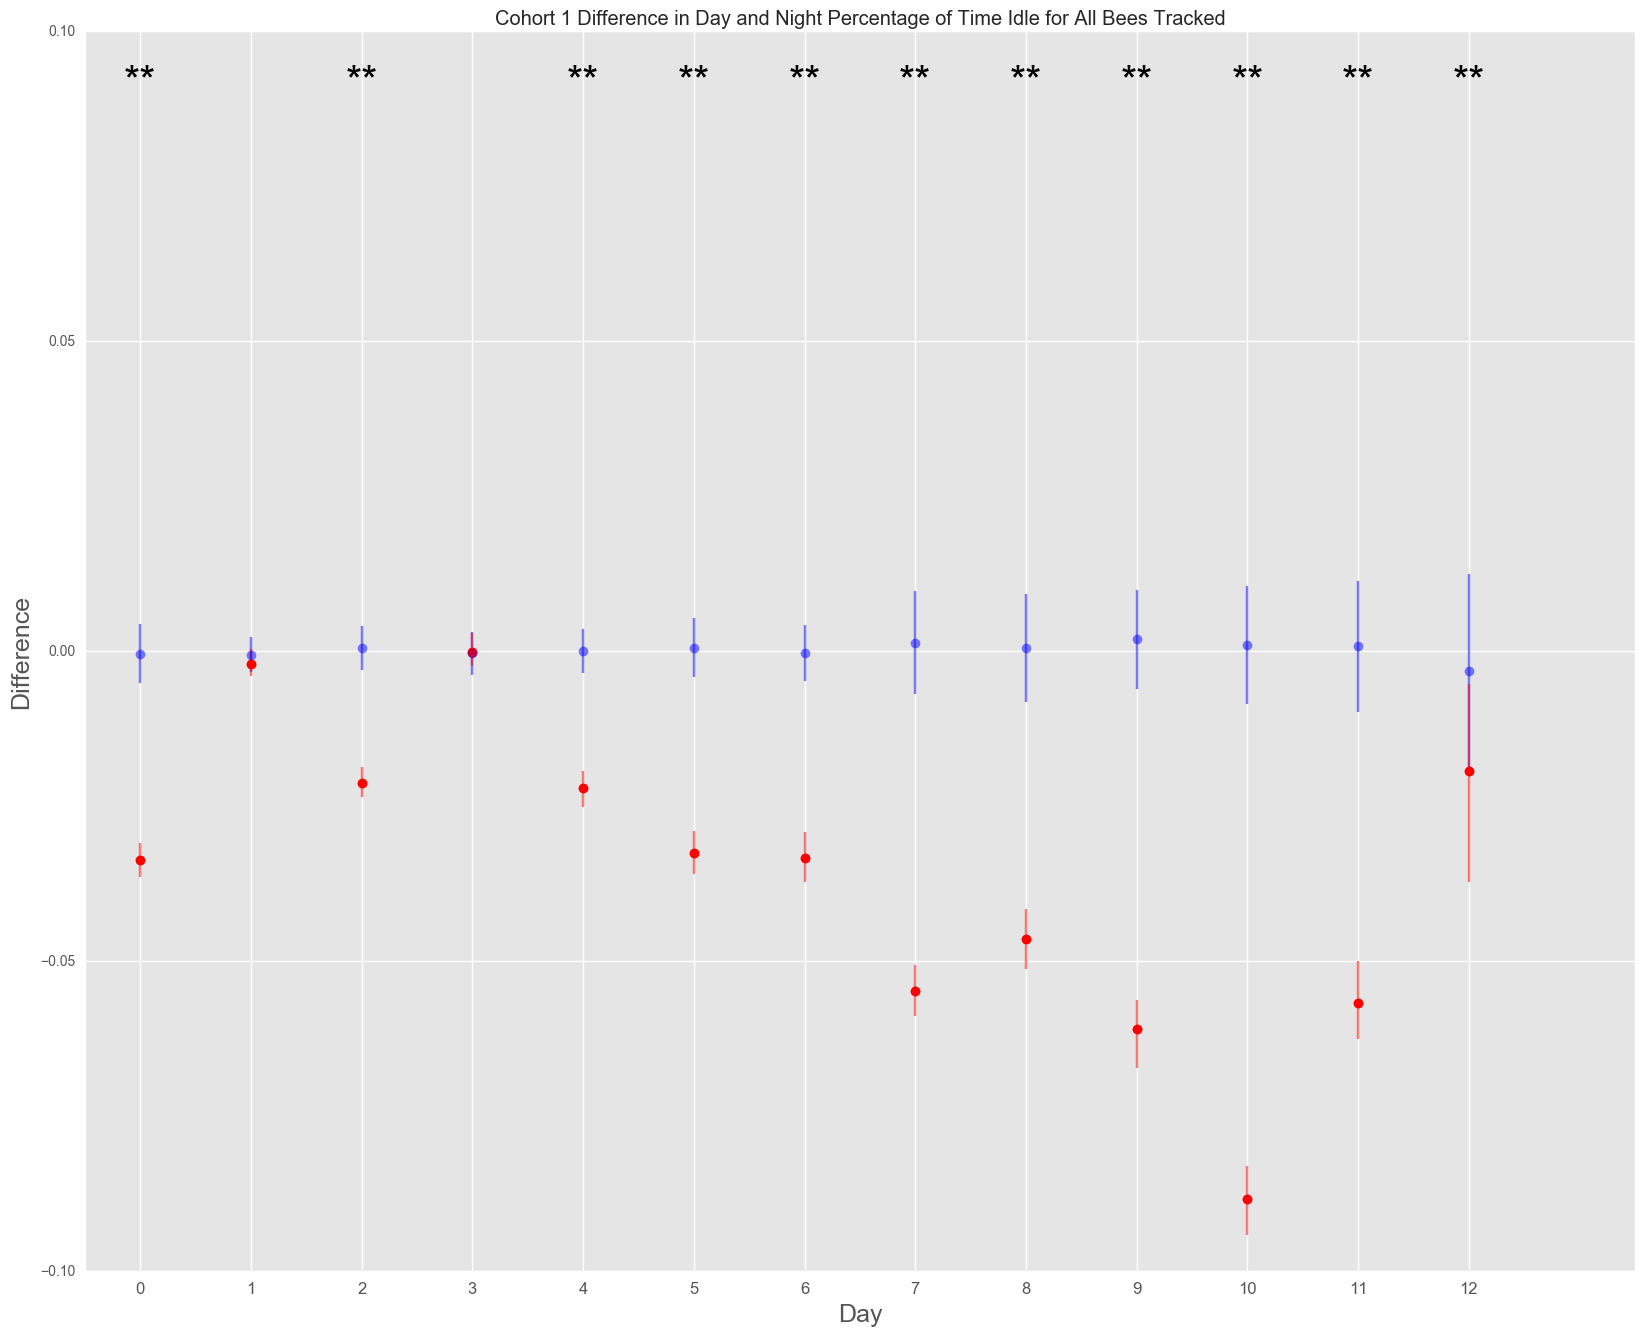

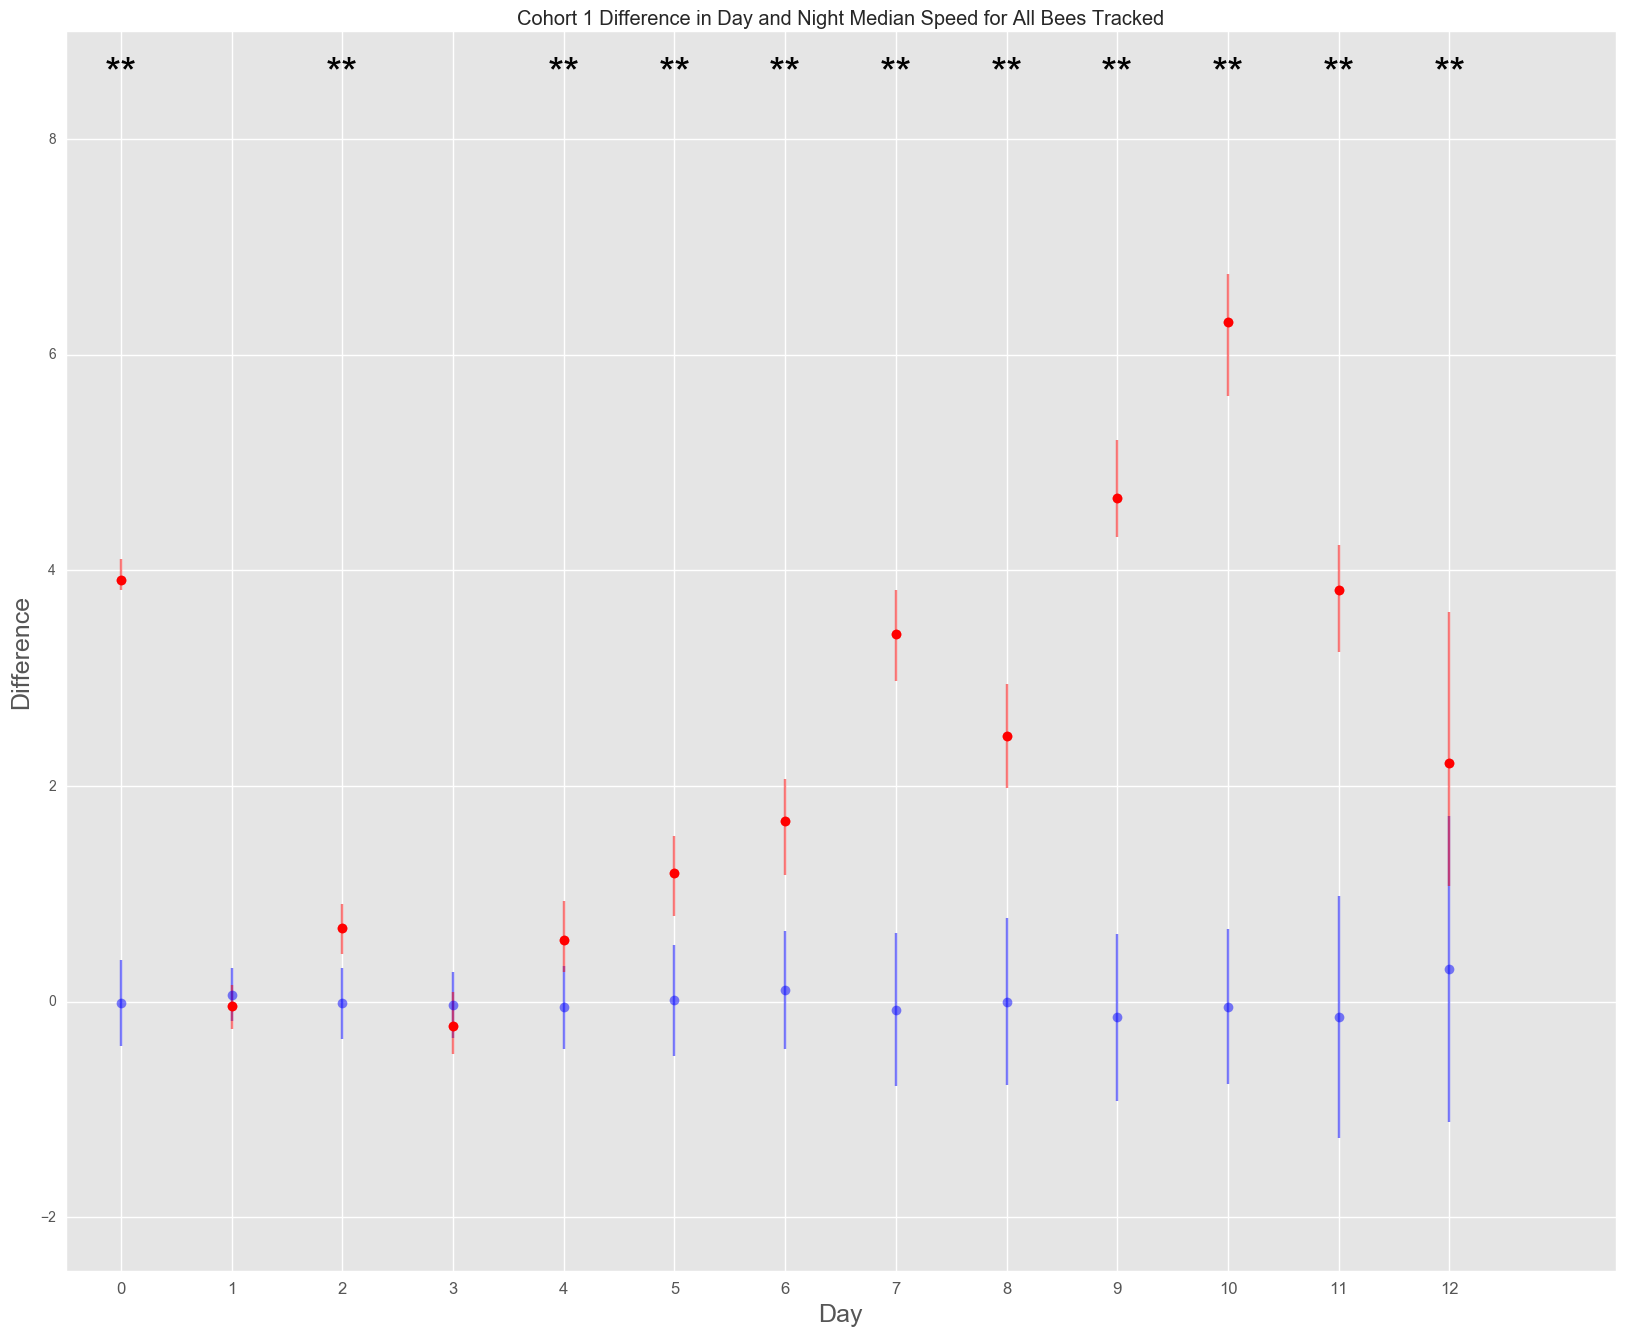

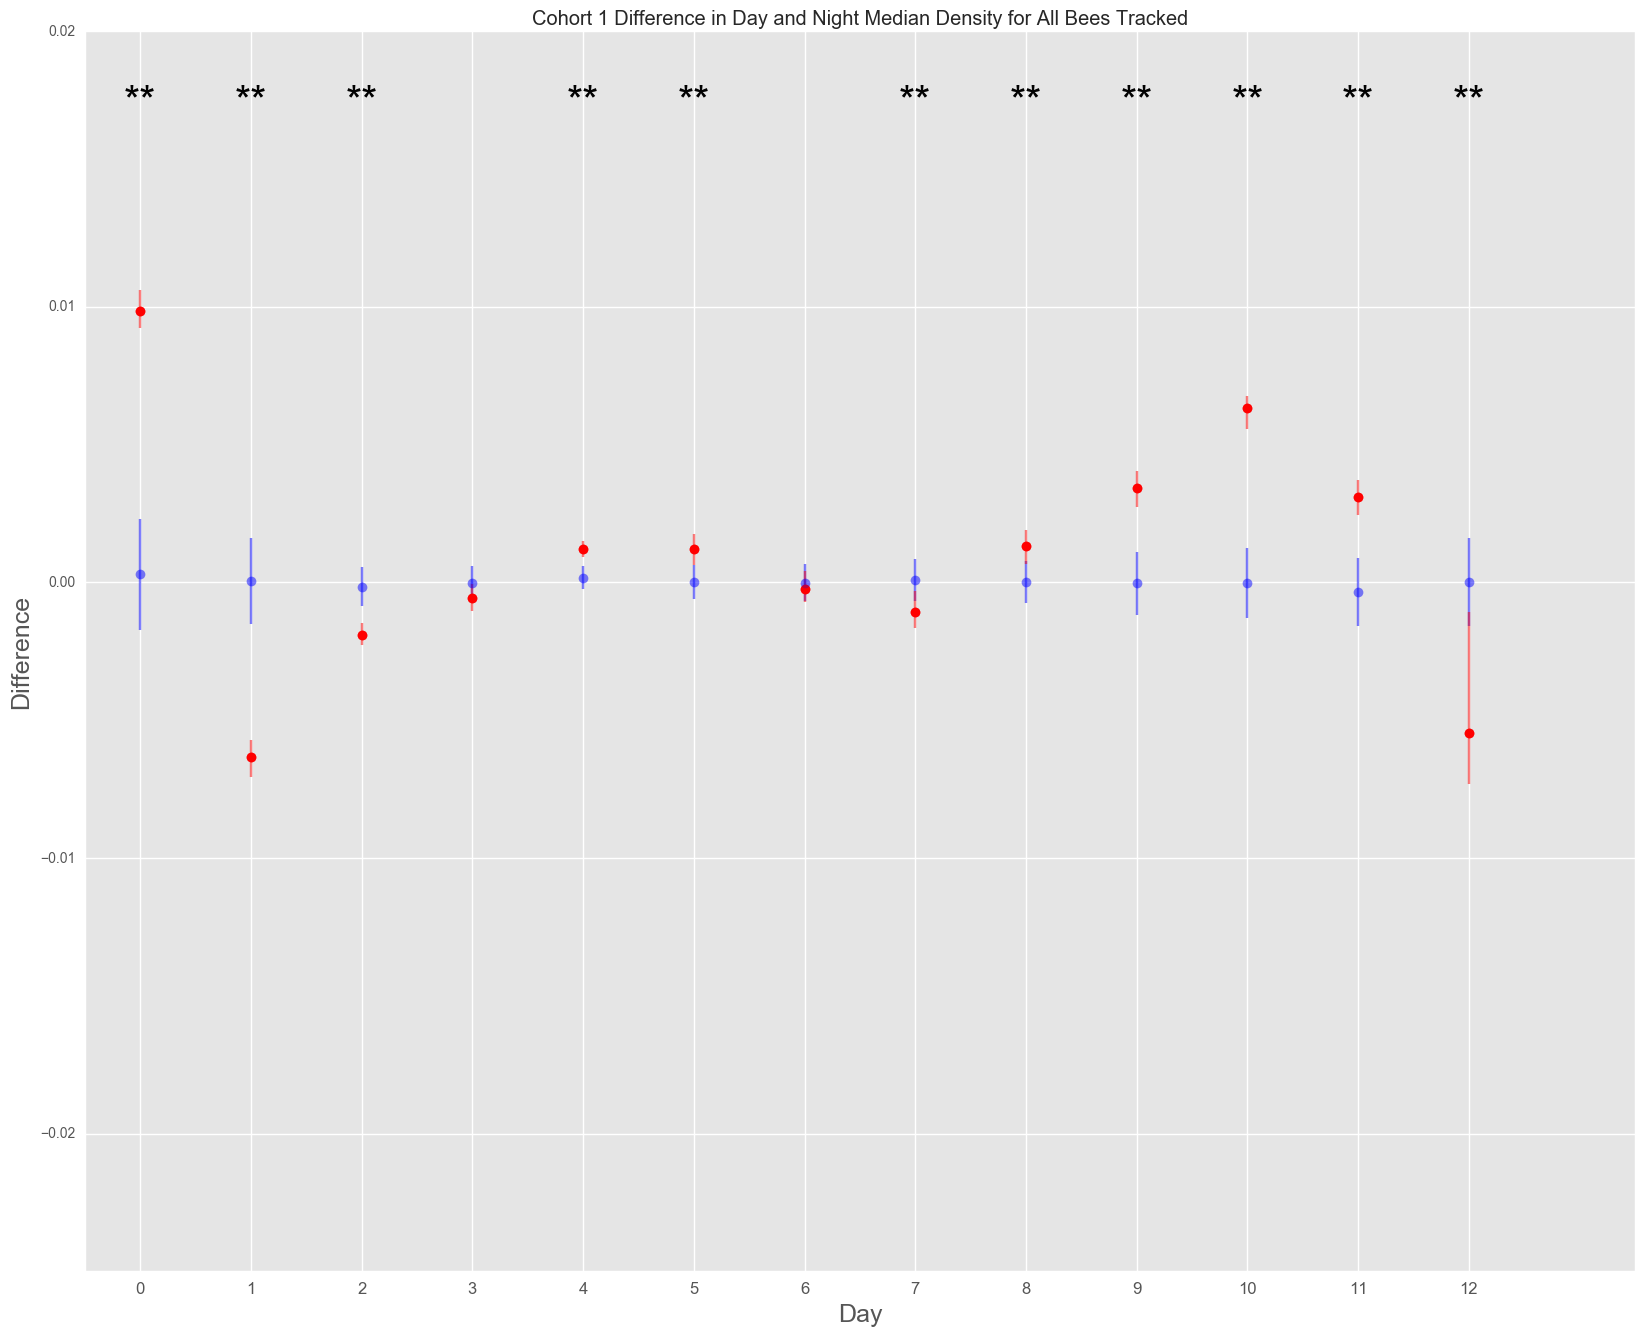

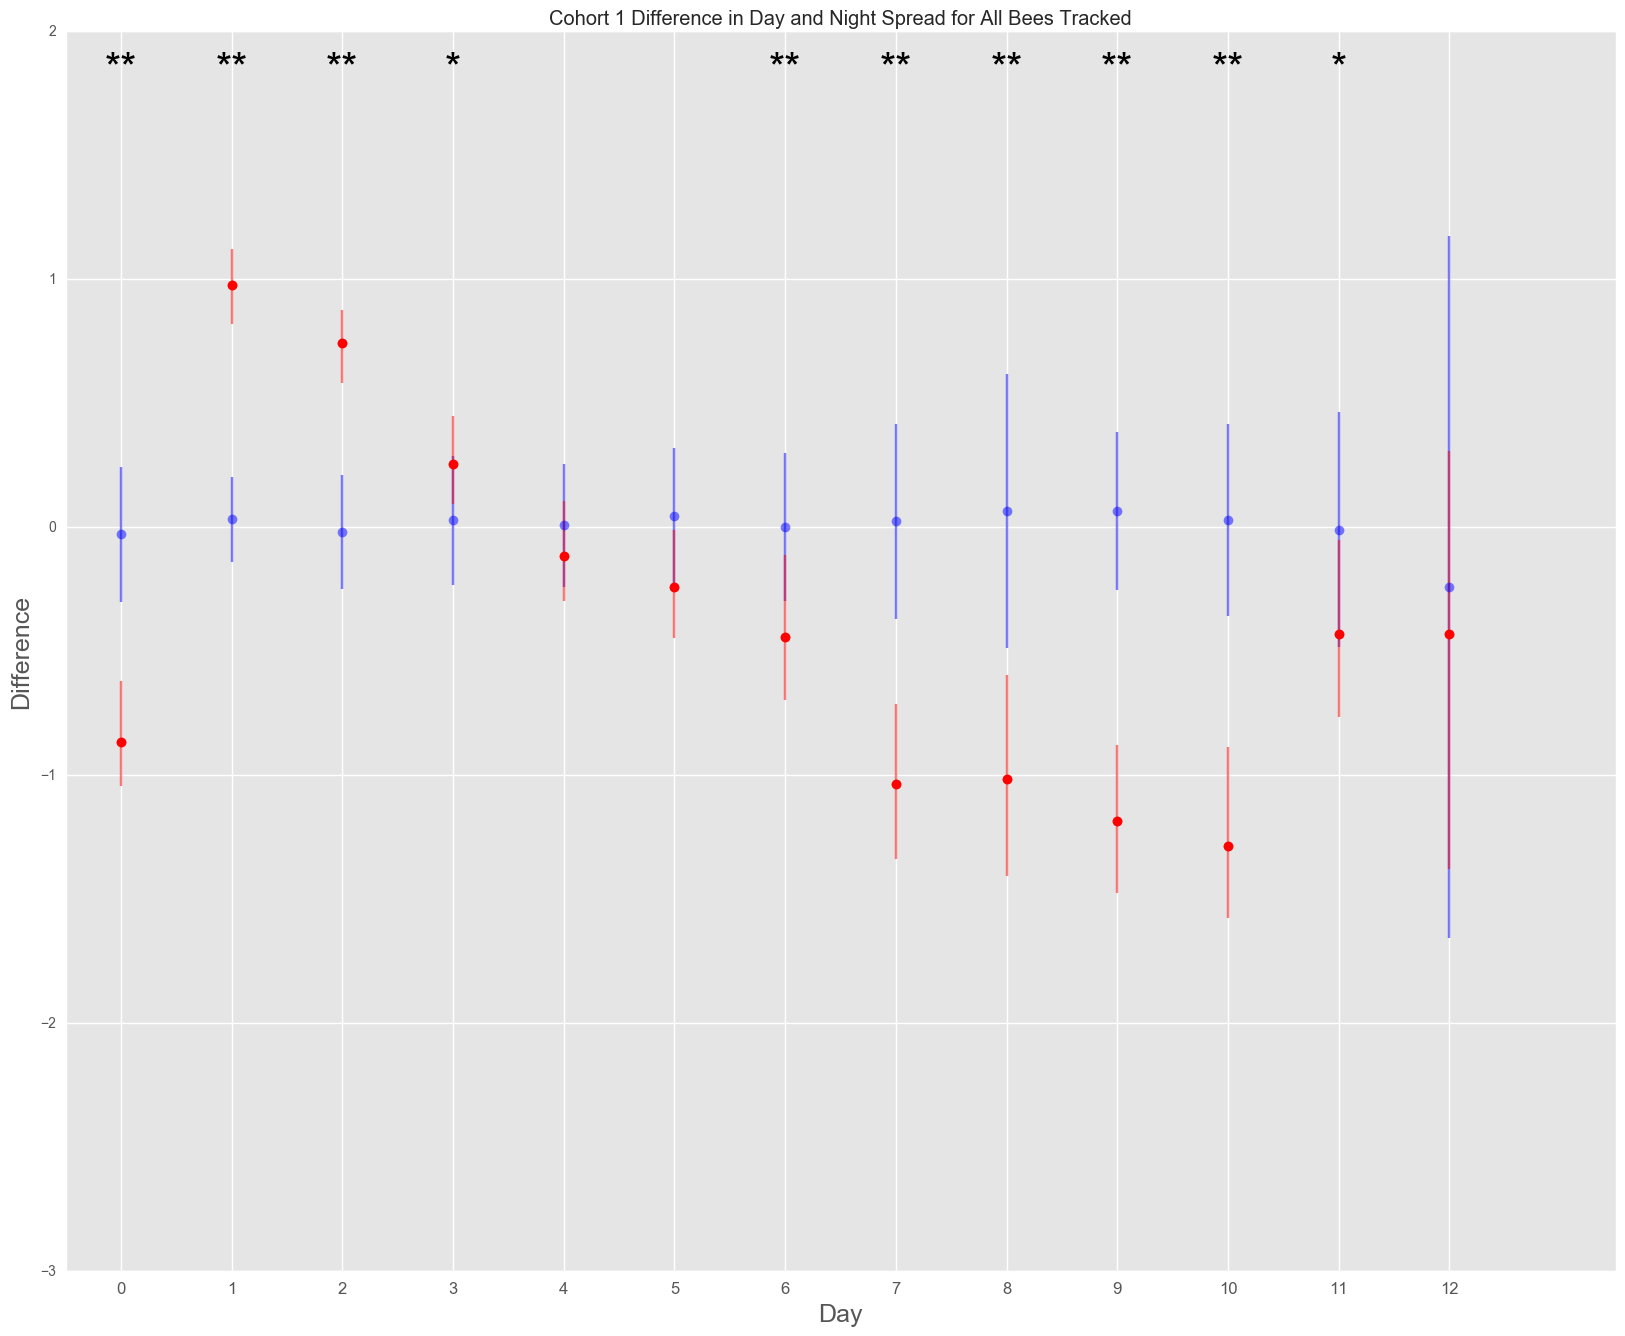

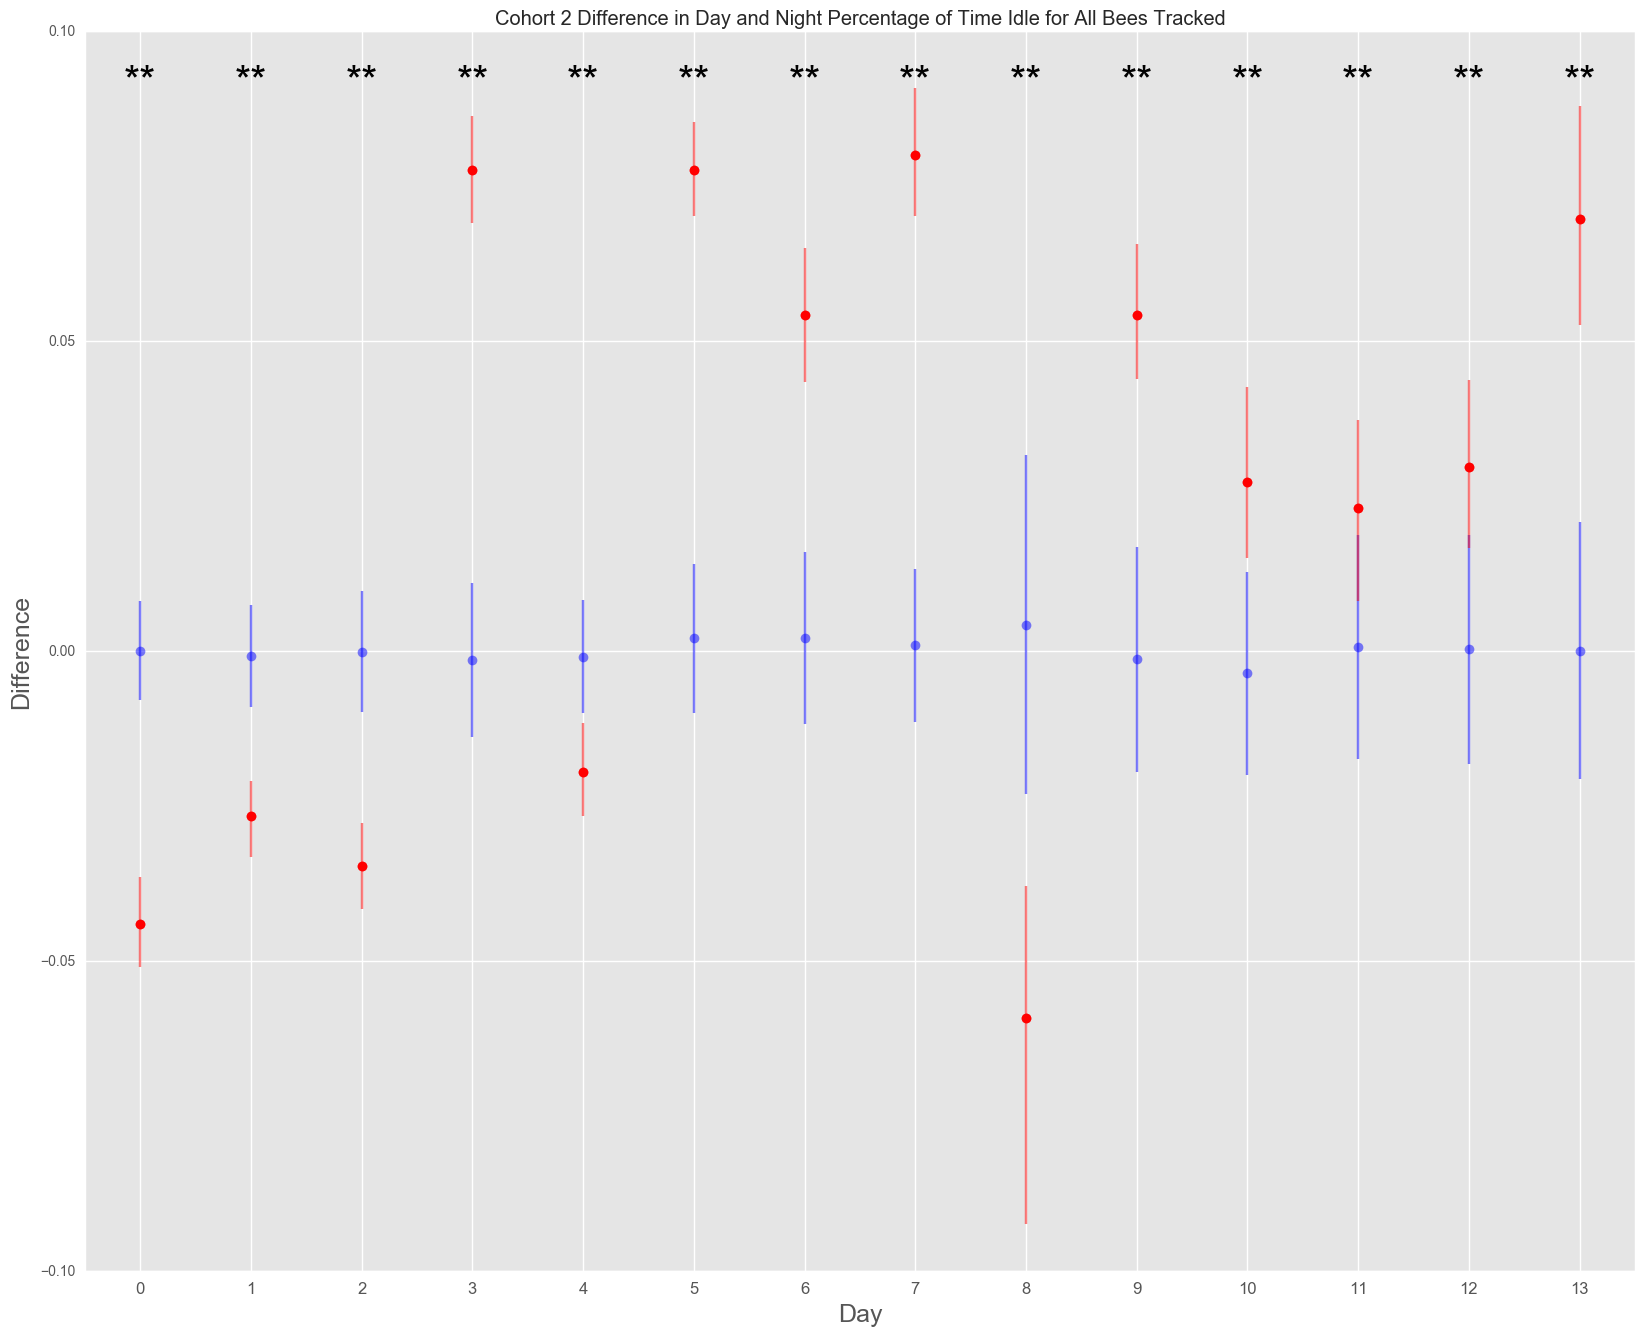

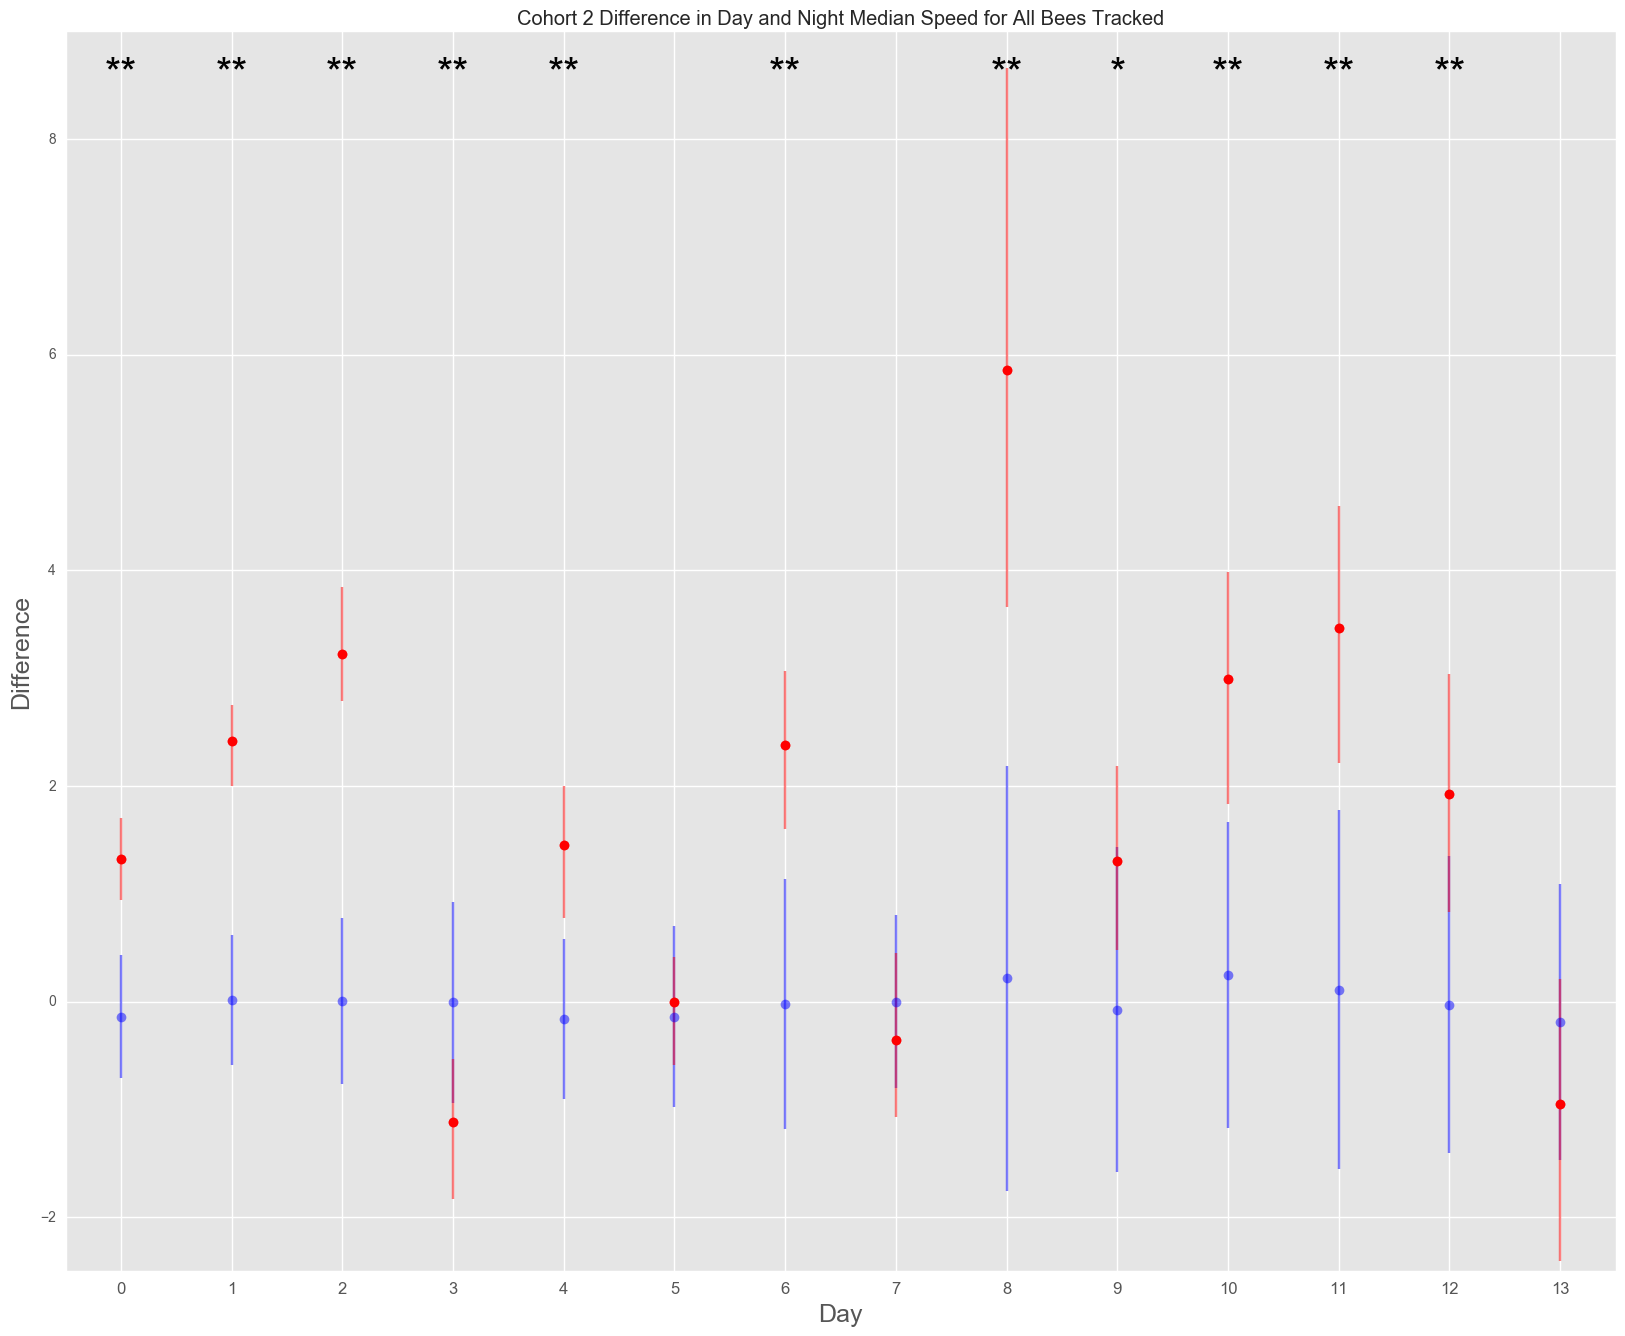

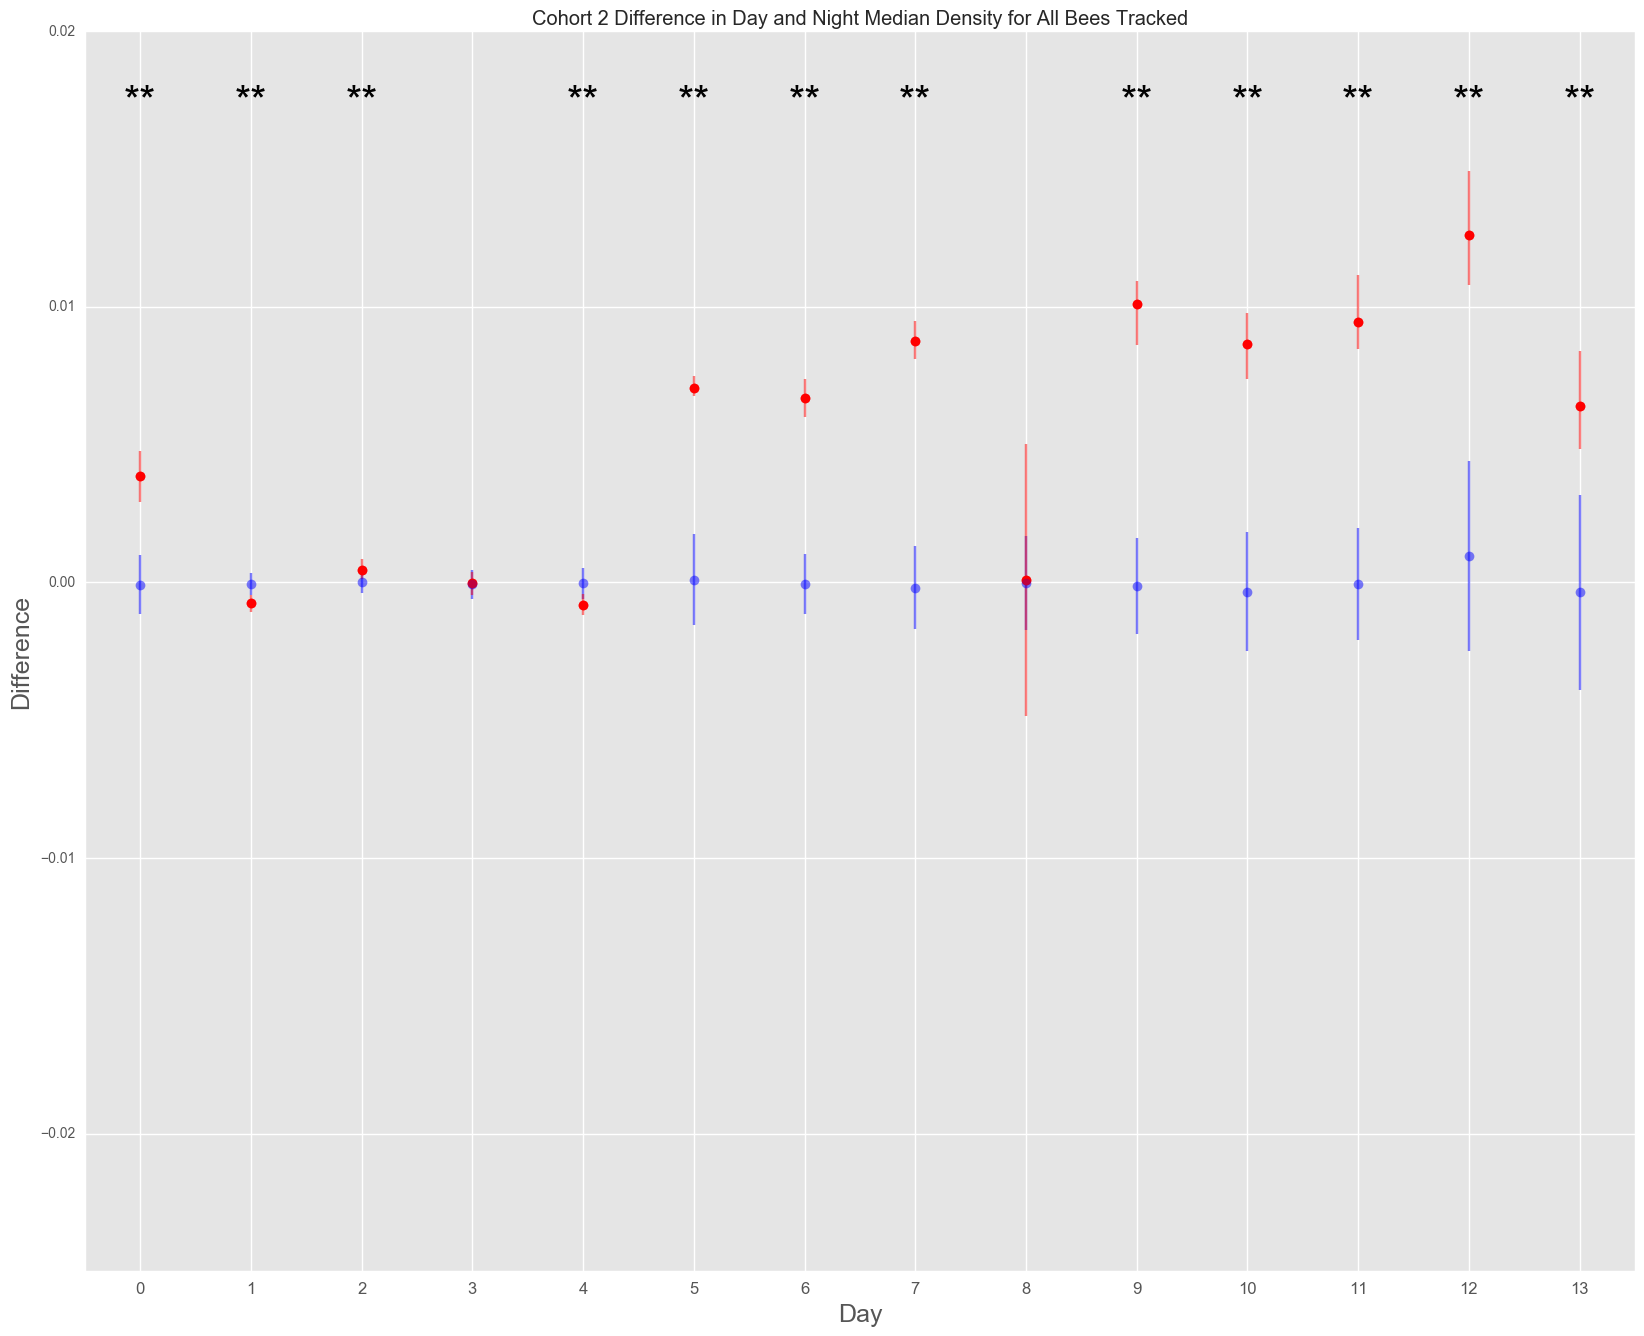

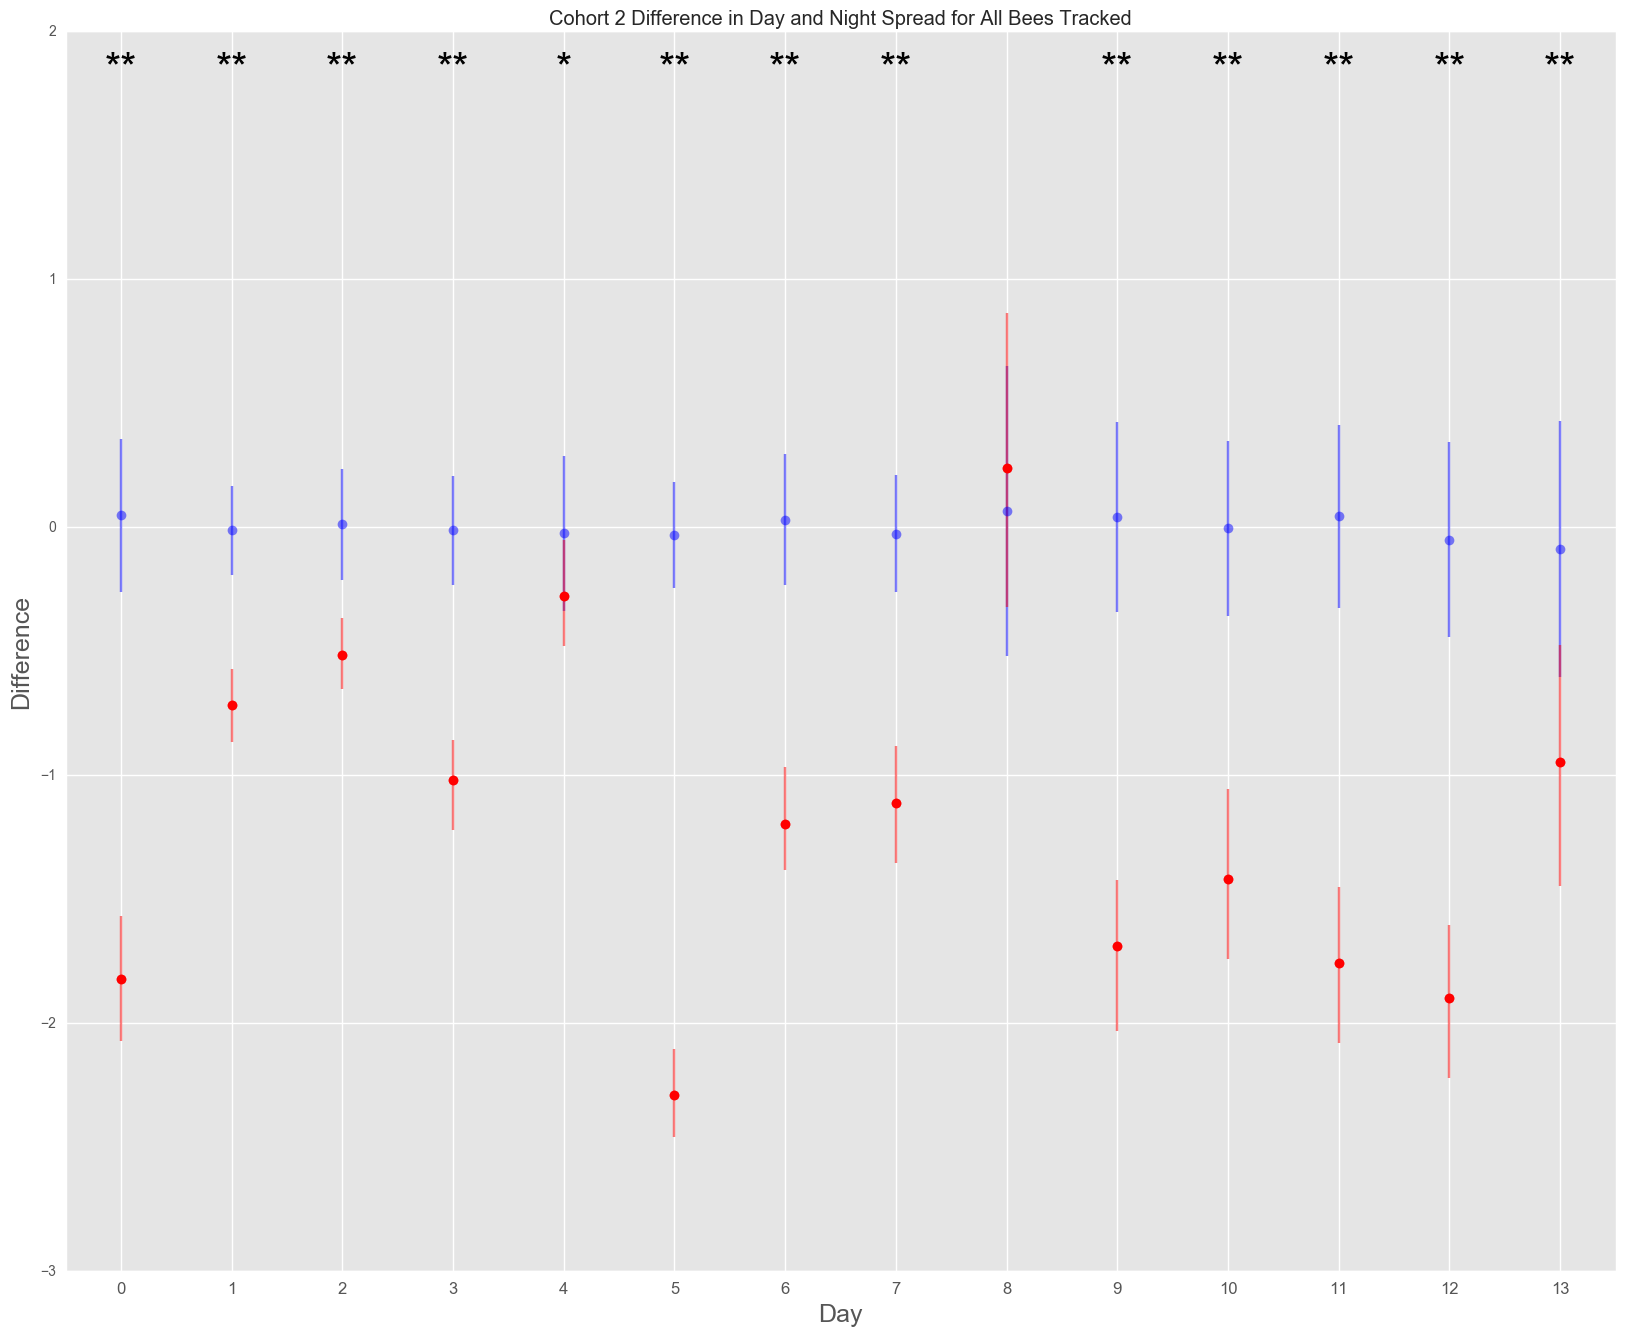

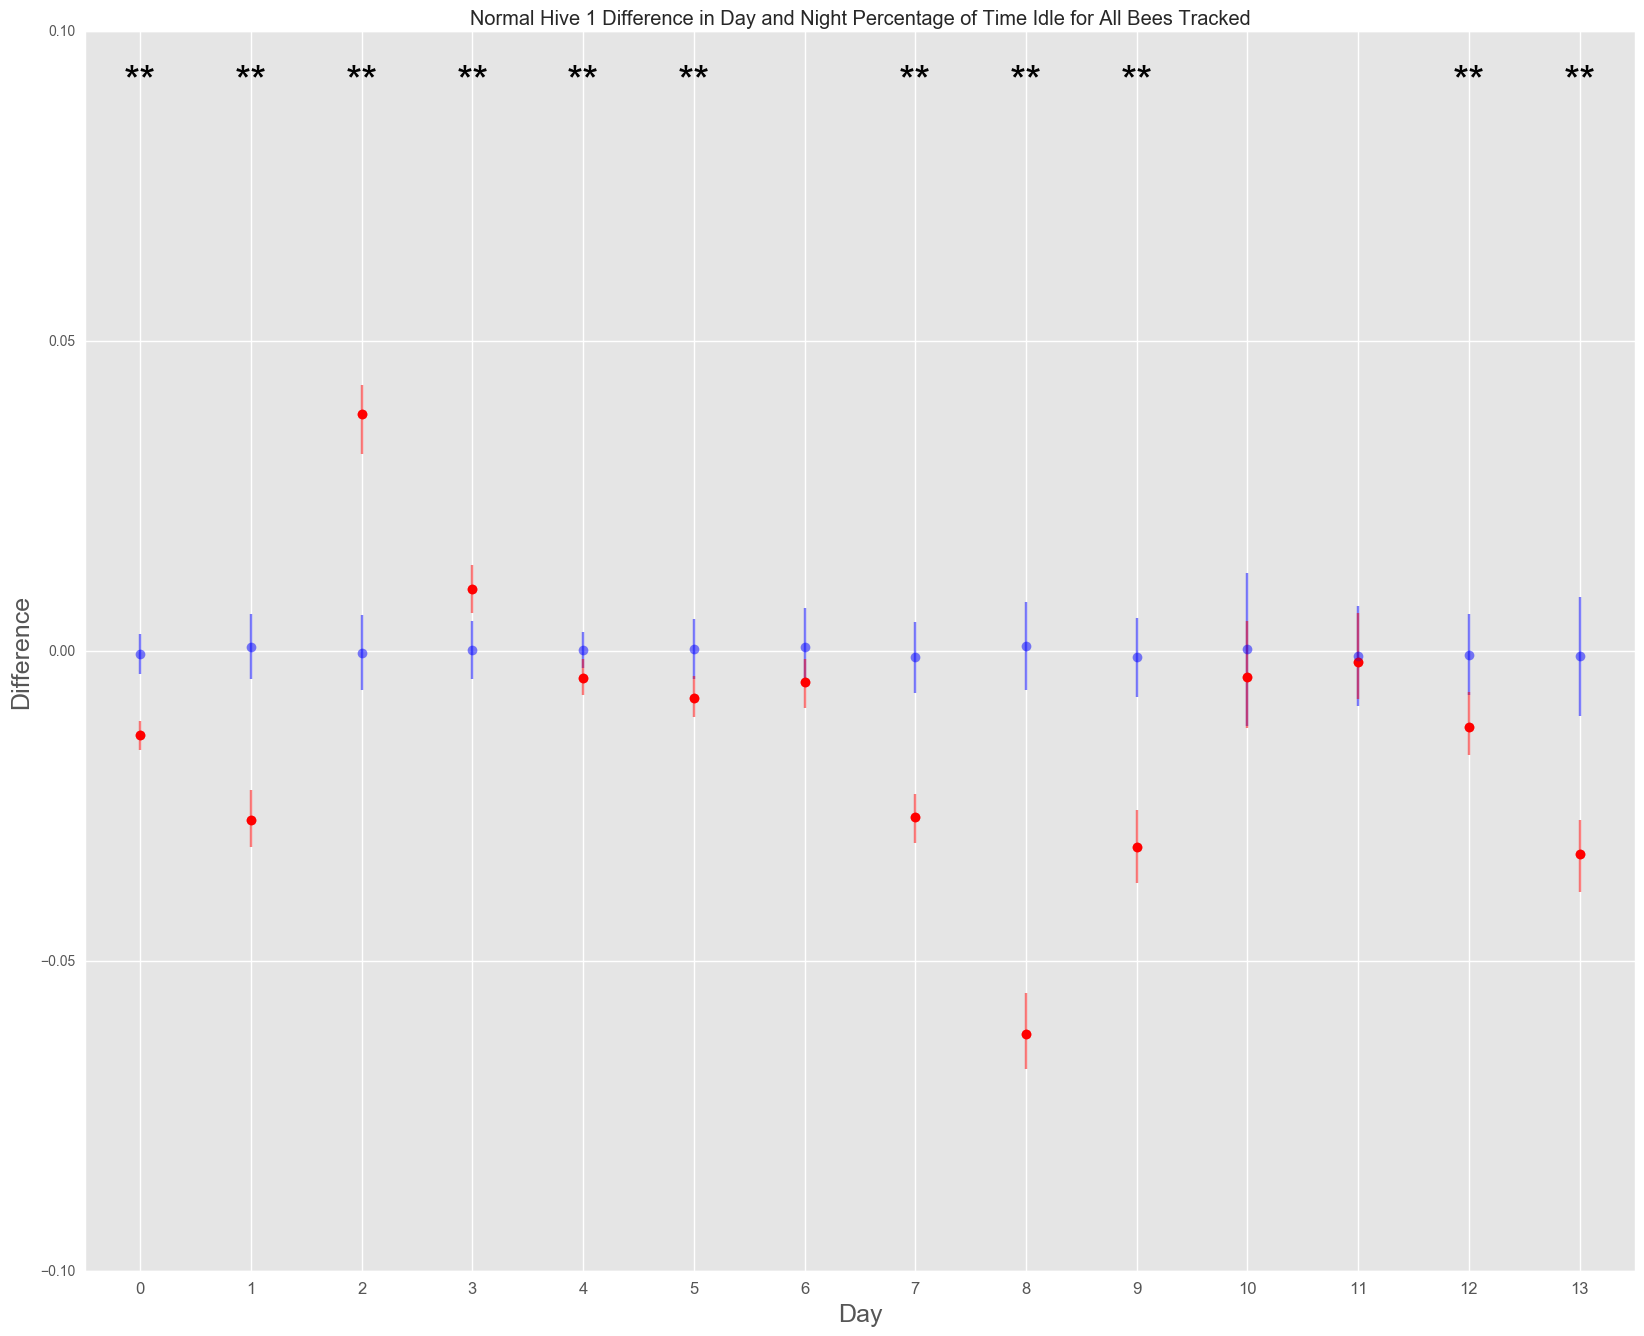

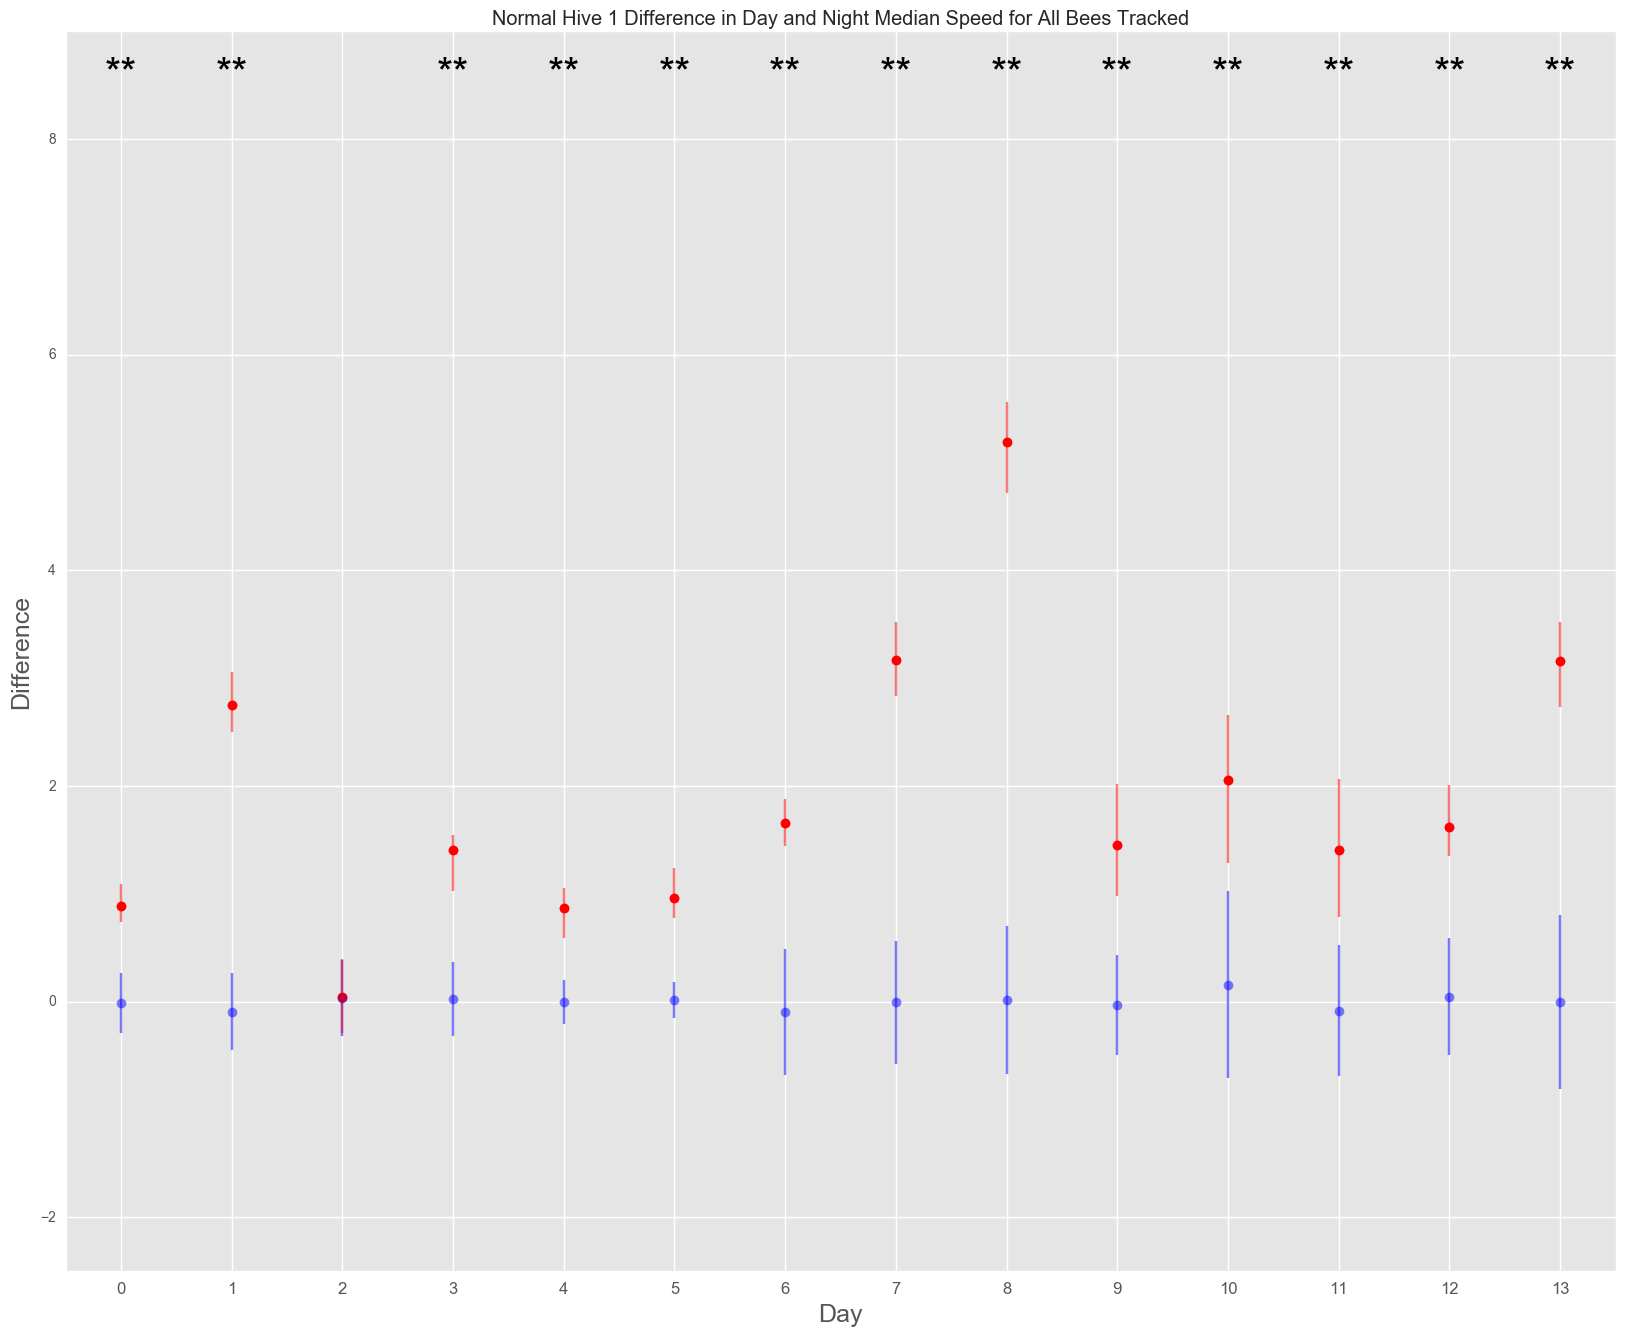

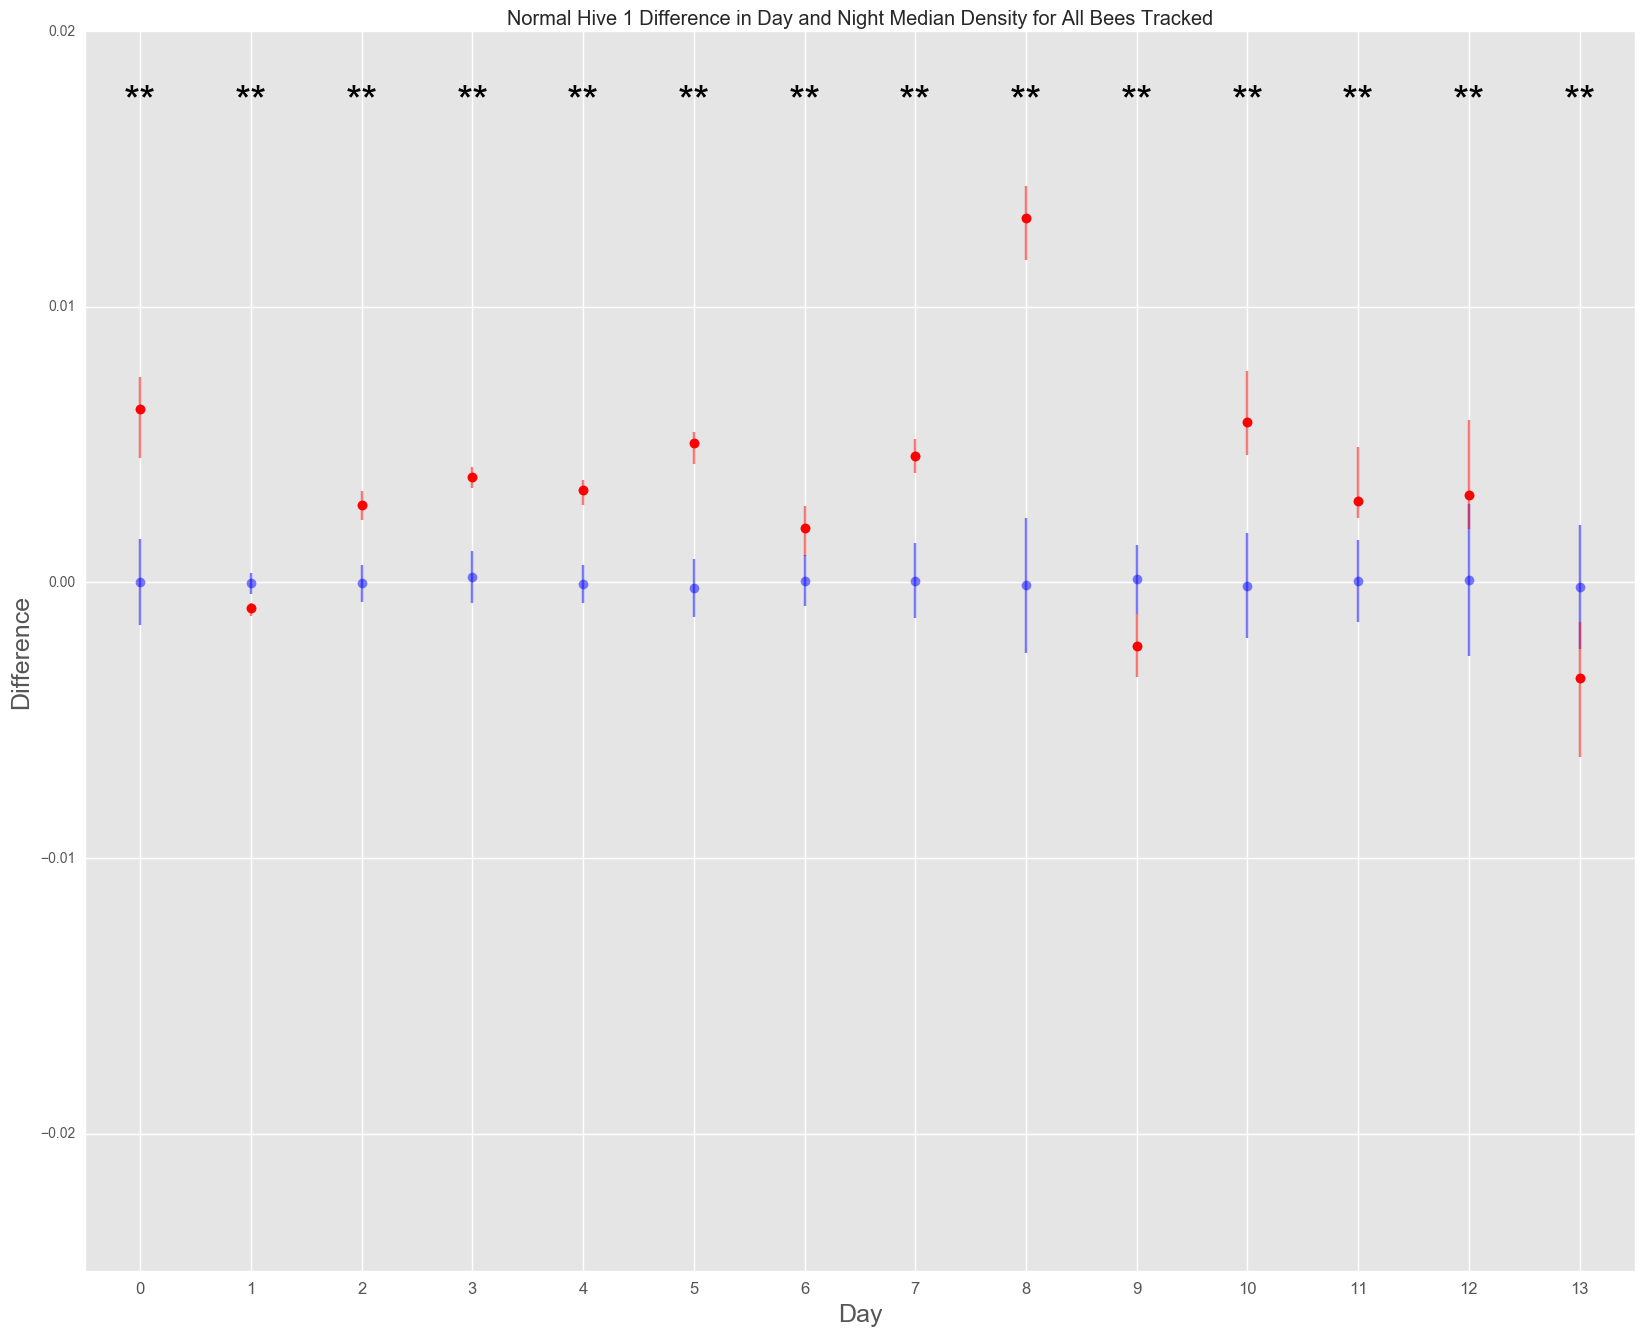

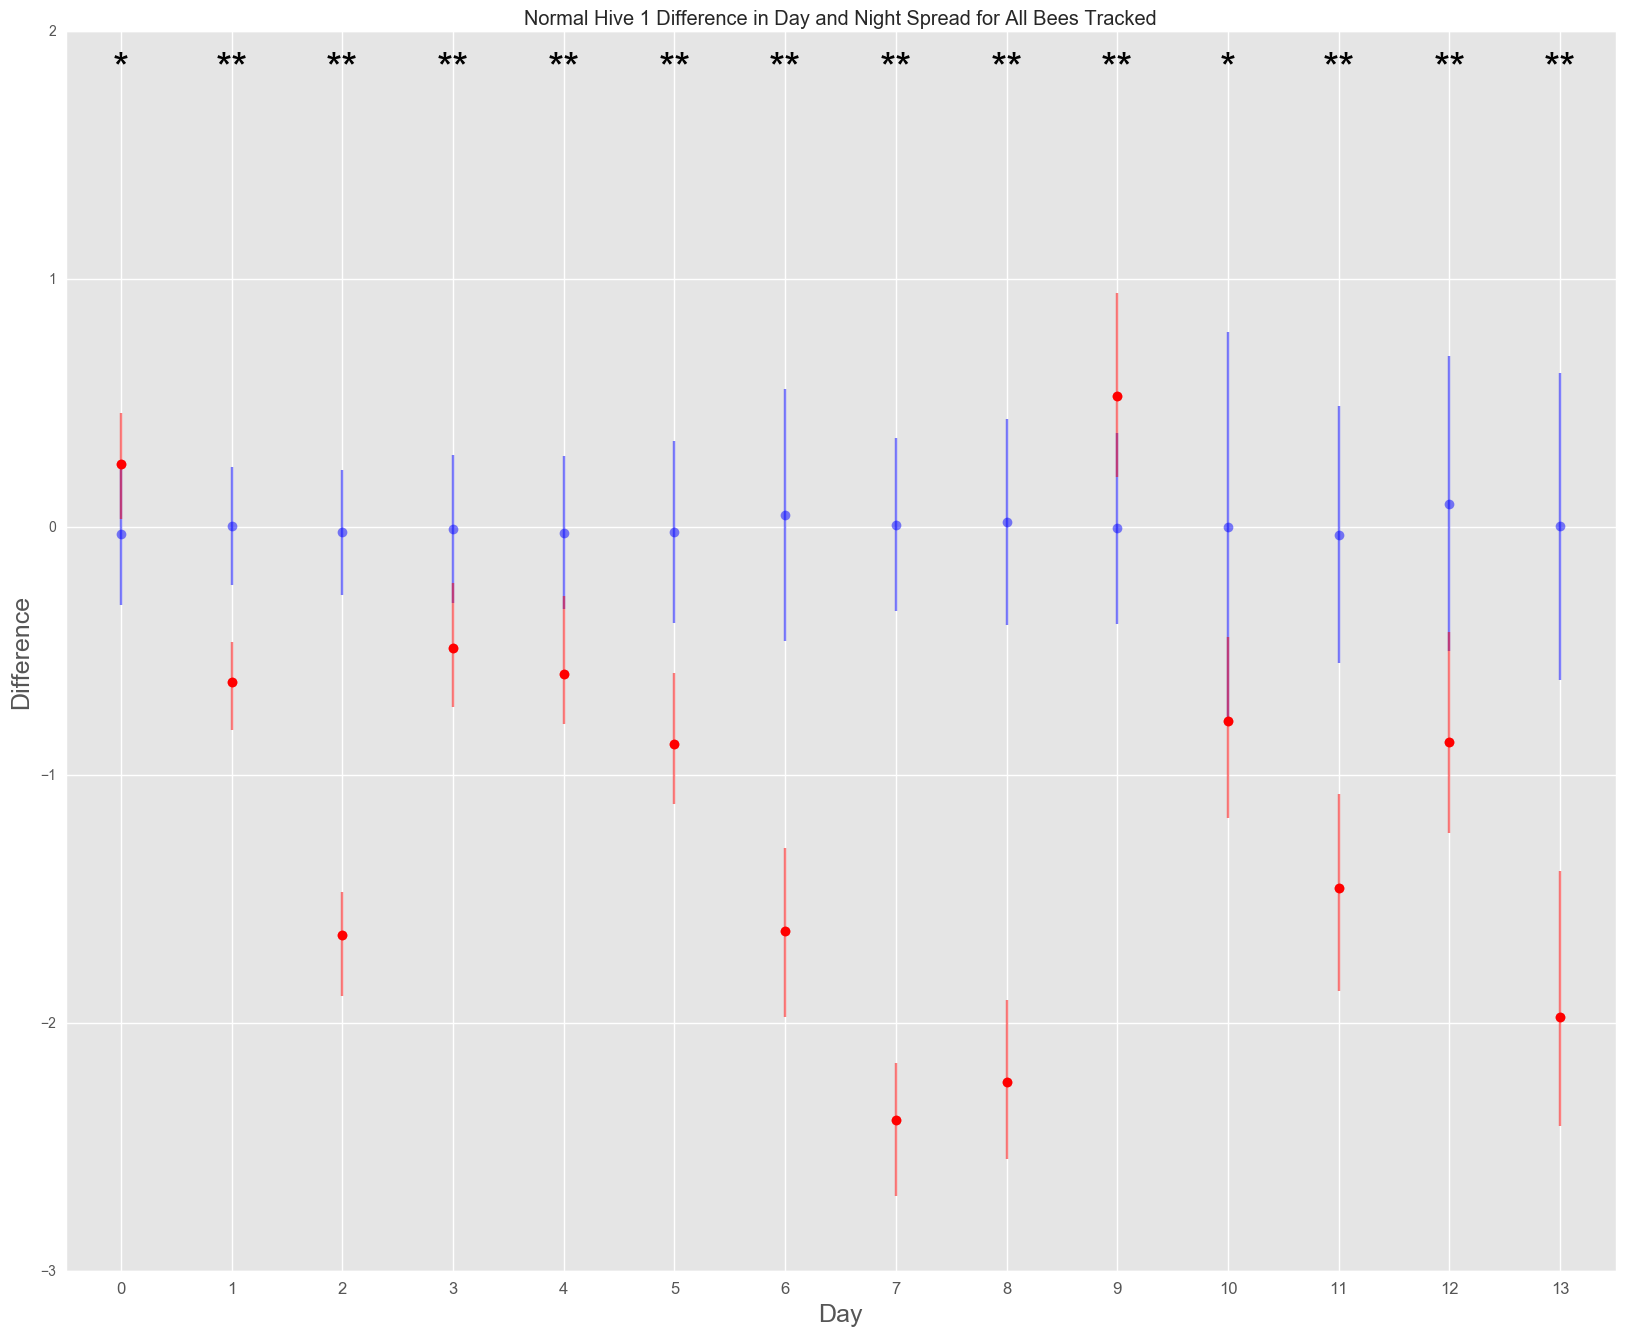

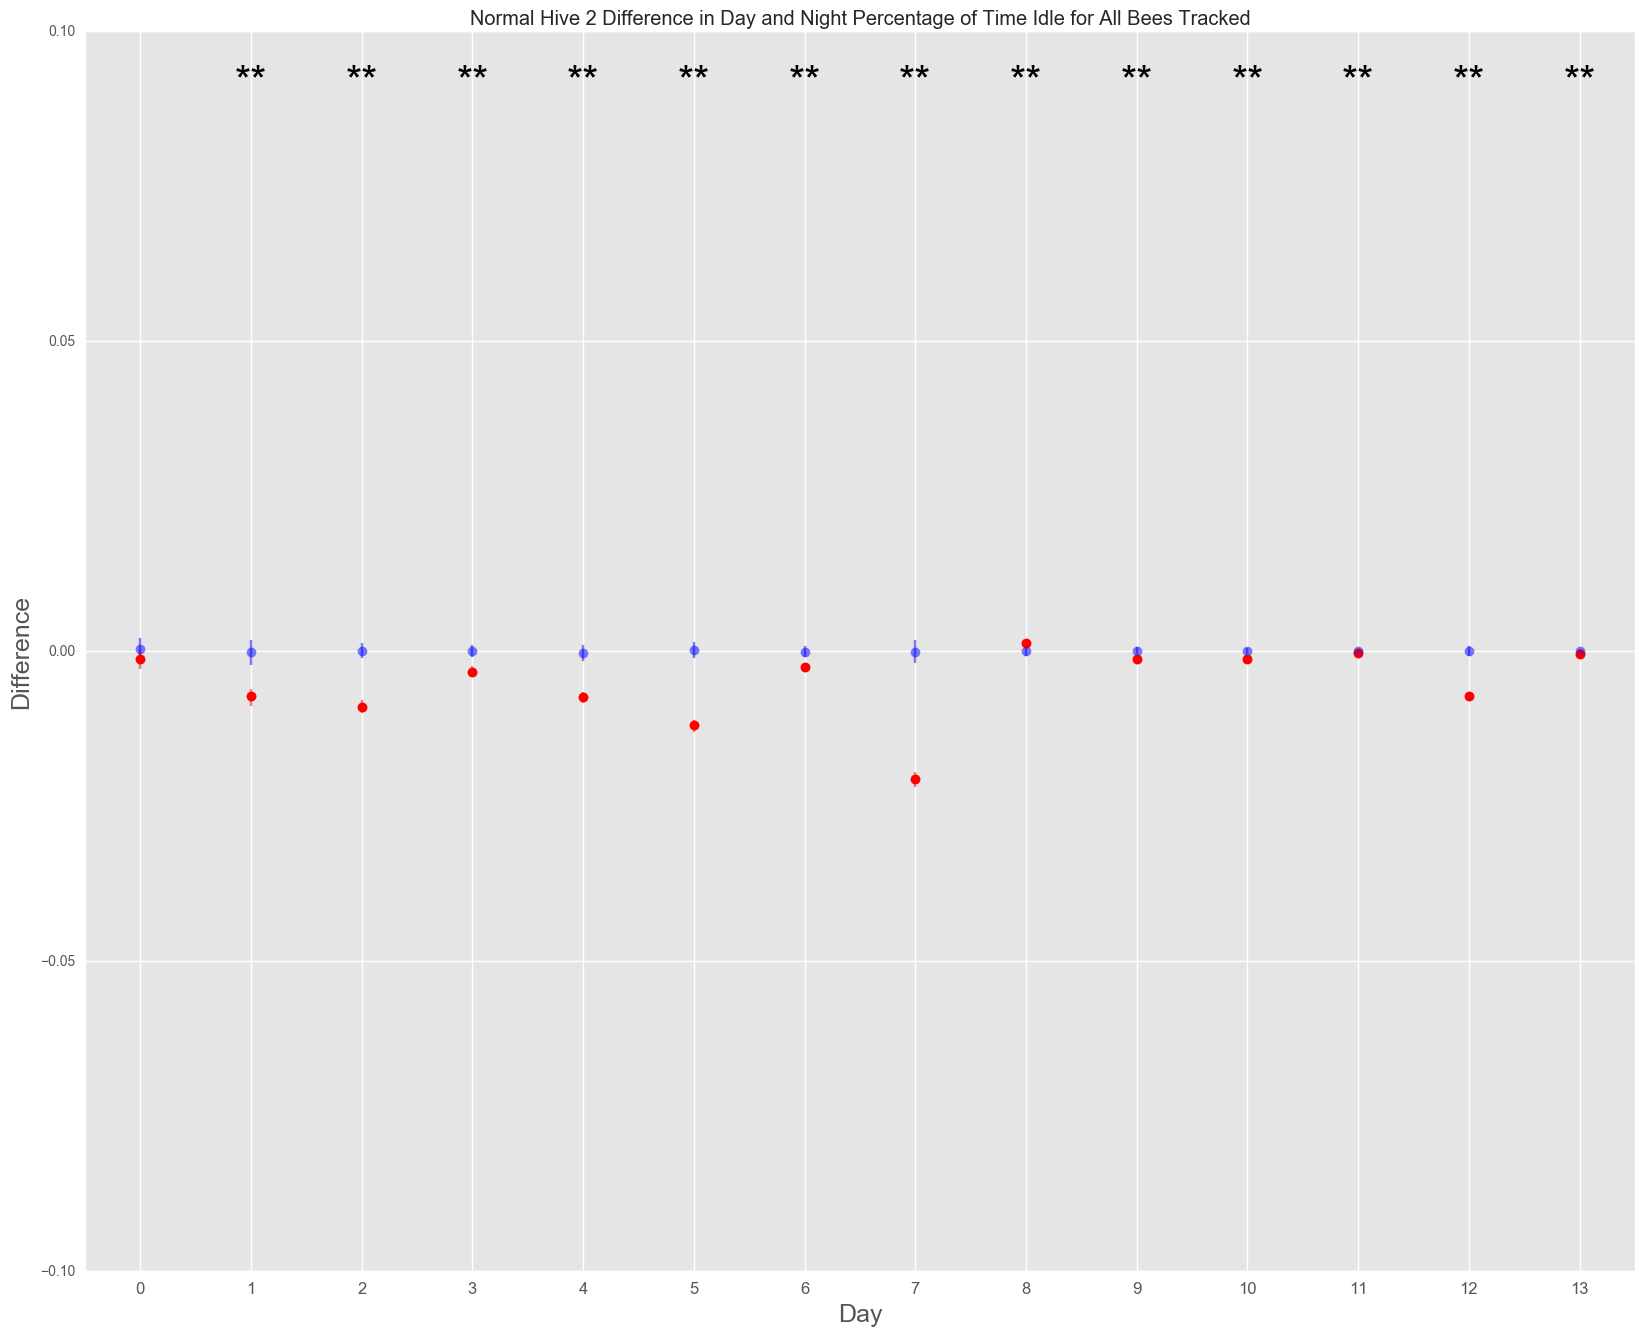

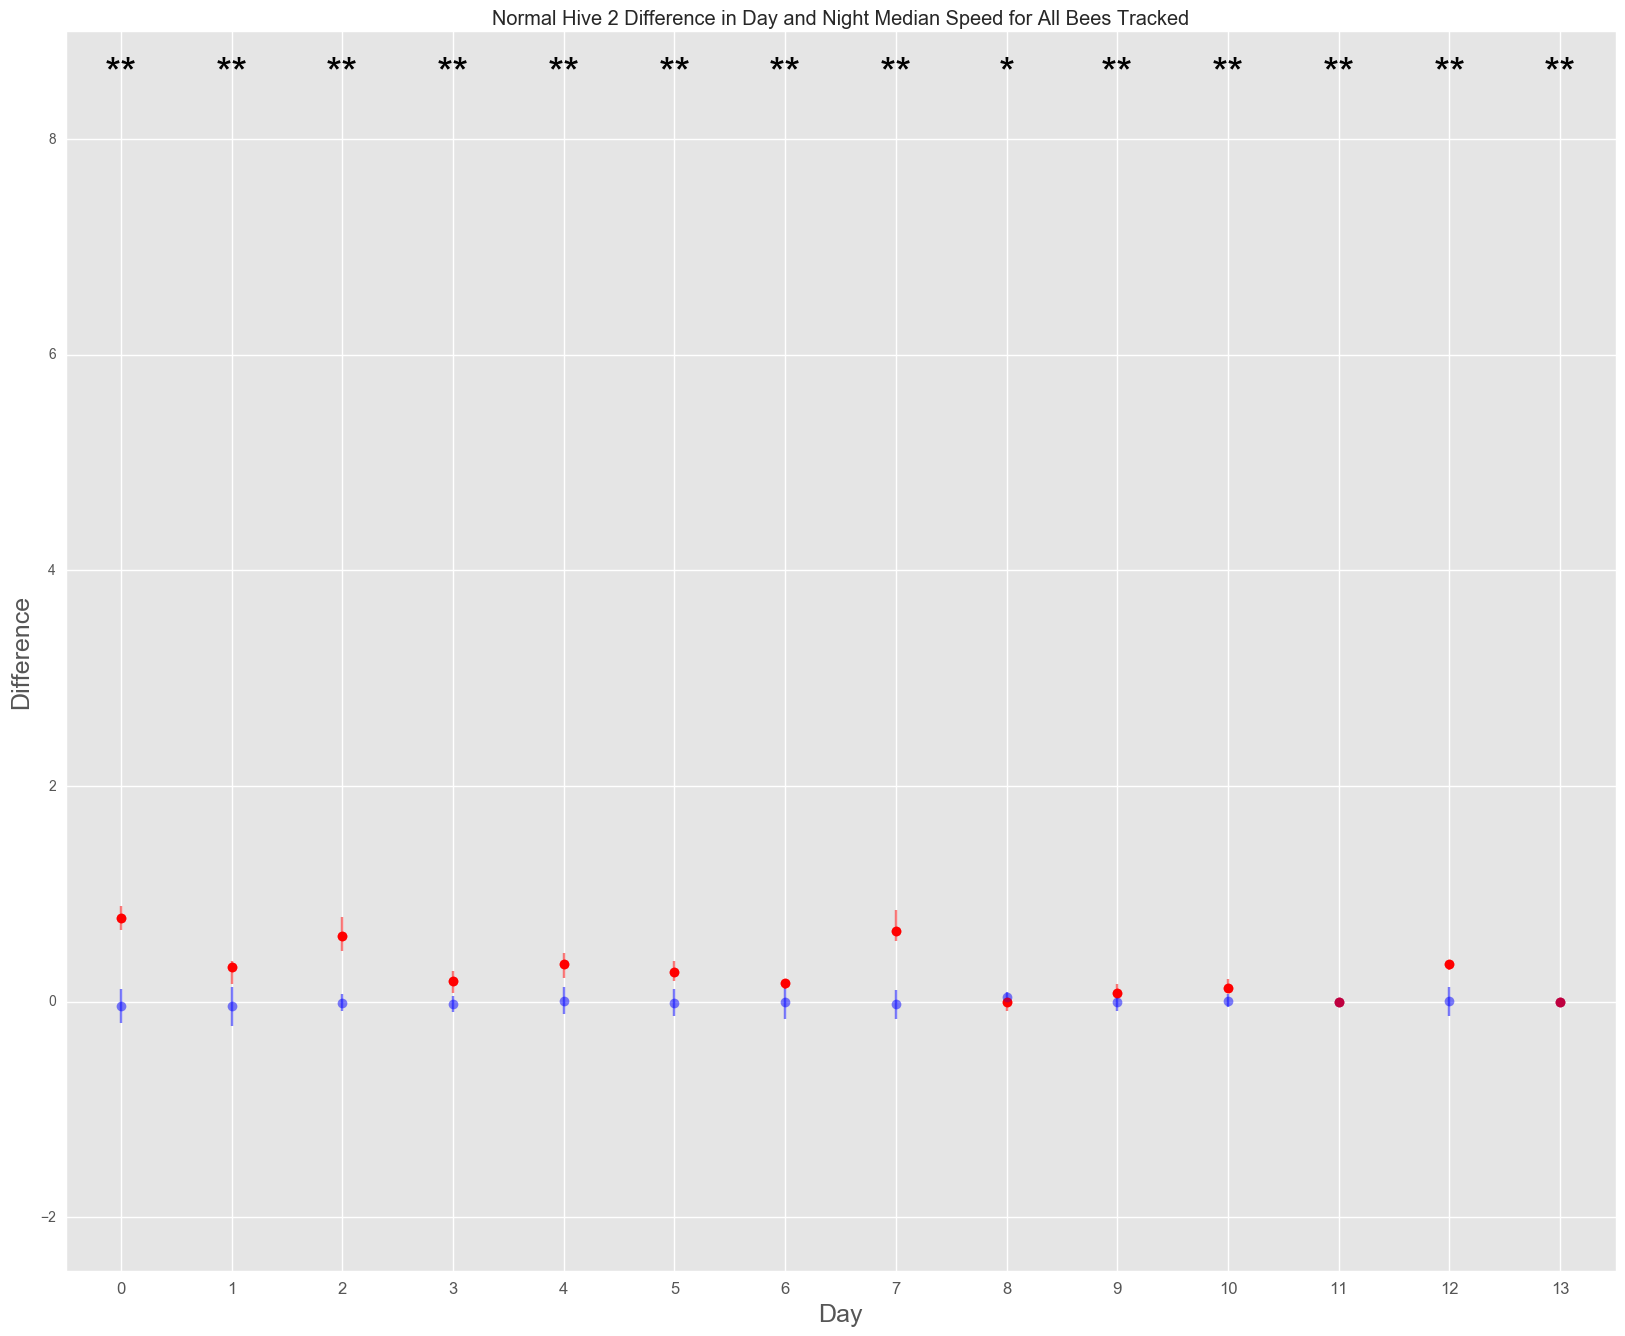

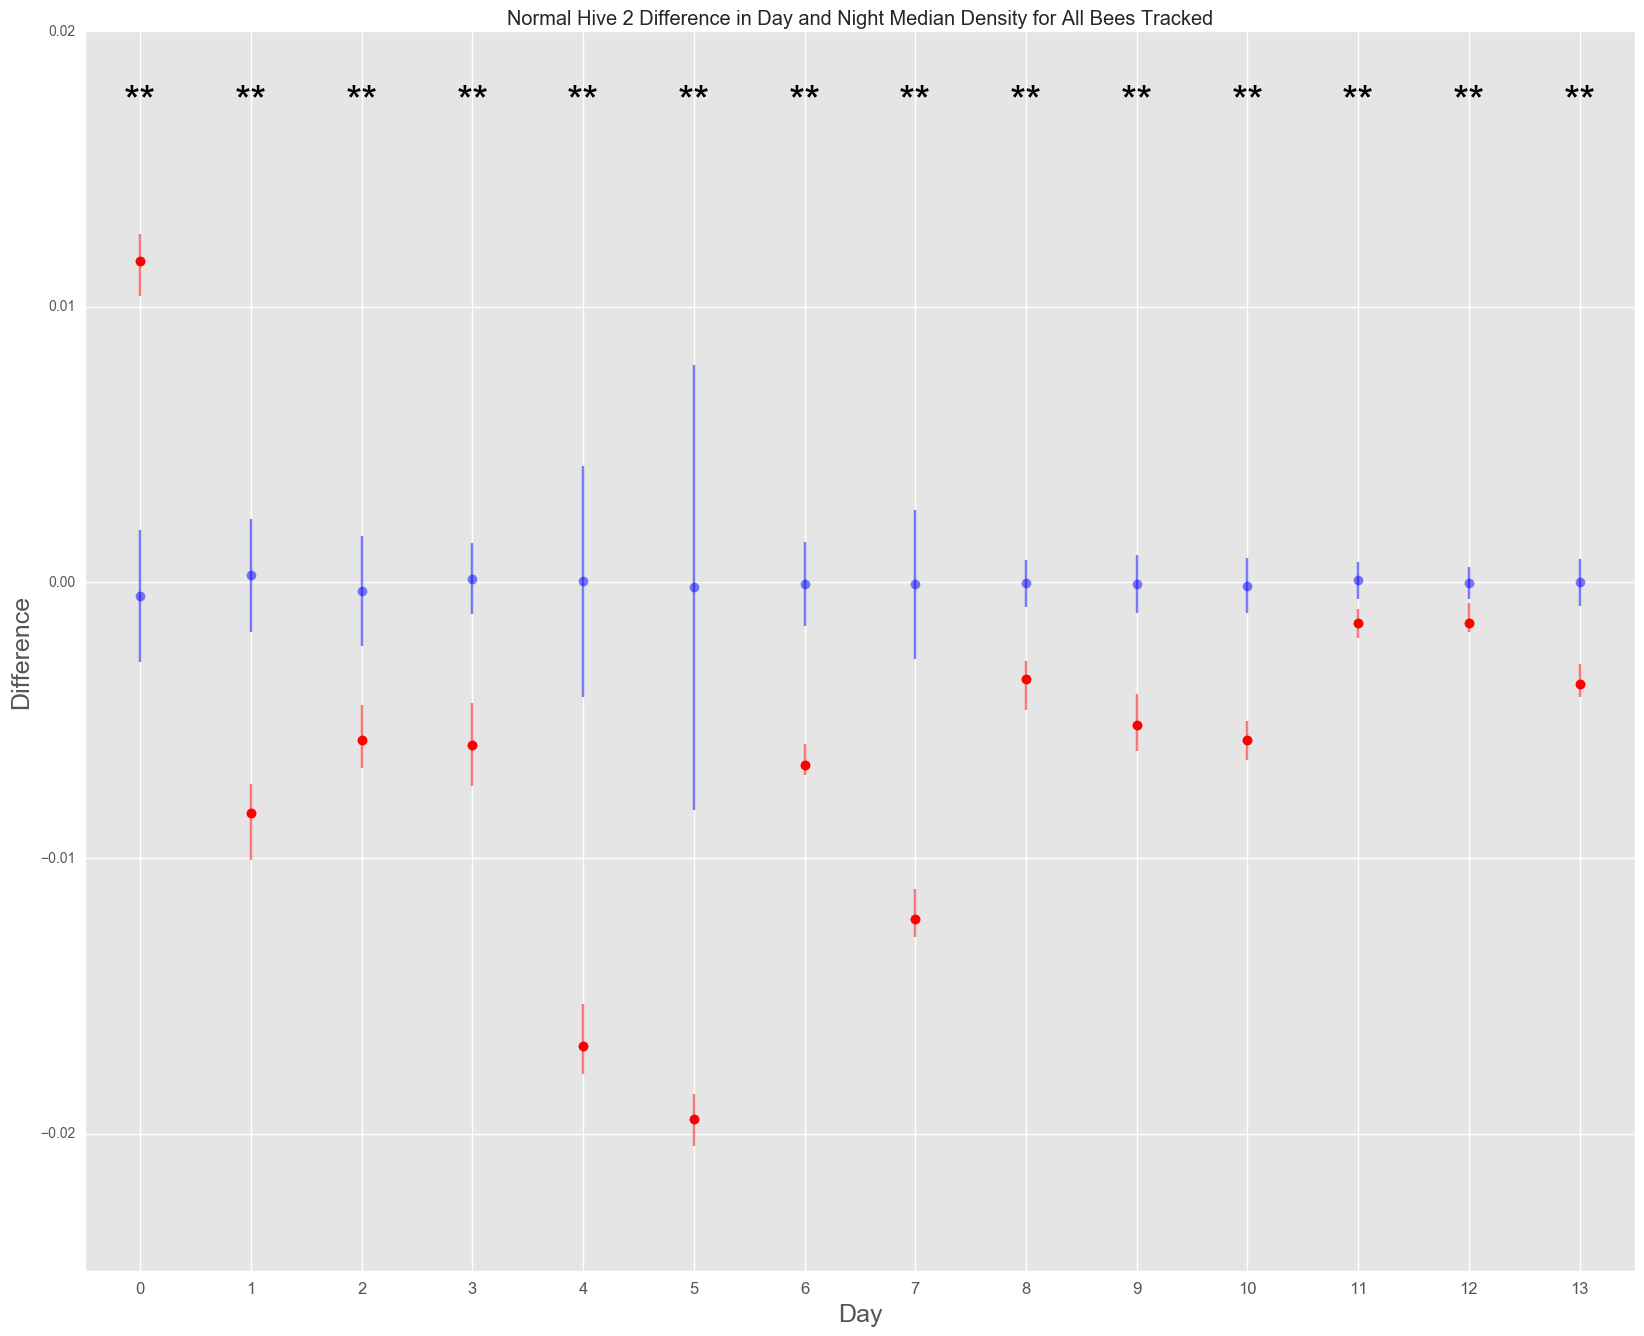

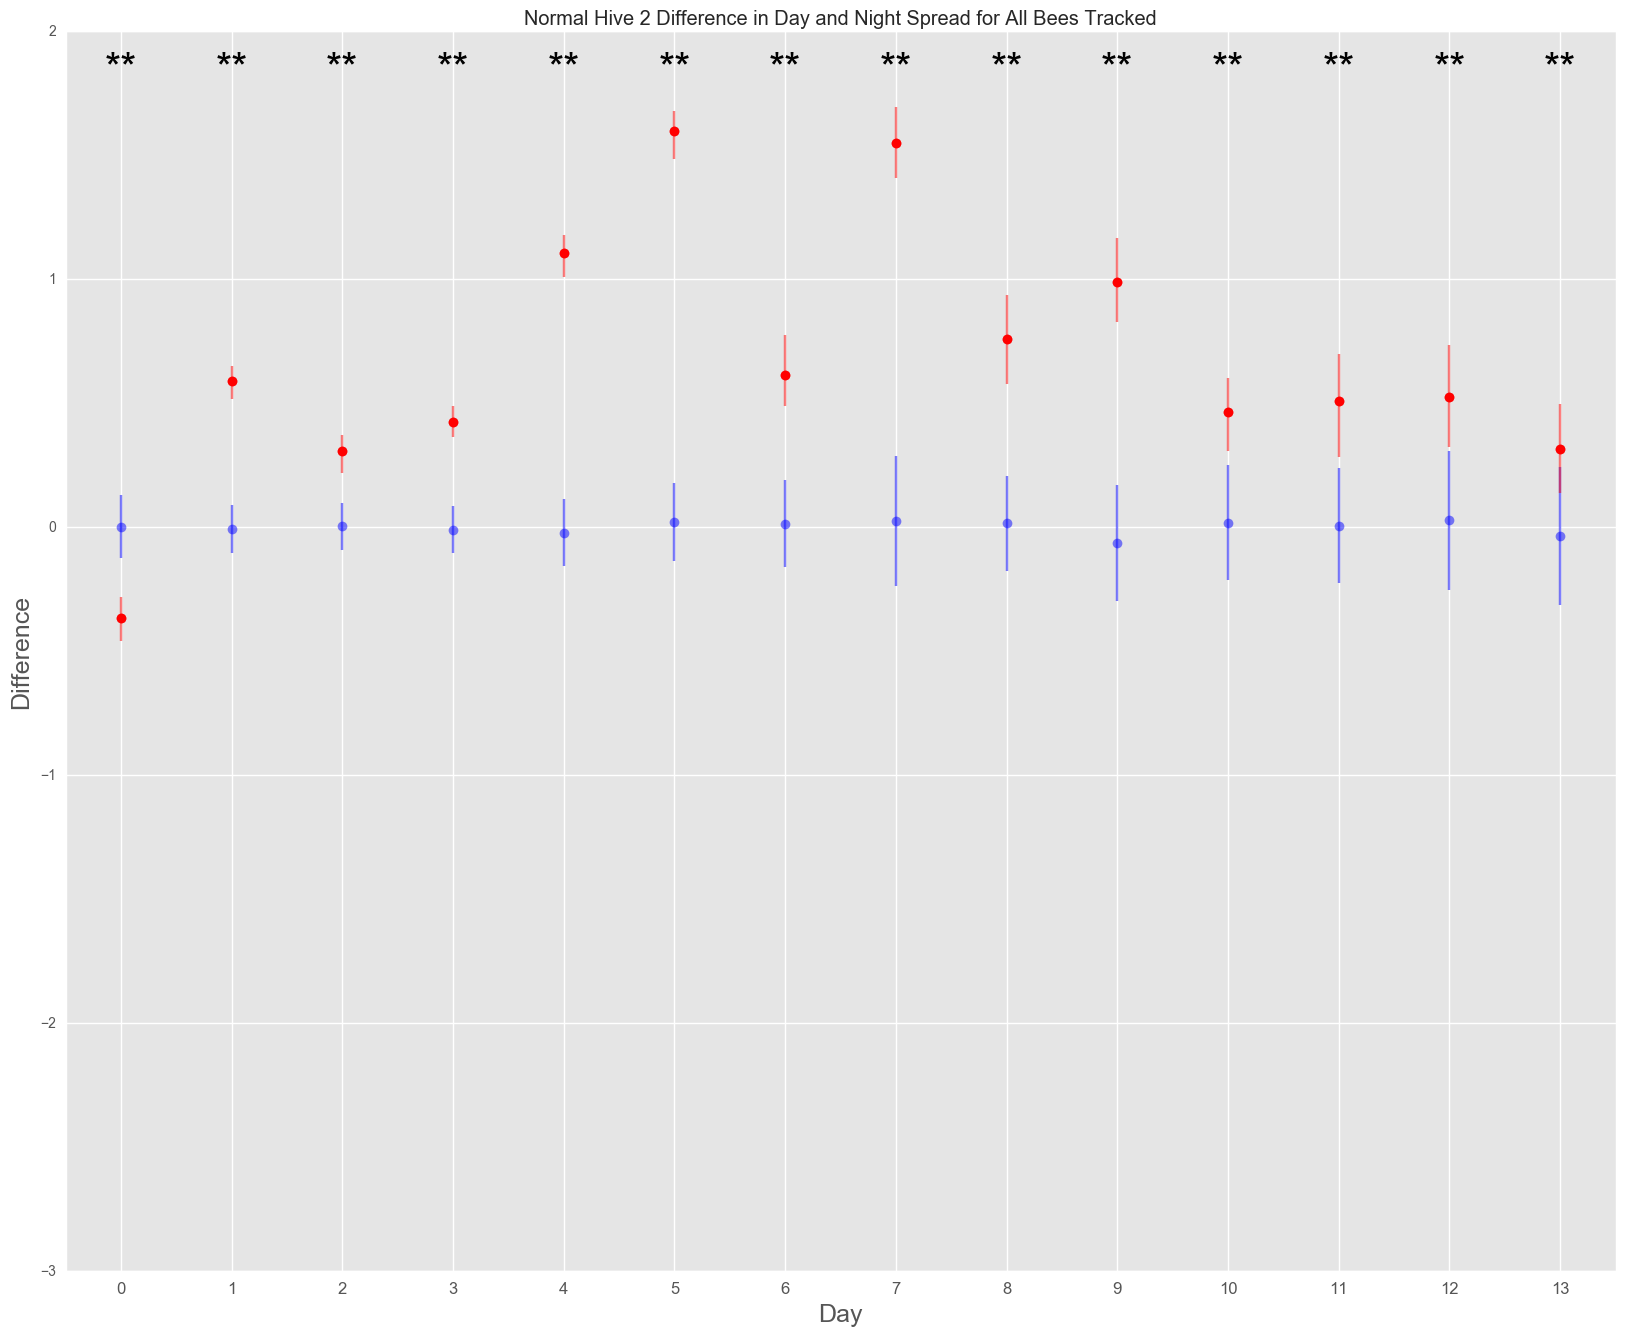

In [28]:
formatting = {'diff_spread_all_tracked_all_xy': ('Difference in Day and Night Spread for All Bees Tracked',(2,-3, 1.8)), 'diff_median_all_tracked_speeds': ('Difference in Day and Night Median Speed for All Bees Tracked',(9,-2.5, 8.5)), 'diff_median_density': ('Difference in Day and Night Median Density for All Bees Tracked',(0.02,-0.025, 0.017)), 'diff_percent_idle_all_tracked': ('Difference in Day and Night Percentage of Time Idle for All Bees Tracked',(0.1,-0.1, 0.09))}

for i, df in enumerate(real_result_df_list):
    night_df = df[df['time_period']=='night']
    
    for metric in shuffled_permutations[0].keys():
        
        indicate_sig = []
        p_values = []
        
        for j, result in enumerate(list(night_df[metric])[0:14]):
            num_diff = 1
            num = 1
            for shuffled_days in shuffled_permutations[i][metric]:
                num += 1
                if abs(shuffled_days[j]) > abs(result):
                    num_diff += 1

            p_value = num_diff / num
            p_values.append(p_value)
            if p_value >= 0.05:
                indicate_sig.append('')
            elif p_value < 0.001:
                indicate_sig.append('***')
            elif p_value < 0.01:
                indicate_sig.append('**')
            else:
                indicate_sig.append('*')
        
        plt.figure()
        
        '''
        for shuffled_days in shuffled_permutations[i][metric]:
            plt.plot(shuffled_days[0:14], zorder=-32, marker='o', color='b', linestyle="None")
        '''

        plt.plot(list(night_df[metric])[0:14], marker='o', color='r', linestyle="None") #, label='{}'.format(hive_names[i])
        
        confidence_upper_lower_list = [tuple(np.percentile(day_results, [2.5, 97.5])) for day_results in list(zip(*bootstrapped_permutations[i][metric]))]                                   
        shuffled_upper_lower_list = [tuple(np.percentile(day_results, [0, 100])) for day_results in list(zip(*shuffled_permutations[i][metric]))]                                   
        
        y_error_lower = []
        y_error_upper = []
        for j, real_value in enumerate(list(night_df[metric])[0:14]):
            y_error_lower.append(real_value - confidence_upper_lower_list[j][0])
            y_error_upper.append(confidence_upper_lower_list[j][1] - real_value)
            
        y_shuffle_error_lower = []
        y_shuffle_error_upper = []
        shuffled_median_value = []
        for j, real_value in enumerate(list(night_df[metric])[0:14]):
            real_value = np.median(shuffled_upper_lower_list[j])
            shuffled_median_value.append(real_value)
            y_shuffle_error_lower.append(real_value - shuffled_upper_lower_list[j][0])
            y_shuffle_error_upper.append(shuffled_upper_lower_list[j][1] - real_value)
        
        metric_title, y_axis = formatting[metric]
        #print(metric_title, y_axis)
        
        plt.title('{} {}'.format(hive_names[i], metric_title))
        plt.xlim(-0.5,13.5)
        plt.ylim(ymax=y_axis[0], ymin=y_axis[1])
        plt.xticks(range(len(list(night_df[metric])[0:14])), range(len(list(night_df[metric])[0:14])), size='large')
        plt.xlabel('Day', fontsize=18)
        plt.ylabel('Difference', fontsize=18)
        
        plt.errorbar(range(len(shuffled_median_value)), shuffled_median_value, yerr=(y_shuffle_error_lower, y_shuffle_error_upper), color='b', fmt="o", alpha=0.5)
        plt.errorbar(range(len(list(night_df[metric])[0:14])), list(night_df[metric])[0:14], yerr=(y_error_lower, y_error_upper), color='r', fmt="o", alpha=0.5)
        
        for j, txt in enumerate(indicate_sig):
            plt.annotate(txt, (j, y_axis[2]), size=30, horizontalalignment='center', color='k')
        
        plt.show()

[(0.009900990099009901, '**'), (0.009900990099009901, '**'), (0.009900990099009901, '**'), (0.019801980198019802, '*'), (0.297029702970297, ''), (0.07920792079207921, ''), (0.009900990099009901, '**'), (0.009900990099009901, '**'), (0.009900990099009901, '**'), (0.009900990099009901, '**'), (0.009900990099009901, '**'), (0.0297029702970297, '*'), (0.4752475247524752, '')]


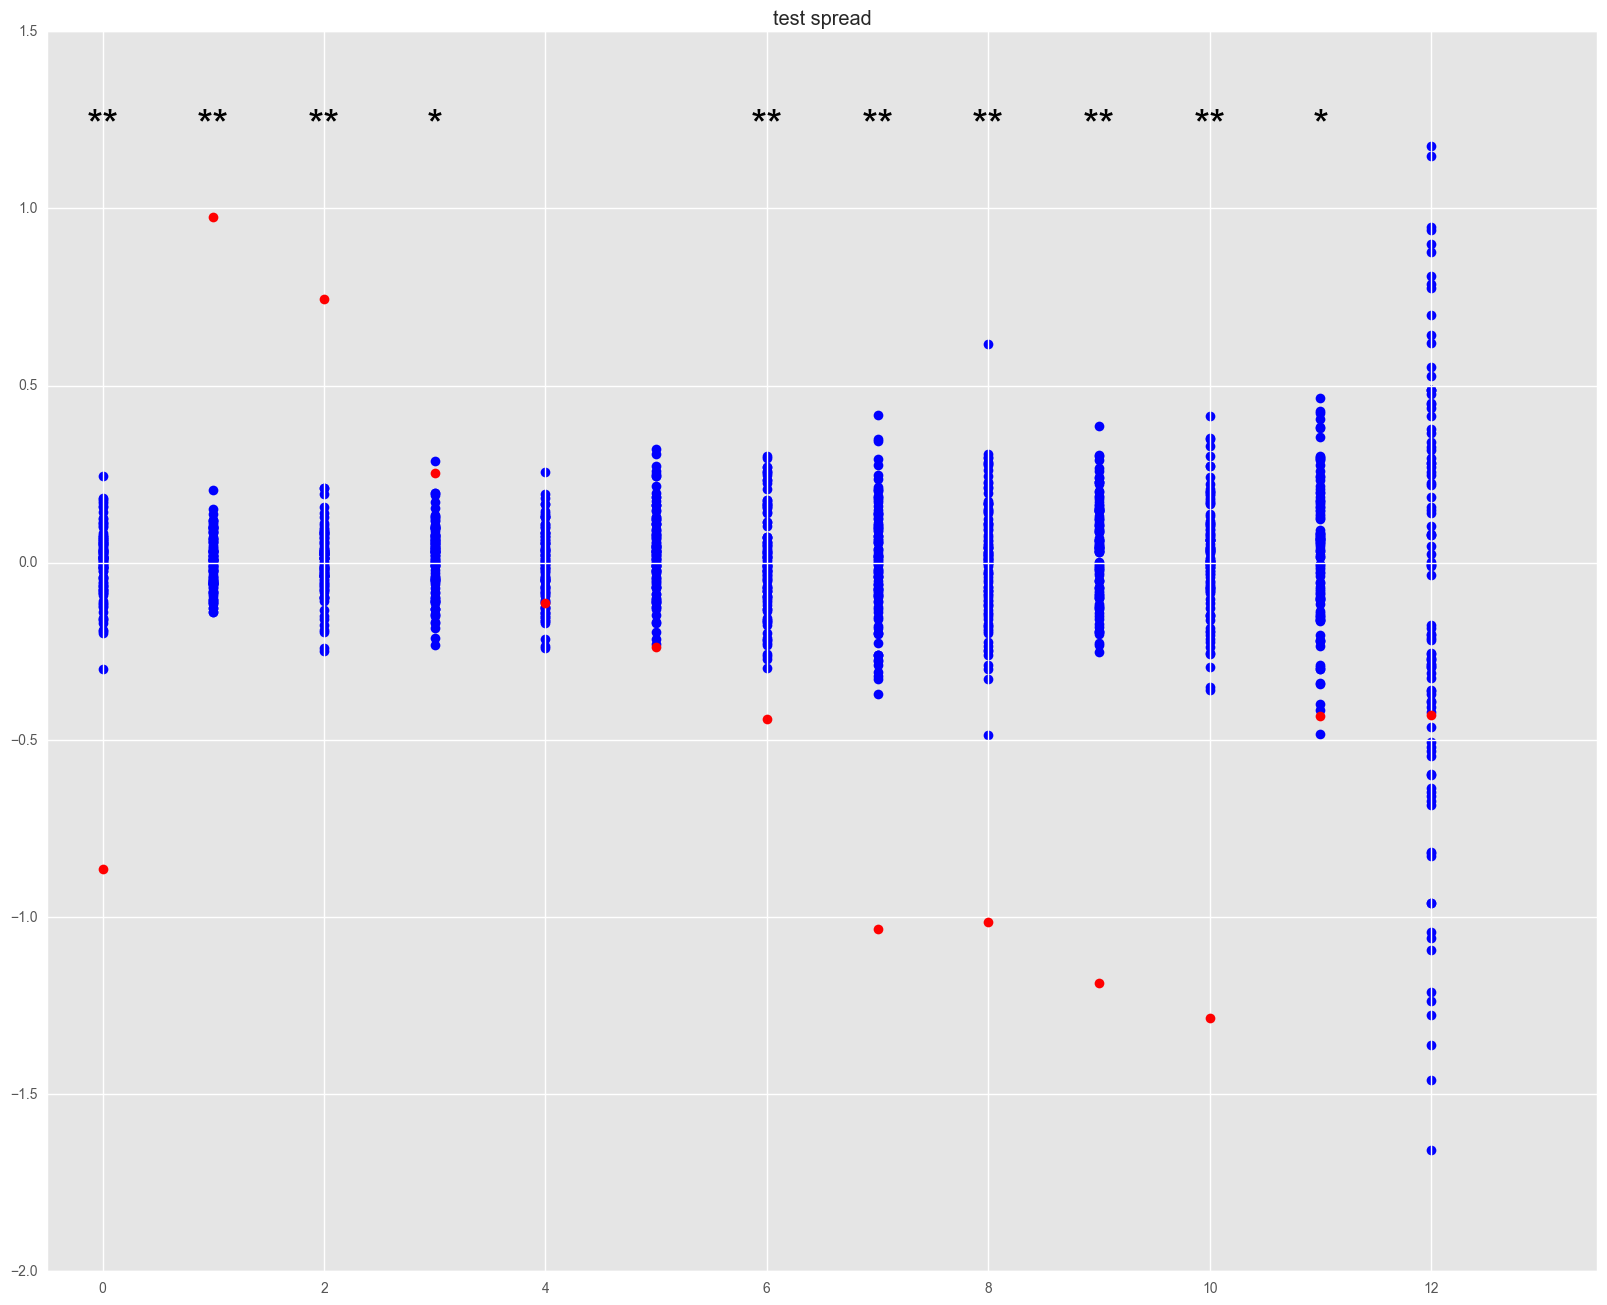

In [78]:
# testing statistical tests

night_df = real_result_df_list[0][real_result_df_list[0]['time_period']=='night']

indicate_sig = []
p_values = []

for i, result in enumerate(list(night_df['diff_spread_all_tracked_all_xy'])[0:14]):
    num_diff = 1
    num = 1
    for shuffled_days in shuffled_permutations[0]['diff_spread_all_tracked_all_xy']:
        num += 1
        if abs(shuffled_days[i]) > abs(result):
            num_diff += 1
            
    p_value = num_diff / num
    p_values.append(p_value)
    if p_value >= 0.05:
        indicate_sig.append('')
    elif p_value < 0.001:
        indicate_sig.append('***')
    elif p_value < 0.01:
        indicate_sig.append('**')
    else:
        indicate_sig.append('*')

print(list(zip(p_values, indicate_sig)))

plt.figure()
for shuffled_days in shuffled_permutations[0]['diff_spread_all_tracked_all_xy']:
    plt.plot(shuffled_days[0:14], zorder=-32, marker='o', color='b', linestyle="None")

plt.plot(list(night_df['diff_spread_all_tracked_all_xy'])[0:14], marker='o', color='r', linestyle="None")


for i, txt in enumerate(indicate_sig):
    plt.annotate(txt, (i,1.2), size=30, horizontalalignment='center', color='k')
    



plt.xlim(-0.5,13.5)

plt.title('test spread')
plt.show()

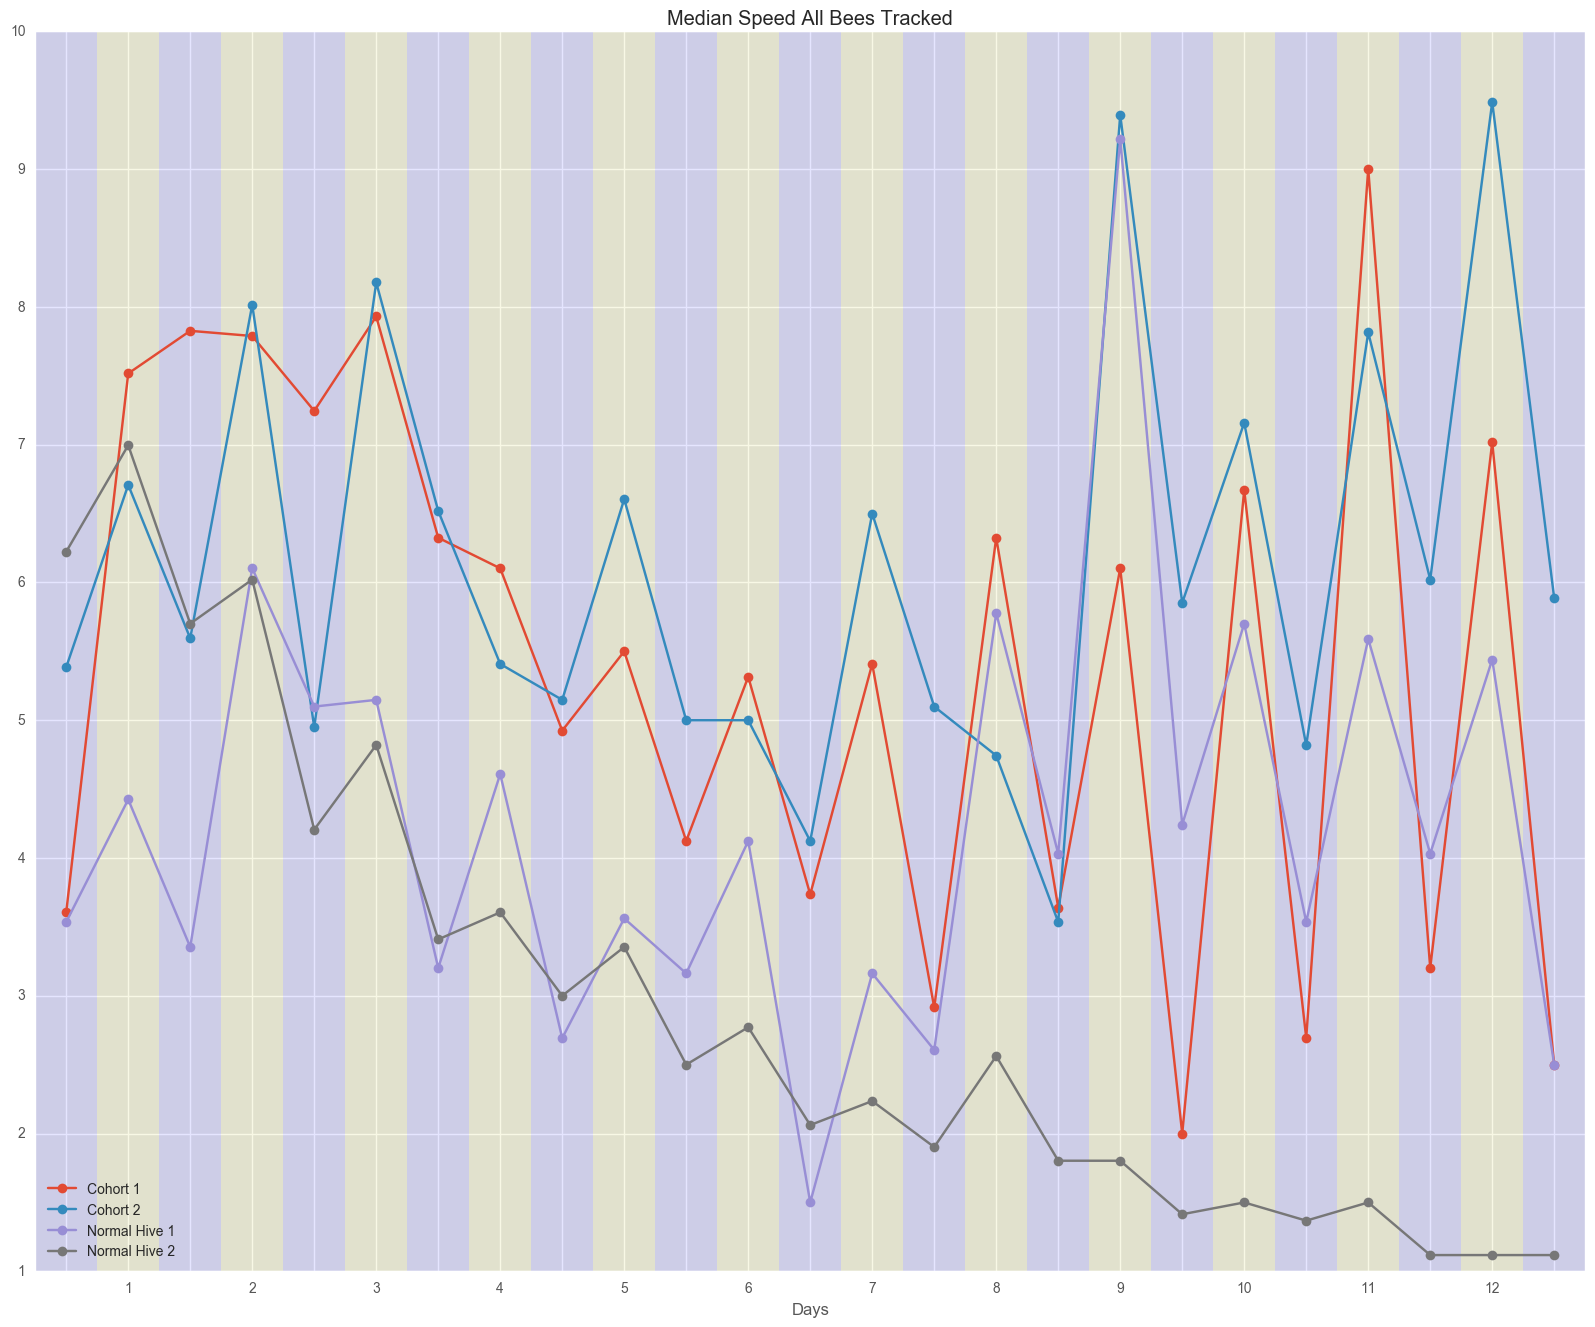

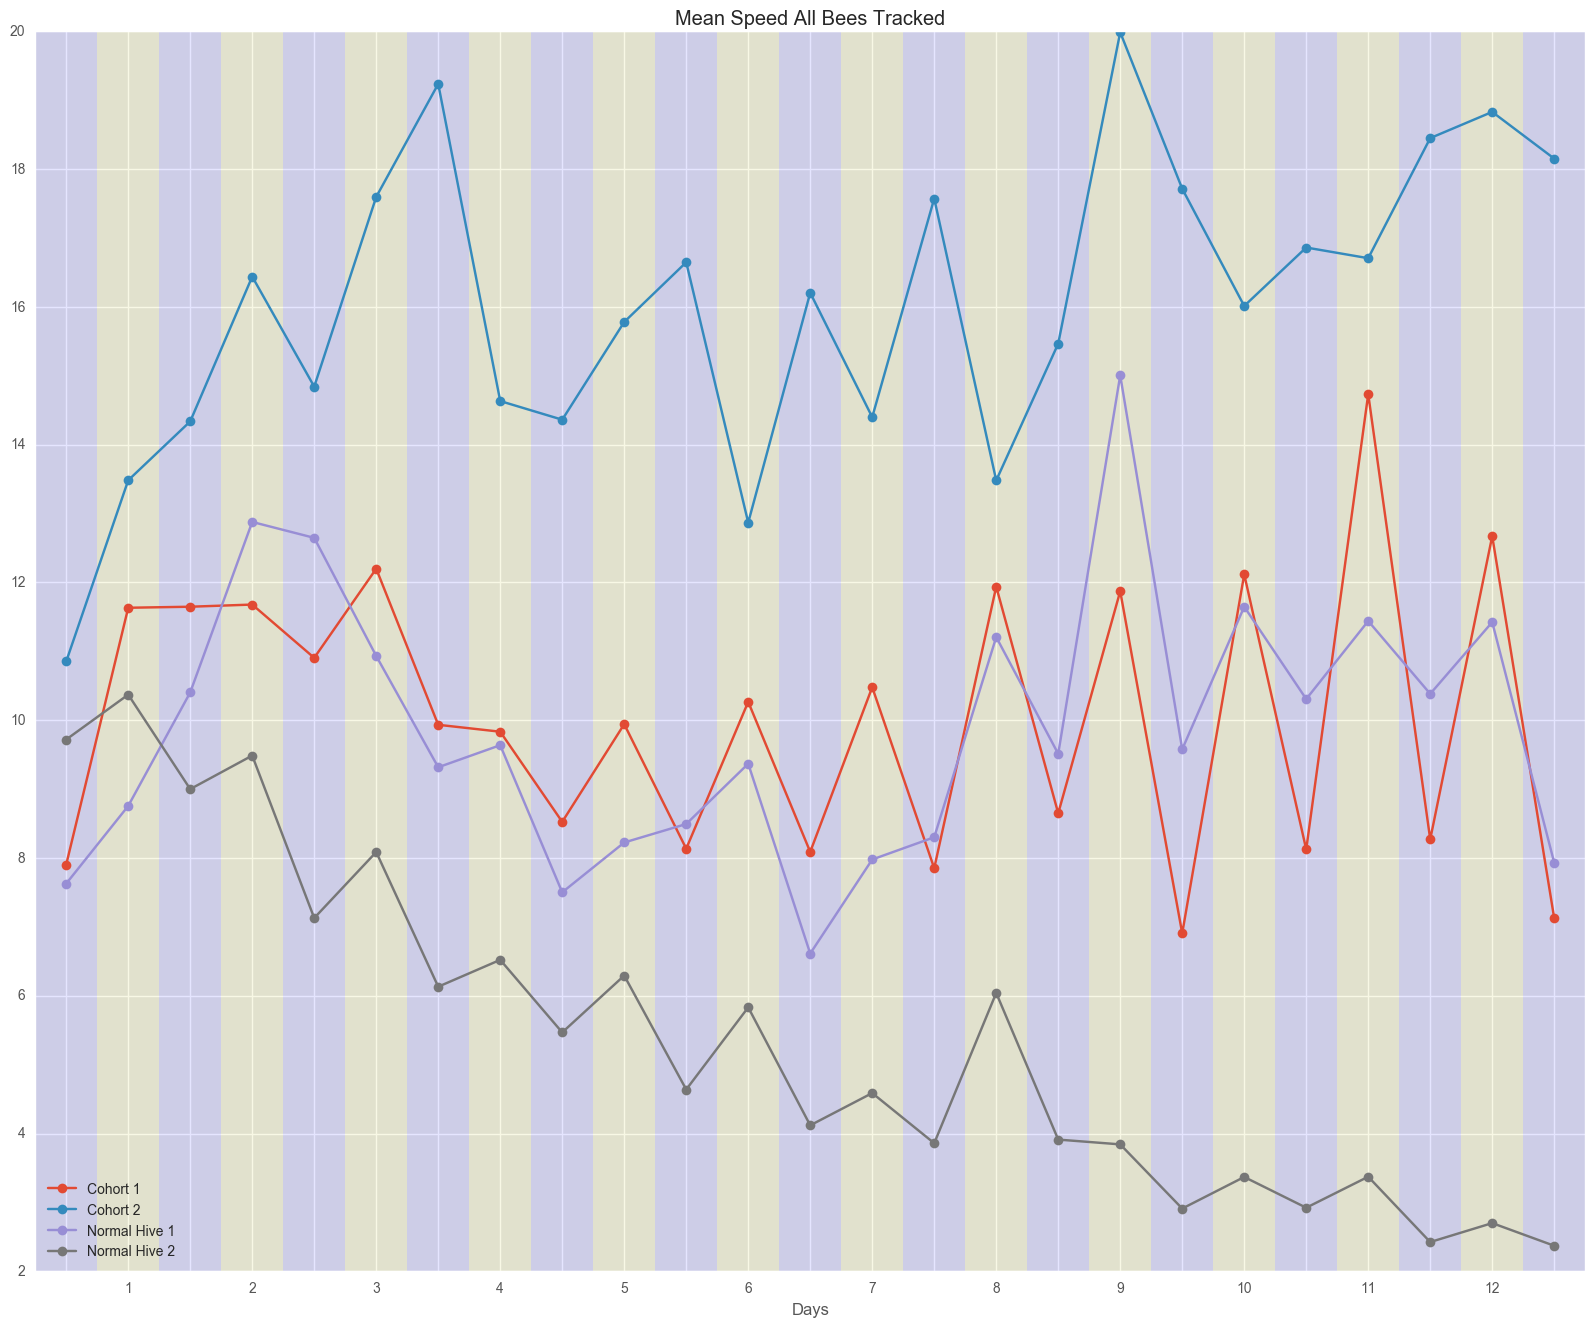

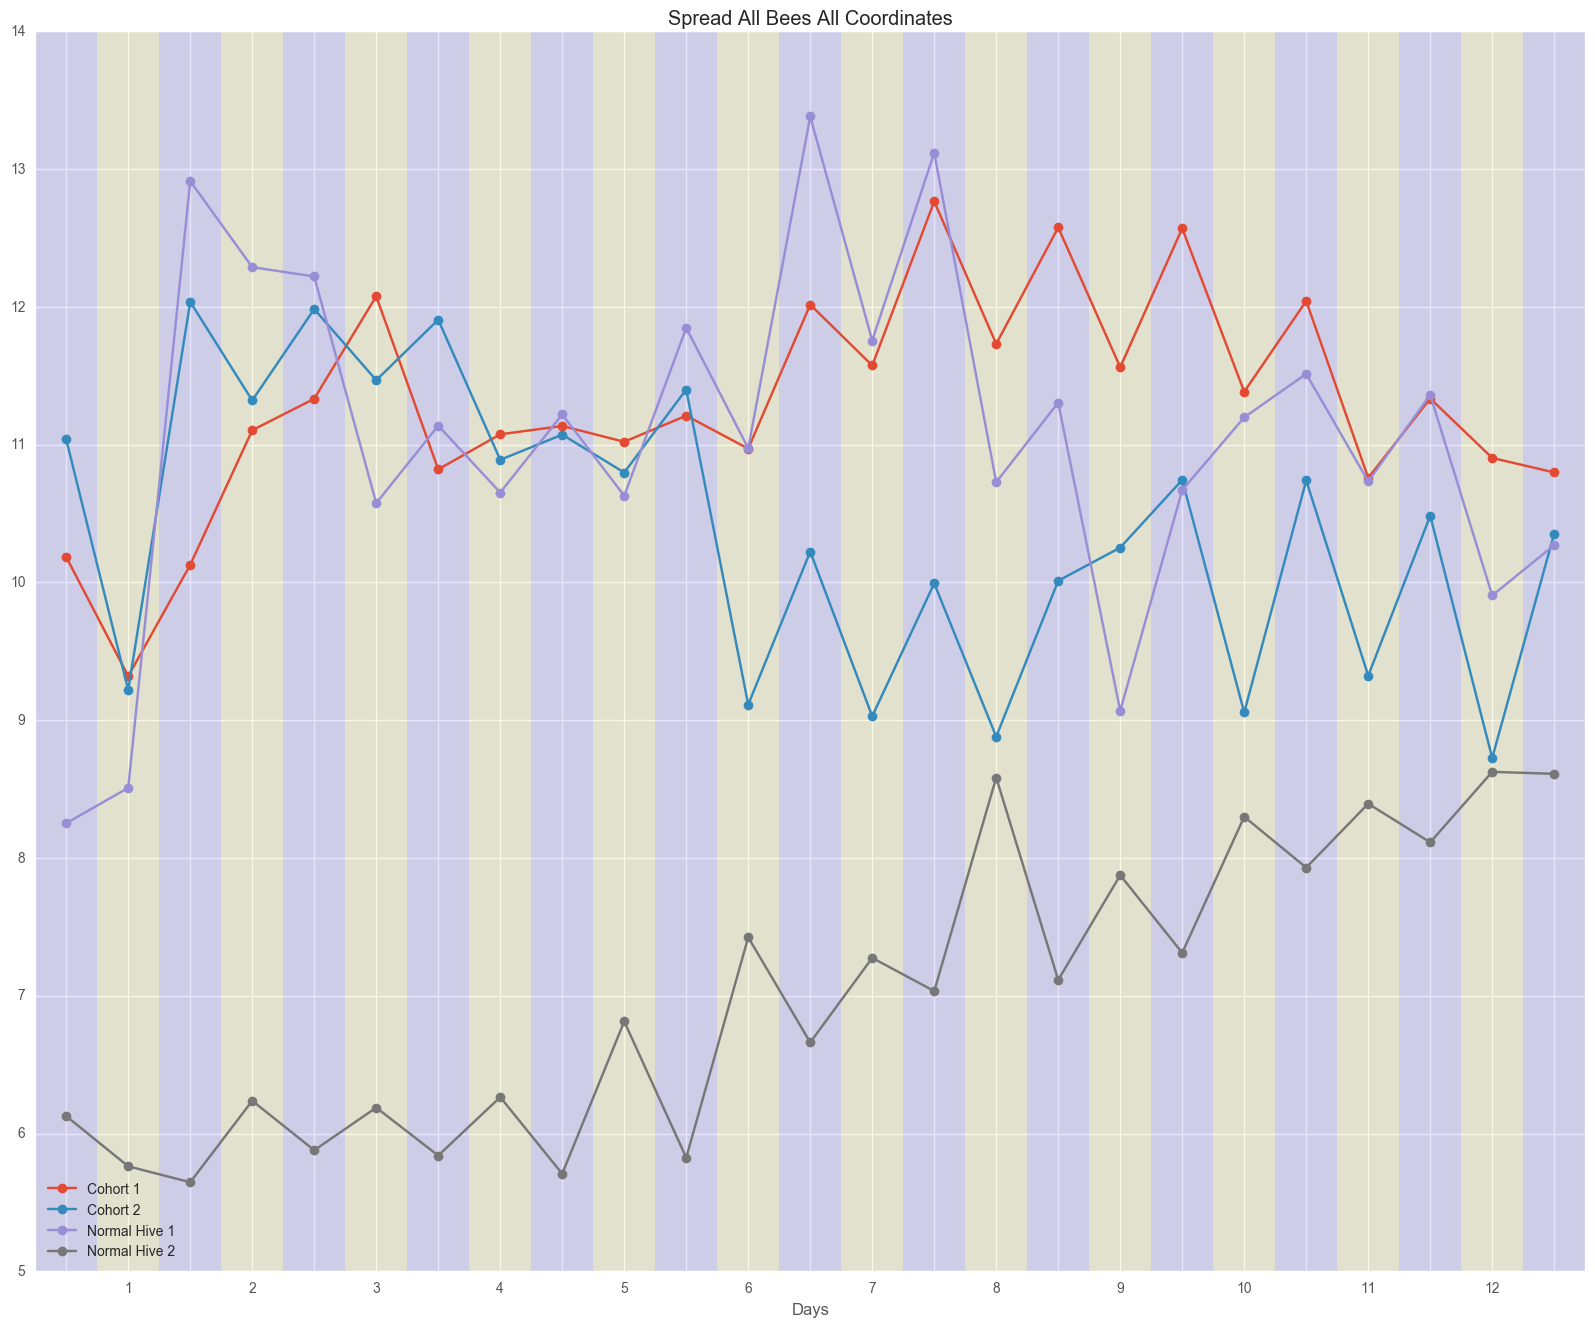

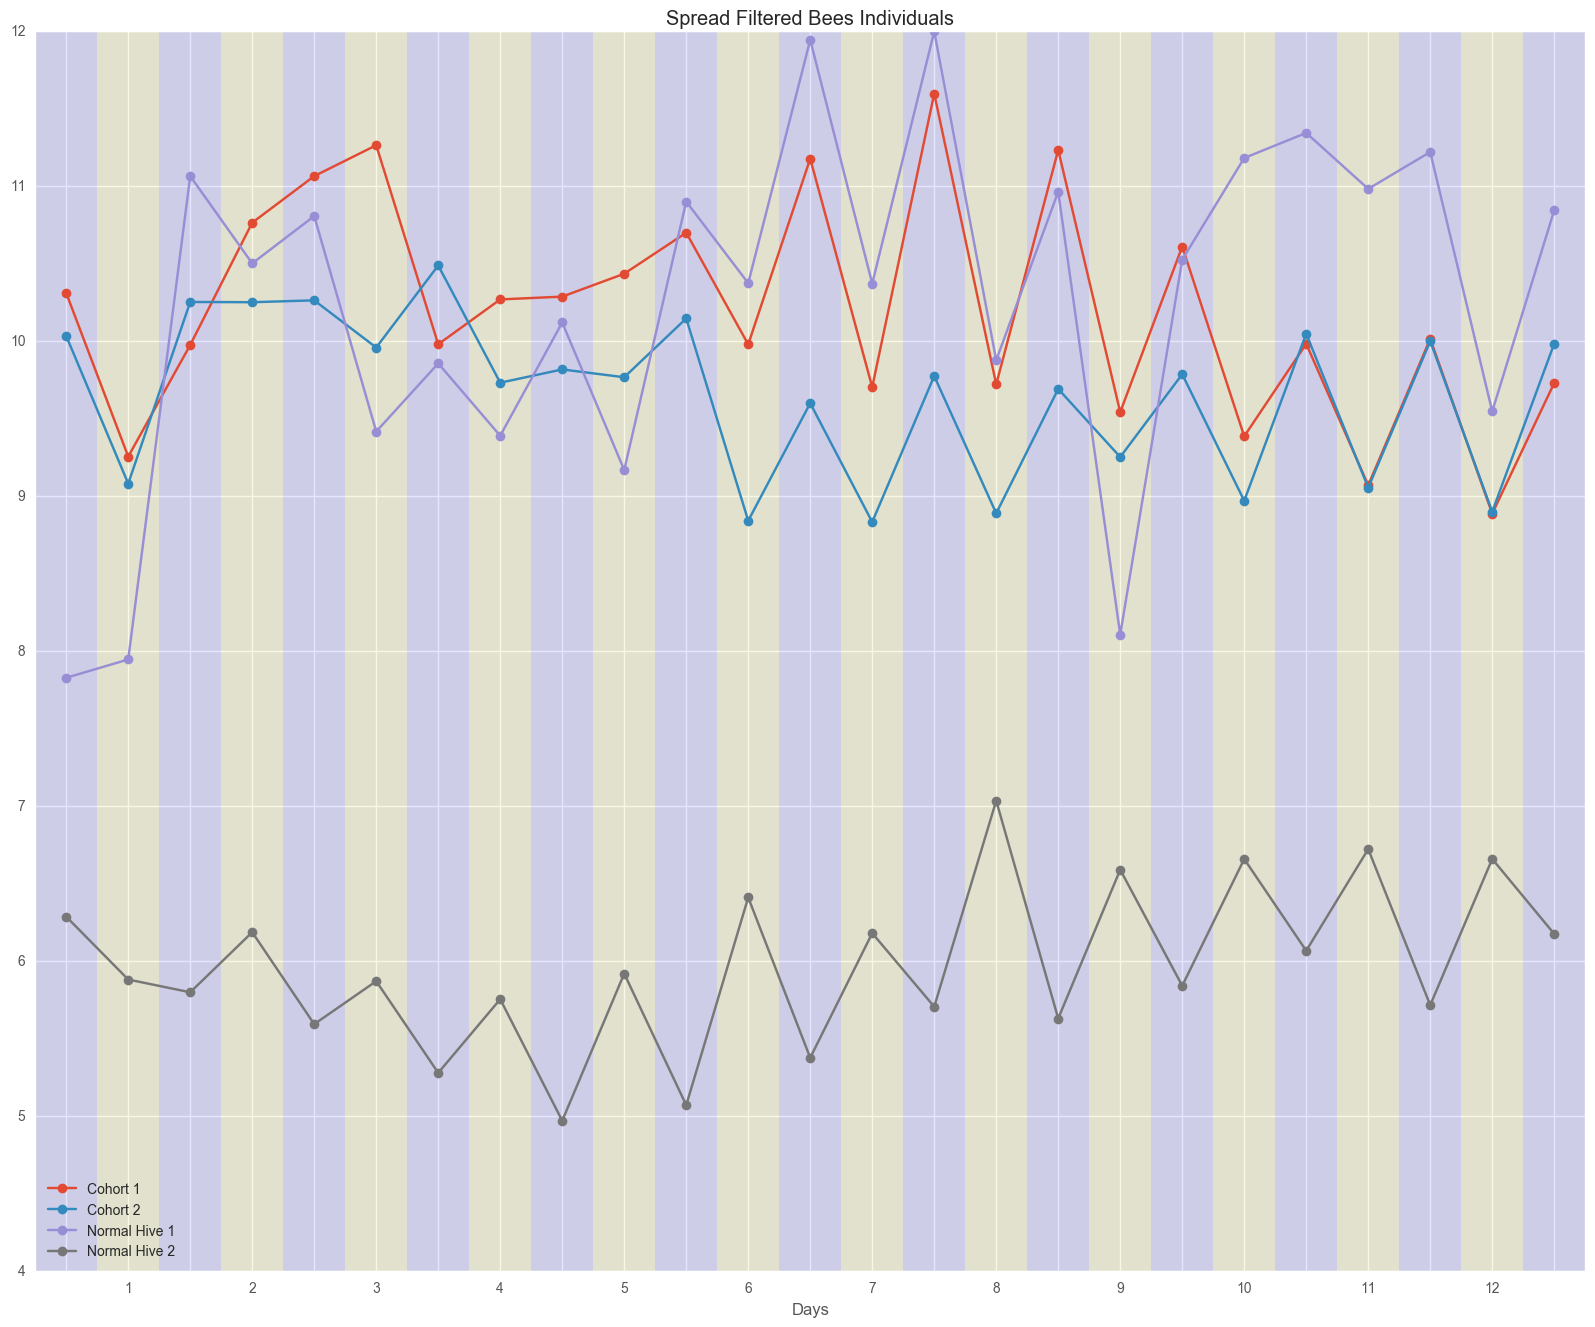

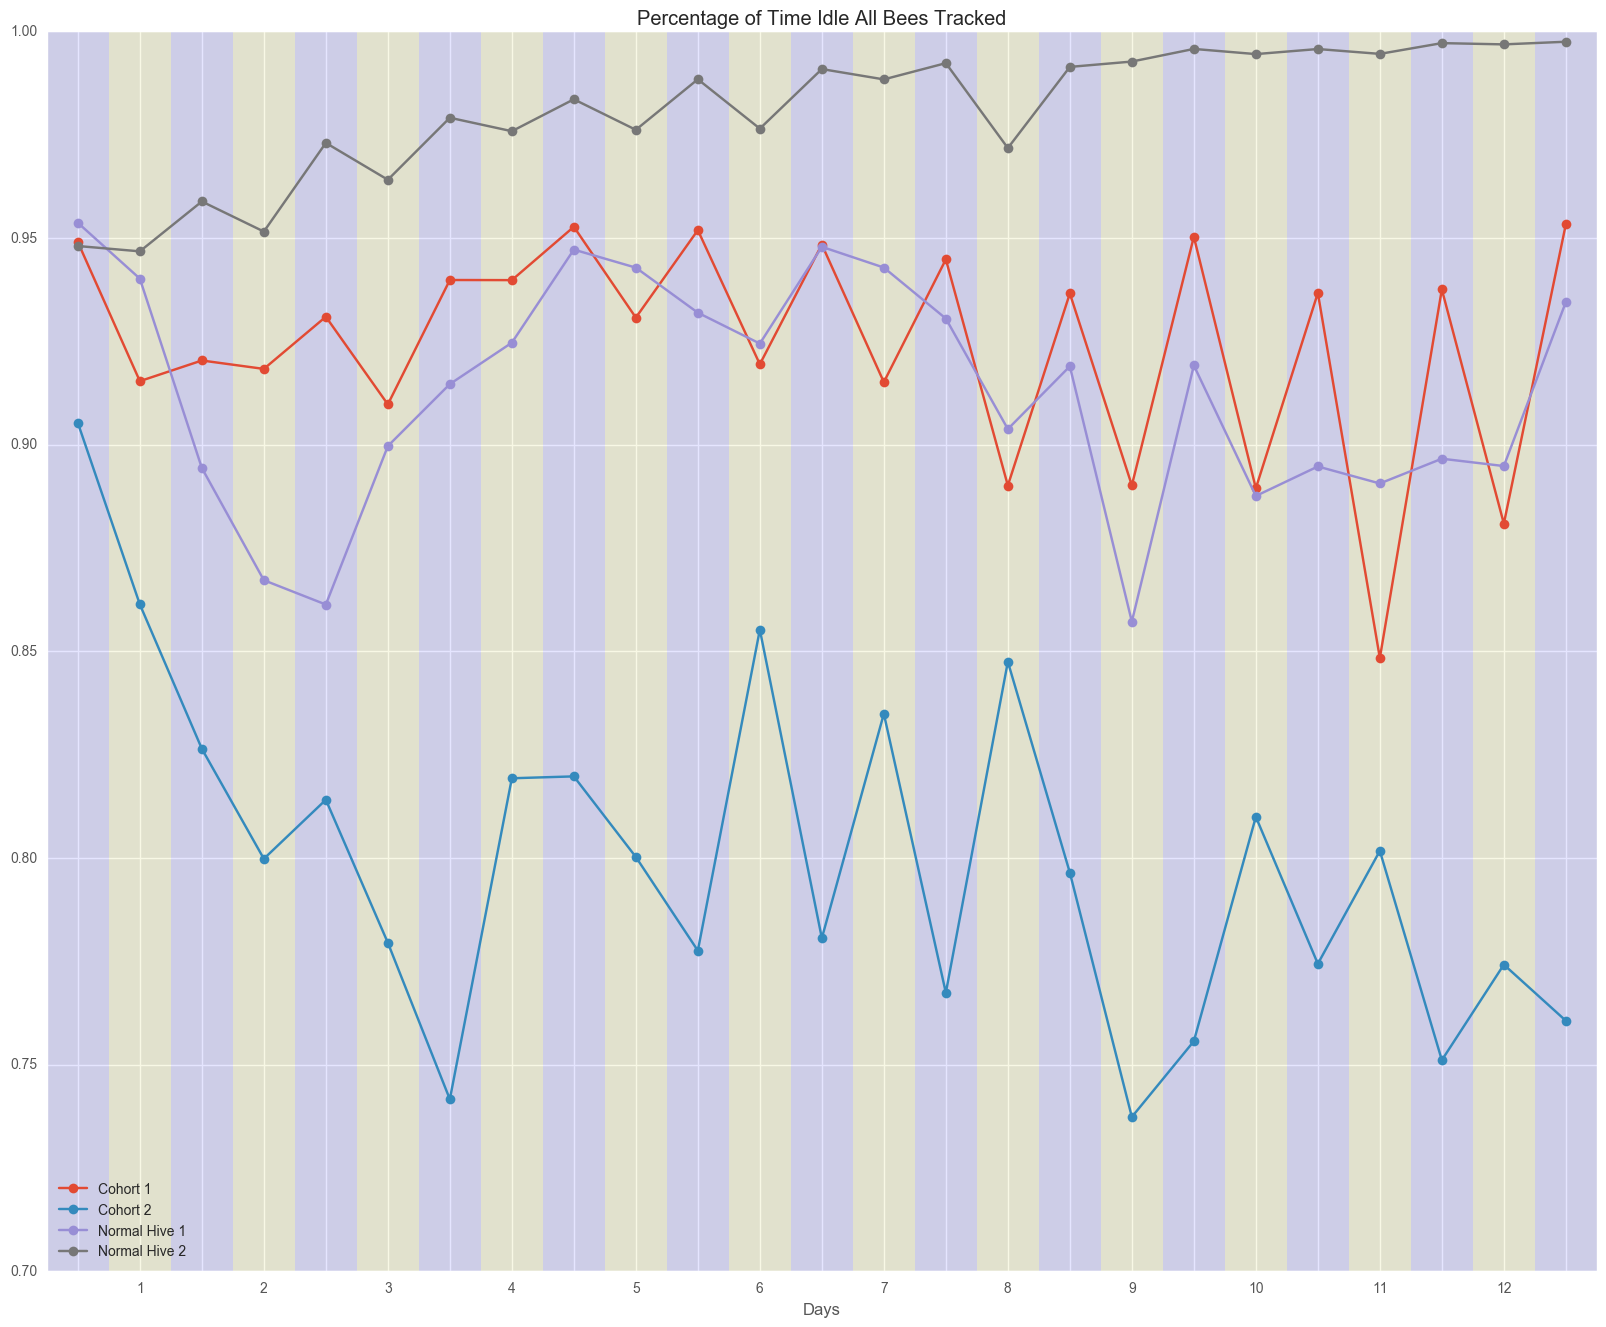

In [93]:
extended_metrics = ['median_all_tracked_speeds', 'mean_all_tracked_speeds', 'spread_all_tracked_all_xy', 'spread_min_tracked_individuals', 'percent_idle_all_tracked']
metrics_names = ['Median Speed All Bees Tracked', 'Mean Speed All Bees Tracked', 'Spread All Bees All Coordinates', 'Spread Filtered Bees Individuals', 'Percentage of Time Idle All Bees Tracked']

for k, metric in enumerate(extended_metrics):

    for i, df in enumerate(real_result_df_list):
        plt.plot(df[metric][0:25], marker='o', label='{}'.format(hive_names[i]))
    plt.title(metrics_names[k])
    plt.xlabel('Days')
    plt.xlim(-0.5,24.5)
    x_len = len(df[metric][0:25])
    day_nums = []
    [day_nums.extend(['', ii + 1]) for ii in range(int(x_len / 2))]
    plt.xticks(range(x_len), day_nums)
    
    plt.legend(loc='lower left')

    for j, time_period in enumerate(real_result_df_list[0]['time_period'][0:25]):
        if time_period == 'night':
            plt.axvspan(j - 0.5, j + 0.5, facecolor='b', alpha=0.1, edgecolor='none')
        else:
            plt.axvspan(j - 0.5, j + 0.5, facecolor='y', alpha=0.1, edgecolor='none')
    plt.show()

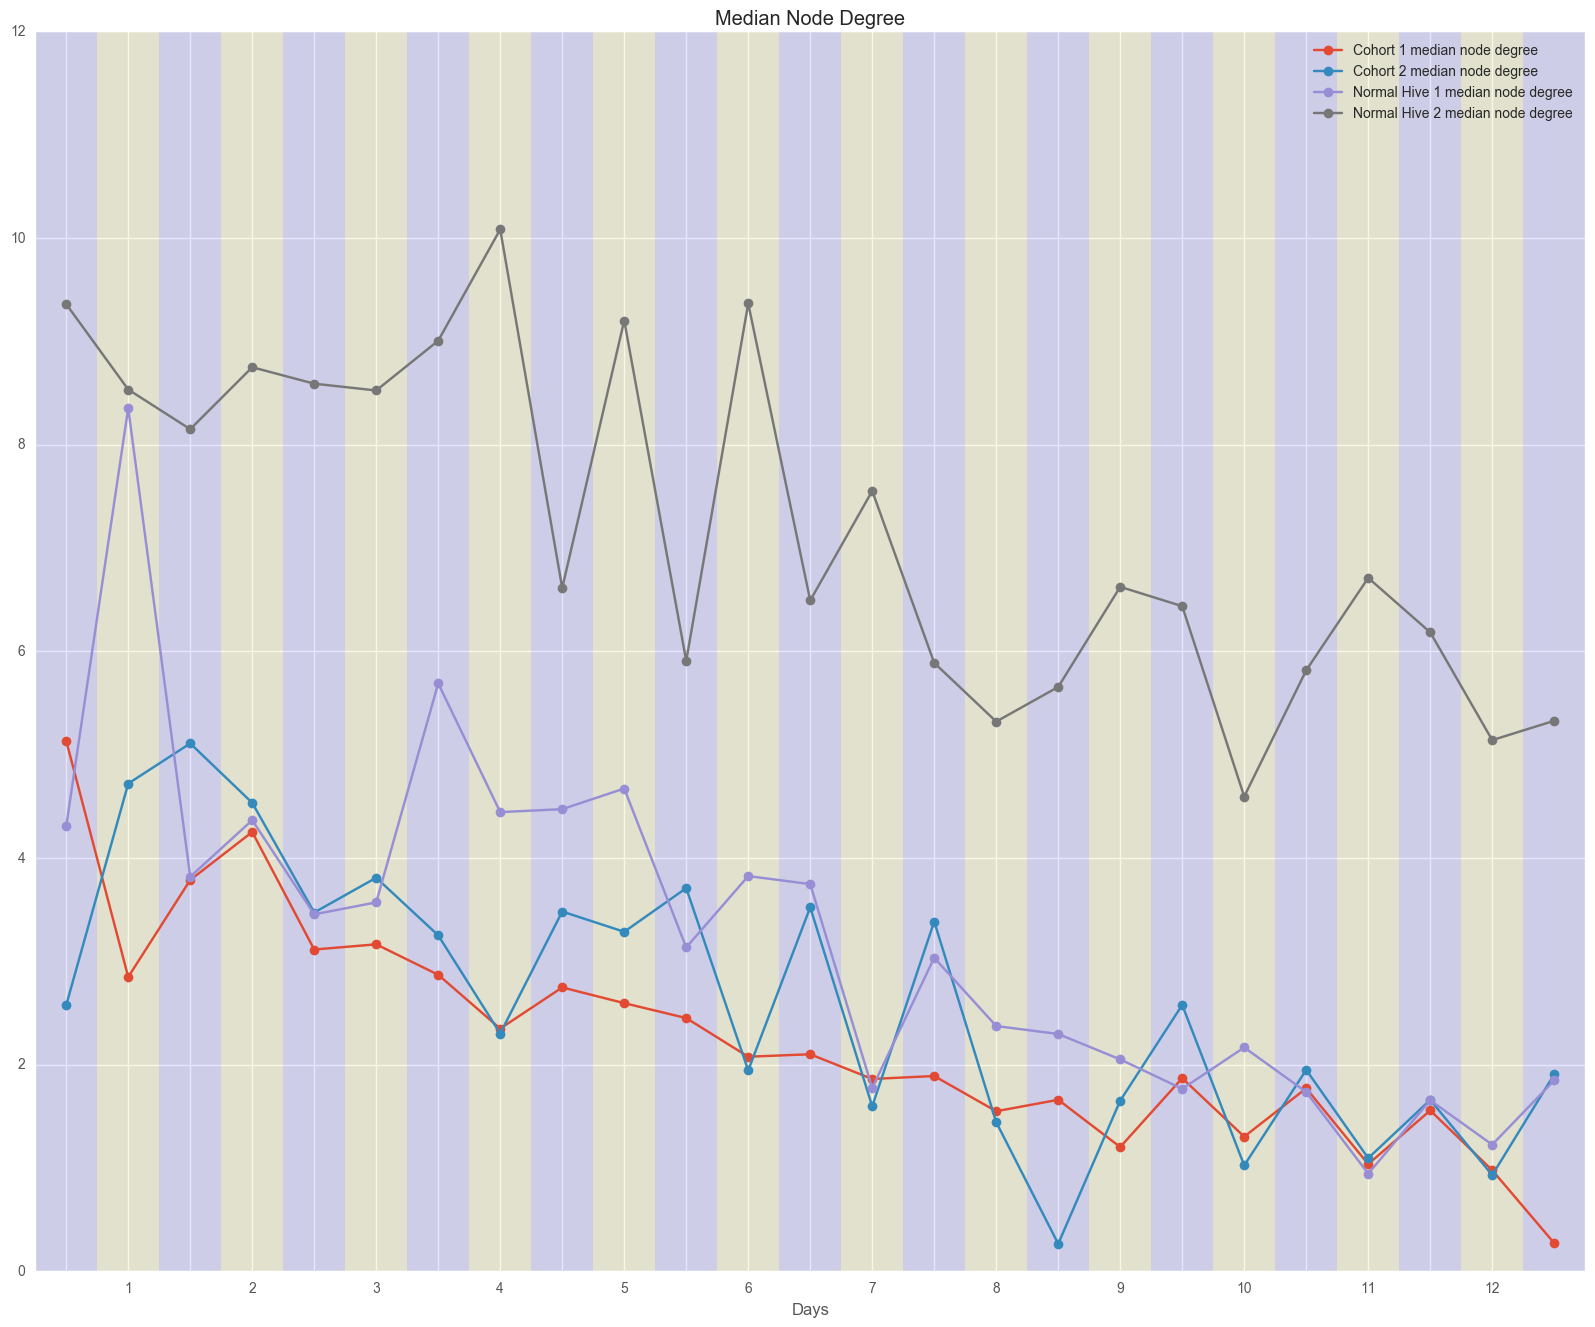

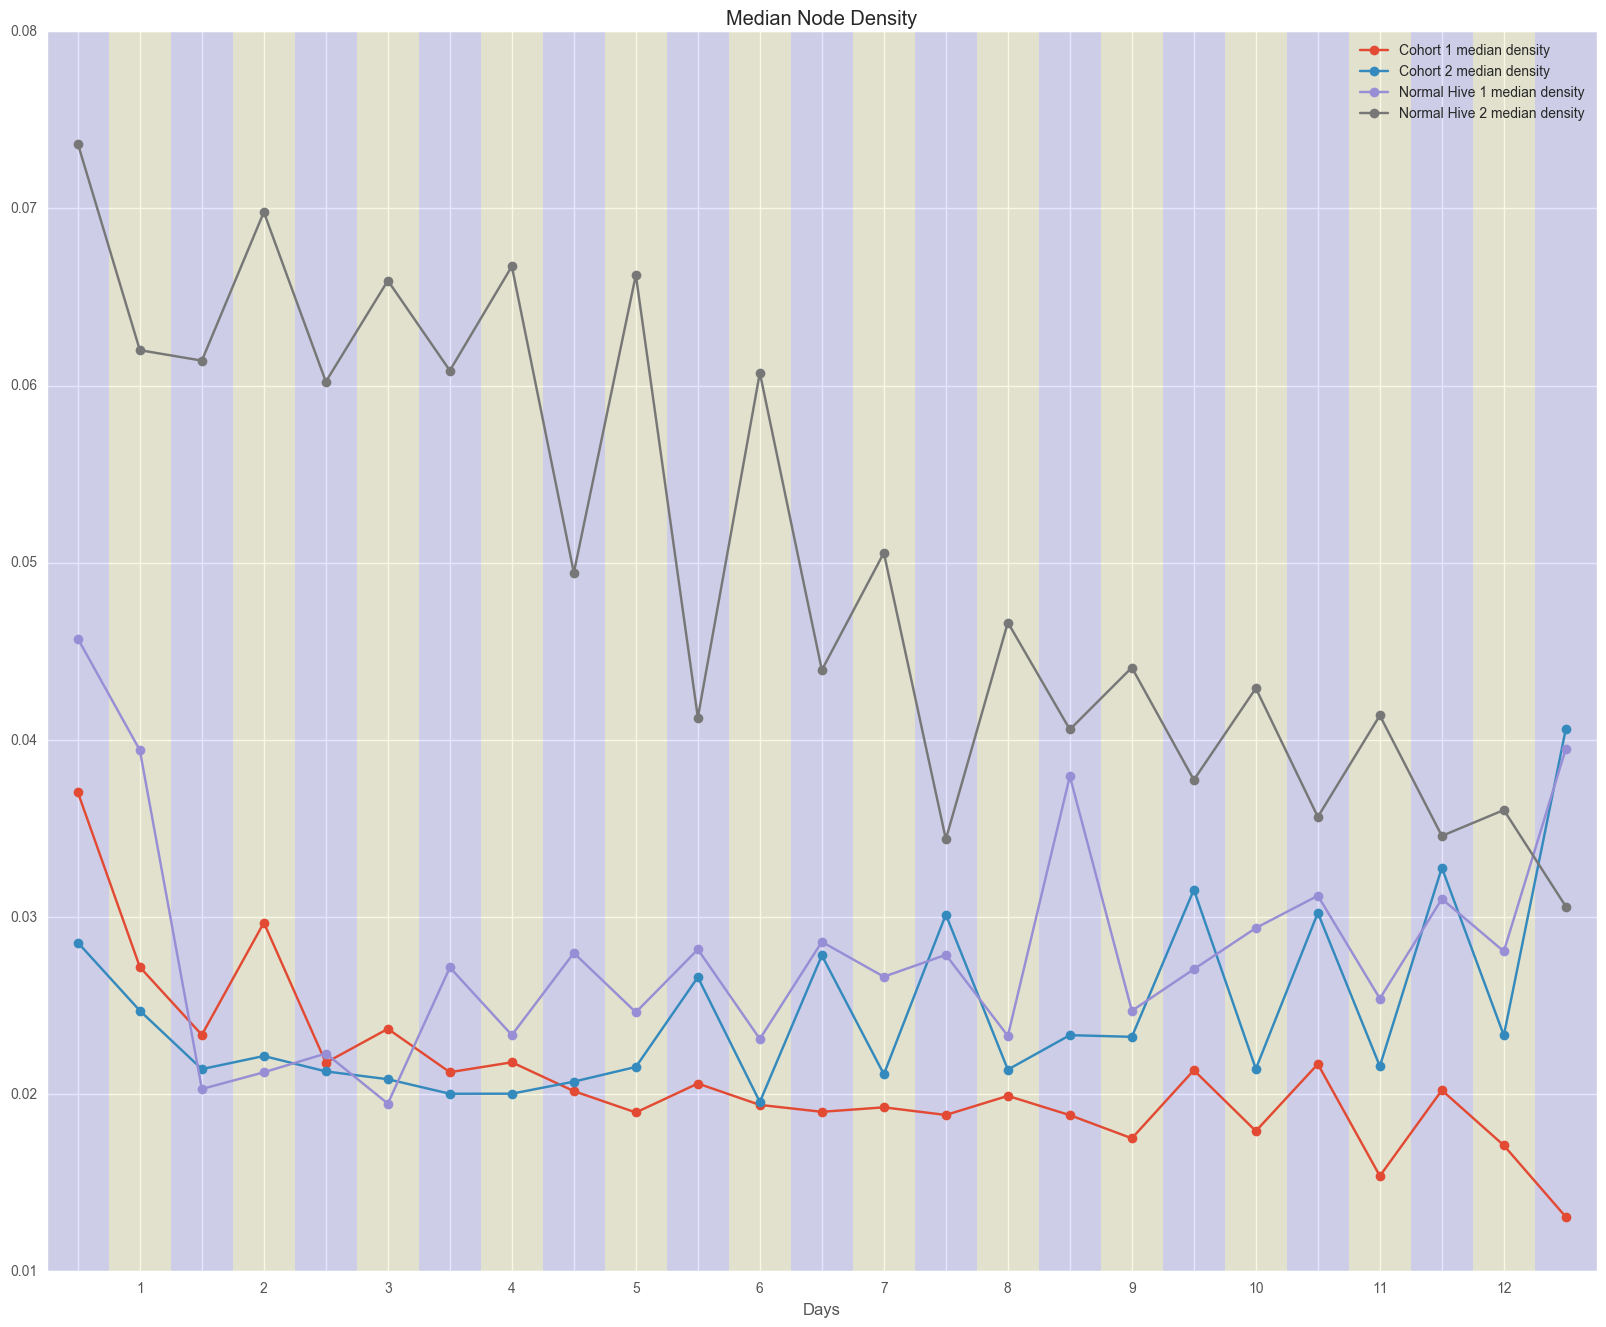

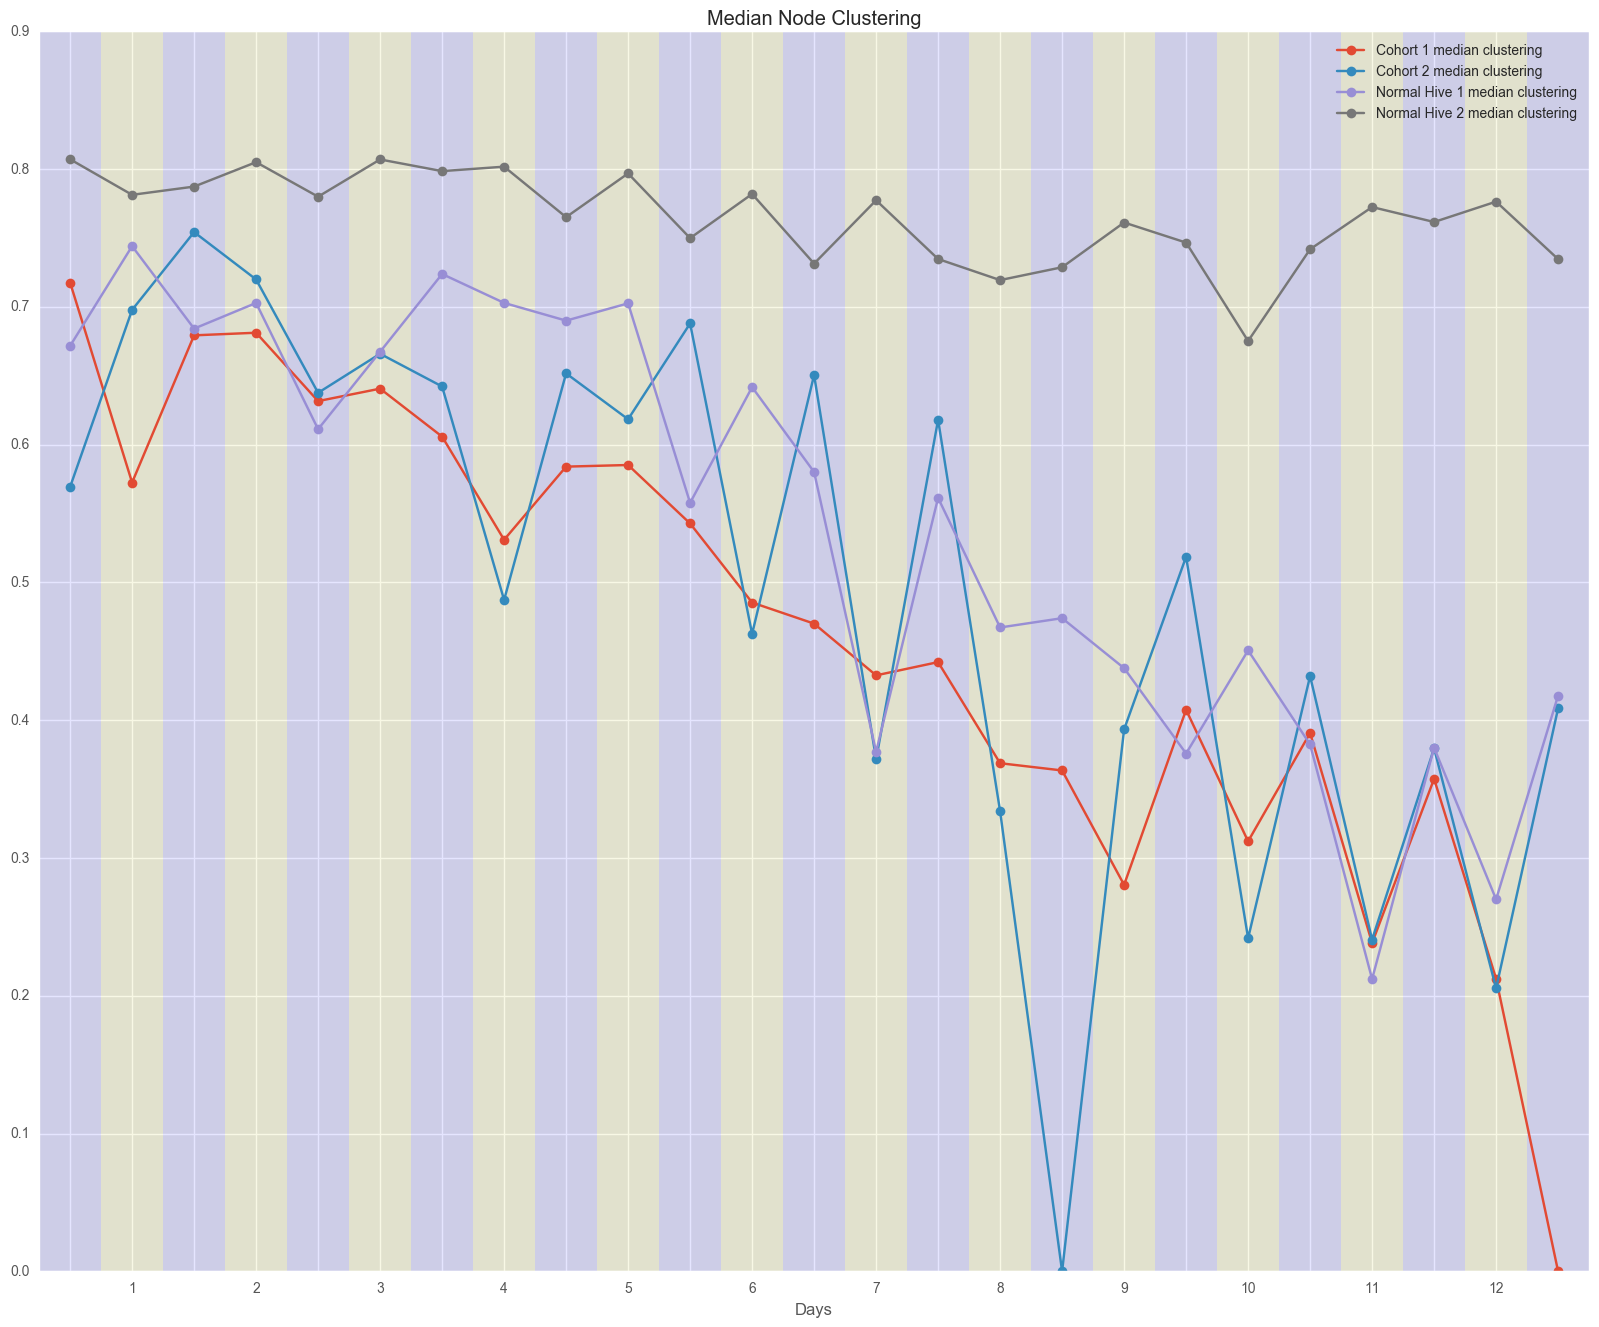

In [17]:
x_len = 24
day_nums = []

[day_nums.extend(['', ii + 1]) for ii in range(int(x_len / 2))]

for i, df in enumerate(real_result_df_list):
    plt.plot(df['median_node_degree'][0:25], marker='o', label='{} {}'.format(hive_names[i], 'median node degree'))
    plt.title('Median Node Degree')
    plt.xlabel('Days')
    plt.xticks(range(x_len), day_nums)
    plt.xlim(-0.5,24.5)
    plt.legend(loc='upper right')
    
for j, time_period in enumerate(real_result_df_list[0]['time_period'][0:25]):
    if time_period == 'night':
        plt.axvspan(j - 0.5, j + 0.5, facecolor='b', alpha=0.1, edgecolor='none')
    else:
        plt.axvspan(j - 0.5, j + 0.5, facecolor='y', alpha=0.1, edgecolor='none')
plt.show()

for i, df in enumerate(real_result_df_list):
    plt.plot(df['median_density'][0:25], marker='o', label='{} {}'.format(hive_names[i], 'median density'))
    plt.title('Median Node Density')
    plt.xlabel('Days')
    plt.xticks(range(x_len), day_nums)
    plt.xlim(-0.5,24.5)
    plt.legend(loc='upper right')


for j, time_period in enumerate(real_result_df_list[0]['time_period'][0:25]):
    if time_period == 'night':
        plt.axvspan(j - 0.5, j + 0.5, facecolor='b', alpha=0.1, edgecolor='none')
    else:
        plt.axvspan(j - 0.5, j + 0.5, facecolor='y', alpha=0.1, edgecolor='none')
plt.show()

for i, df in enumerate(real_result_df_list):
    plt.plot(df['median_clustering'][0:25], marker='o', label='{} {}'.format(hive_names[i], 'median clustering'))
    plt.title('Median Node Clustering')
    plt.xlabel('Days')
    plt.xticks(range(x_len), day_nums)
    plt.xlim(-0.5,24.5)
    plt.legend(loc='upper right')
    
for j, time_period in enumerate(real_result_df_list[0]['time_period'][0:25]):
    if time_period == 'night':
        plt.axvspan(j - 0.5, j + 0.5, facecolor='b', alpha=0.1, edgecolor='none')
    else:
        plt.axvspan(j - 0.5, j + 0.5, facecolor='y', alpha=0.1, edgecolor='none')
plt.show()

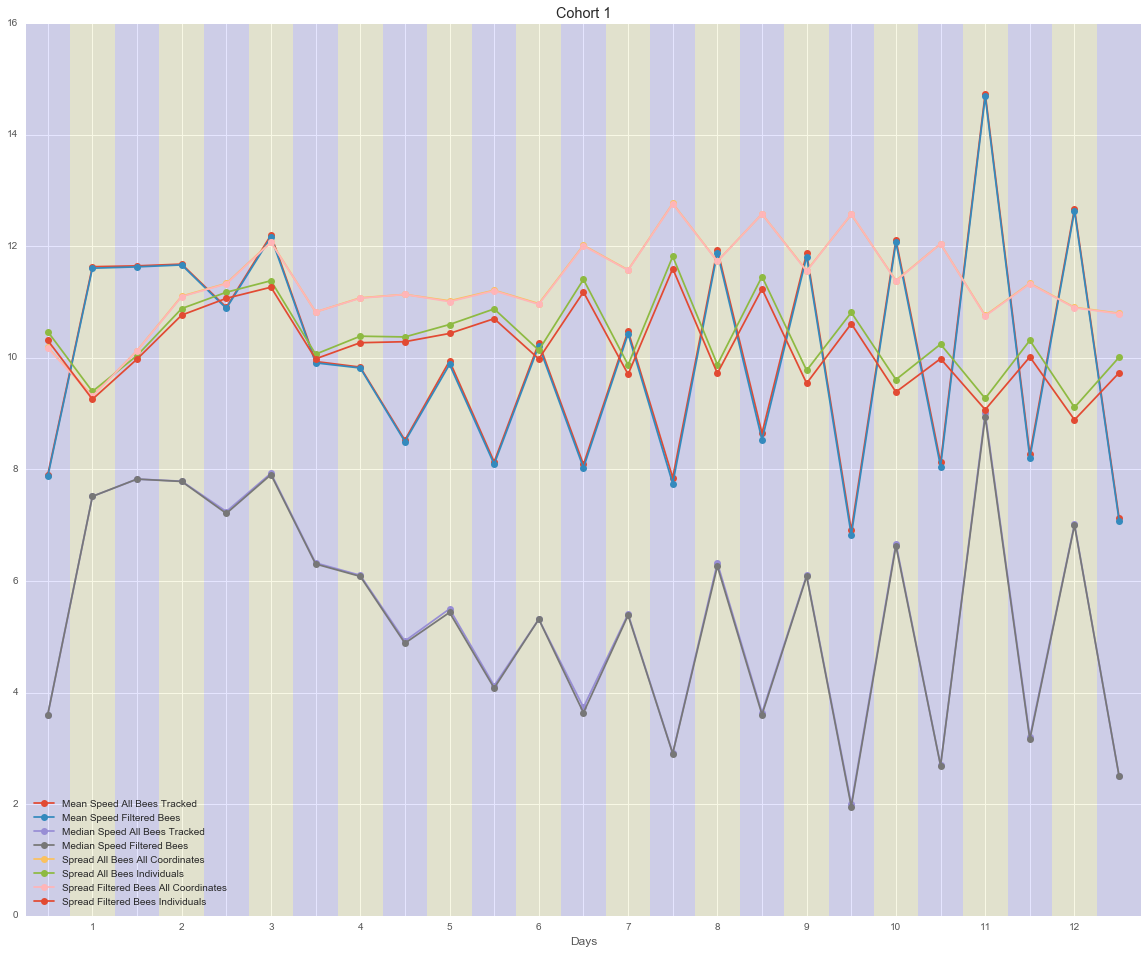

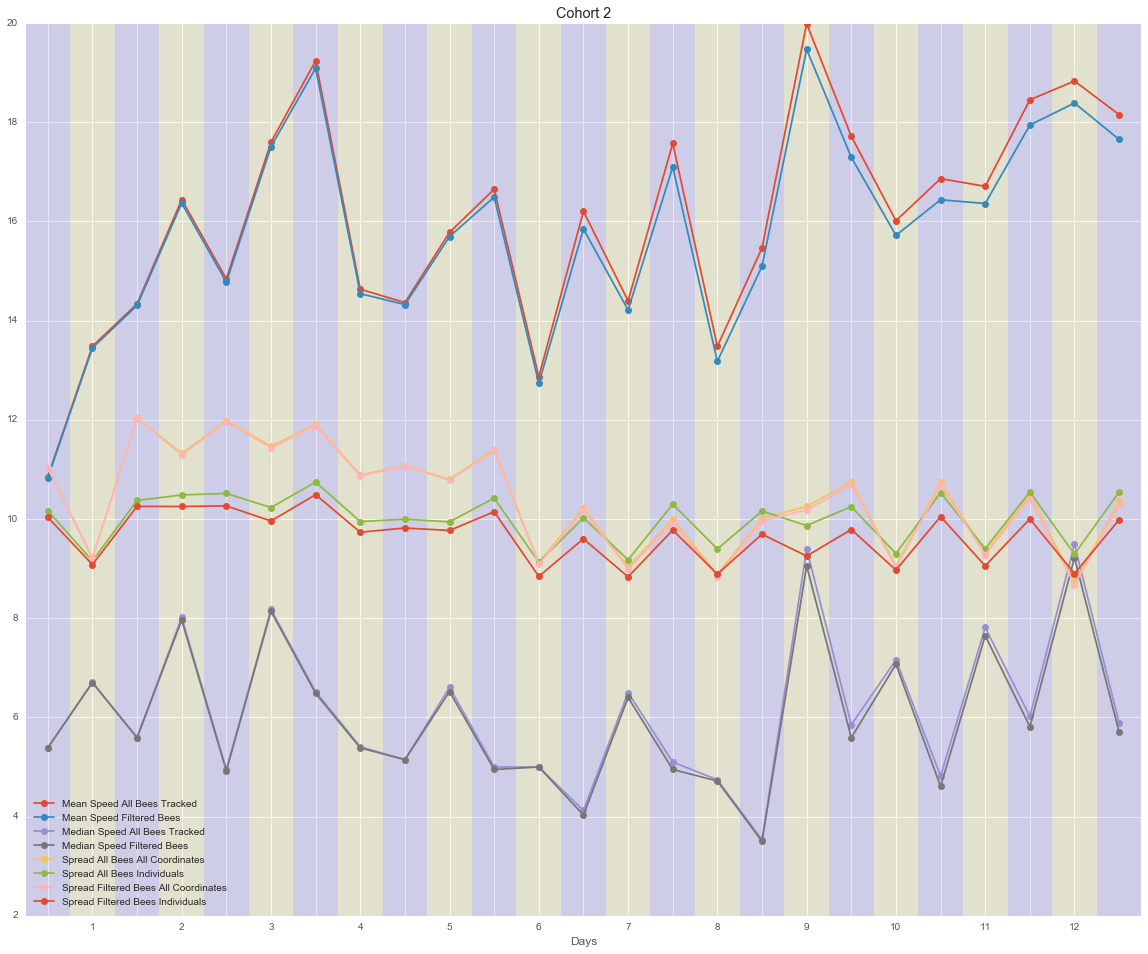

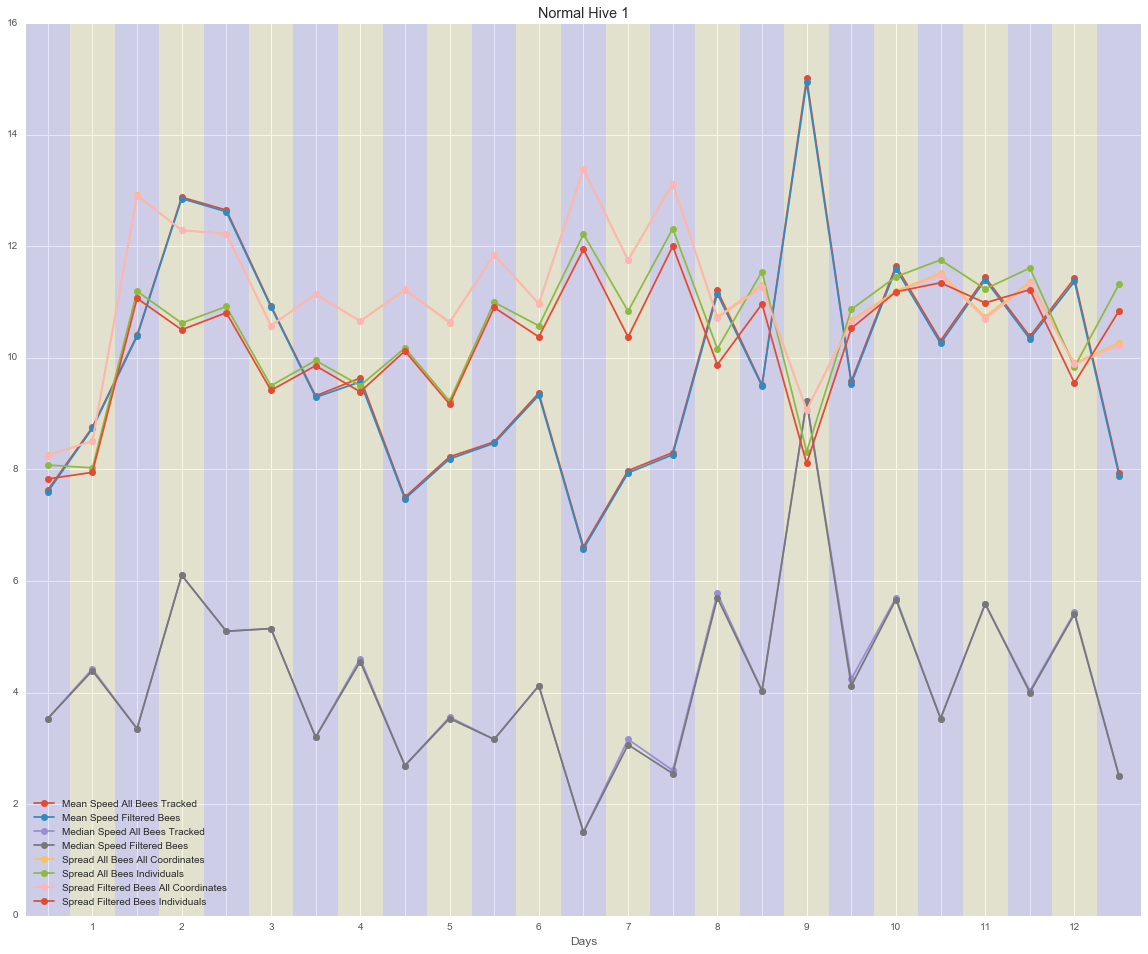

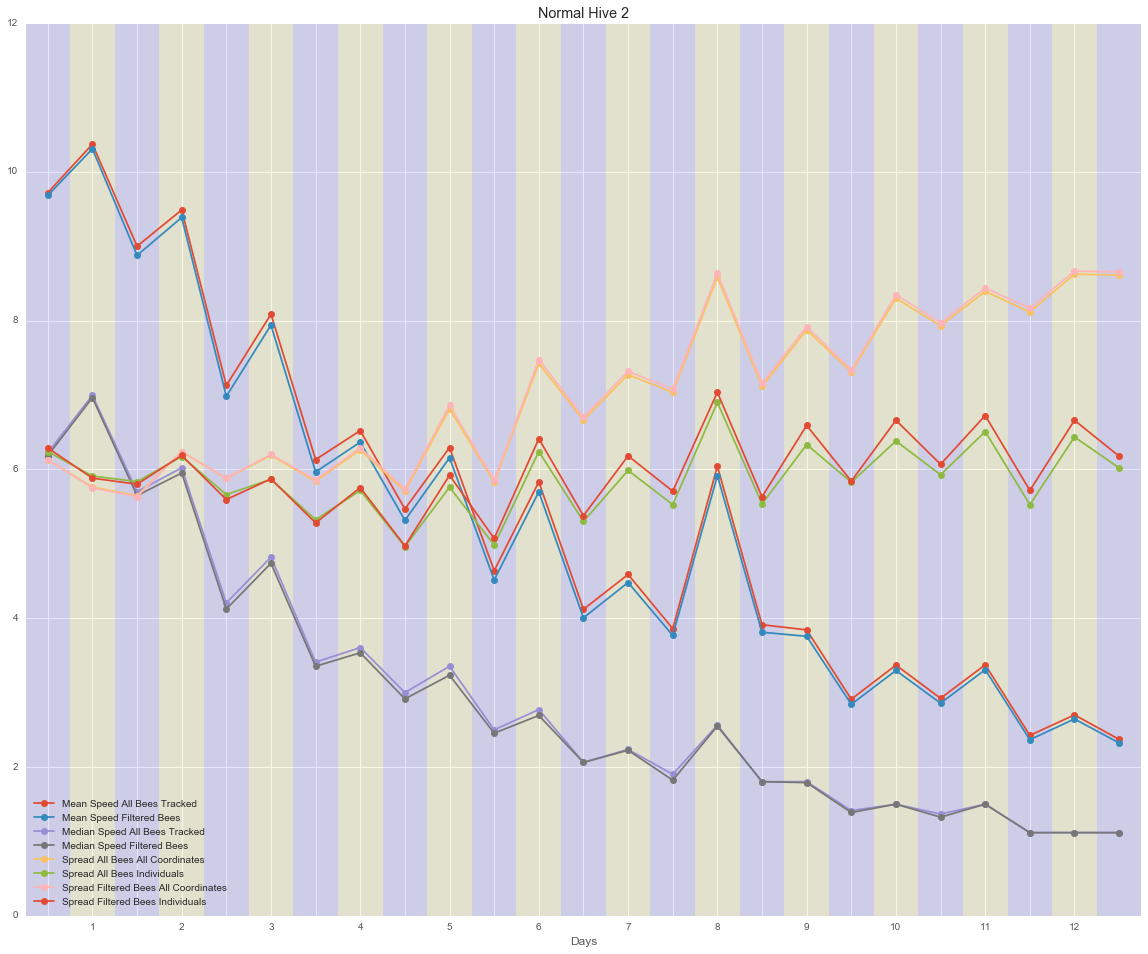

In [5]:
extended_metrics = ['mean_all_tracked_speeds', 'mean_min_tracked_speeds', 'median_all_tracked_speeds', 'median_min_tracked_speeds', 'spread_all_tracked_all_xy', 'spread_all_tracked_individuals', 'spread_min_tracked_all_xy', 'spread_min_tracked_individuals']
metrics_names = ['Mean Speed All Bees Tracked', 'Mean Speed Filtered Bees', 'Median Speed All Bees Tracked', 'Median Speed Filtered Bees', 'Spread All Bees All Coordinates', 'Spread All Bees Individuals', 'Spread Filtered Bees All Coordinates', 'Spread Filtered Bees Individuals']

for i, df in enumerate(real_result_df_list):
    for j, metric in enumerate(extended_metrics):
        plt.plot(df[metric][0:25], marker='o', label='{}'.format(metrics_names[j]))
    
    x_len = 24
    day_nums = []
    [day_nums.extend(['', ii + 1]) for ii in range(int(x_len / 2))]
    
    plt.title(hive_names[i])
    plt.xlabel('Days')
    plt.xlim(-0.5,24.5)
    plt.xticks(range(x_len), day_nums)

    plt.legend(loc='lower left')

    for j, time_period in enumerate(real_result_df_list[0]['time_period'][0:25]):
        if time_period == 'night':
            plt.axvspan(j - 0.5, j + 0.5, facecolor='b', alpha=0.1, edgecolor='none')
        else:
            plt.axvspan(j - 0.5, j + 0.5, facecolor='y', alpha=0.1, edgecolor='none')
    plt.show()

In [6]:
weather_metrics = ['cloudCover','dewPoint','humidity','pressure','temperature','visibility','windSpeed']
weather_metrics_names = ['Cloud Cover','Dewpoint','Humidity','Pressure','Temperature','Visibility','Wind Speed']

weather_files = ['../results/2_weather.csv', '../results/3_weather.csv', '../results/4_weather.csv', '../results/1_weather.csv']

weather_df_list = []
for file in weather_files:
    df = pd.read_csv(file, comment='#', header = 0)
    weather_df_list.append(df)

print(weather_df_list[0].dtypes)
weather_df_list[0].head()

apparentTemperature    float64
cloudCover             float64
date                    object
dewPoint               float64
hour                   float64
humidity               float64
precipType              object
pressure               float64
temperature            float64
time_period             object
visibility             float64
windBearing            float64
windSpeed              float64
dtype: object


apparentTemperature  cloudCover        date   dewPoint  hour  humidity  \
0            19.400000    0.000000  2016-02-26  12.720000   NaN  0.664286   
1            26.071429    0.310000  2016-02-26   9.255714   NaN  0.358571   
2            17.311429    0.666667  2016-02-27  13.911429   NaN  0.805714   
3            21.164286    0.916667  2016-02-27  13.742857   NaN  0.628571   
4            16.374286    0.666667  2016-02-28  13.510000   NaN  0.834286   

  precipType     pressure  temperature time_period  visibility  windBearing  \
0       rain  1012.294286    19.400000       night       9.980   197.285714   
1       rain  1014.447143    26.835714         day      11.362   220.000000   
2       rain  1017.654286    17.311429       night       9.980   109.714286   
3       rain  1019.222857    21.164286         day       9.980    67.857143   
4       rain  1017.848571    16.374286       night       9.980    76.428571   

   windSpeed  
0   1.692857  
1   2.835714  
2   2.495714  
3   3.130000  
4   1.985714

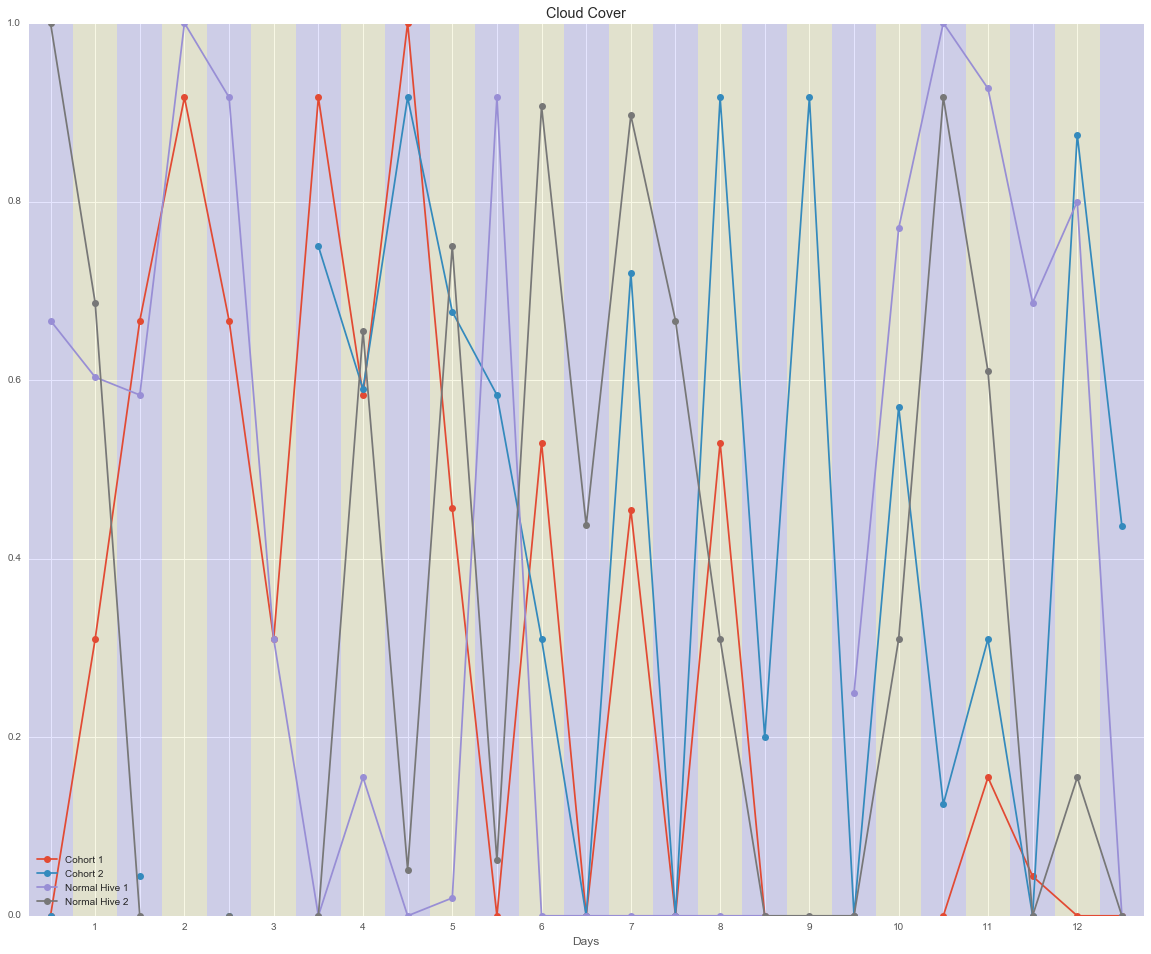

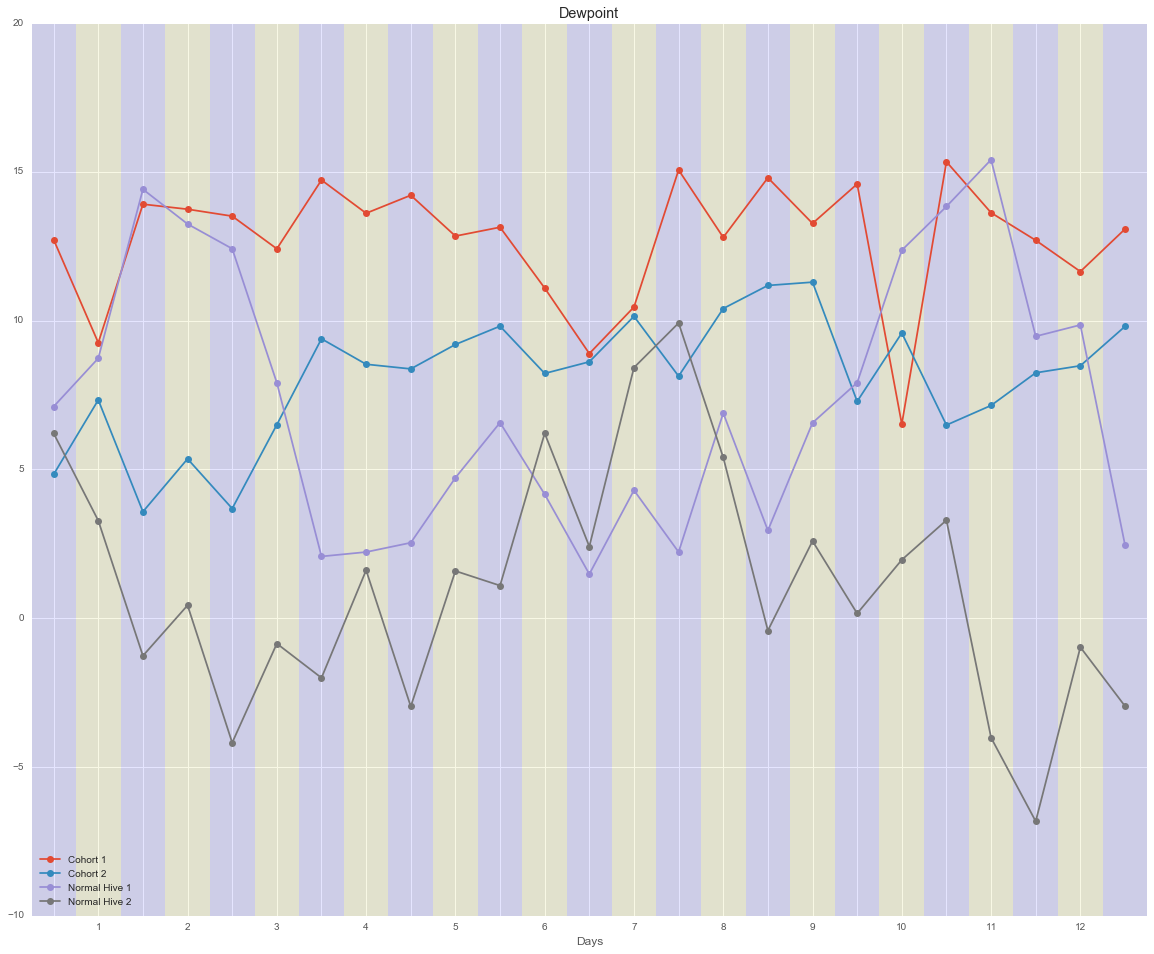

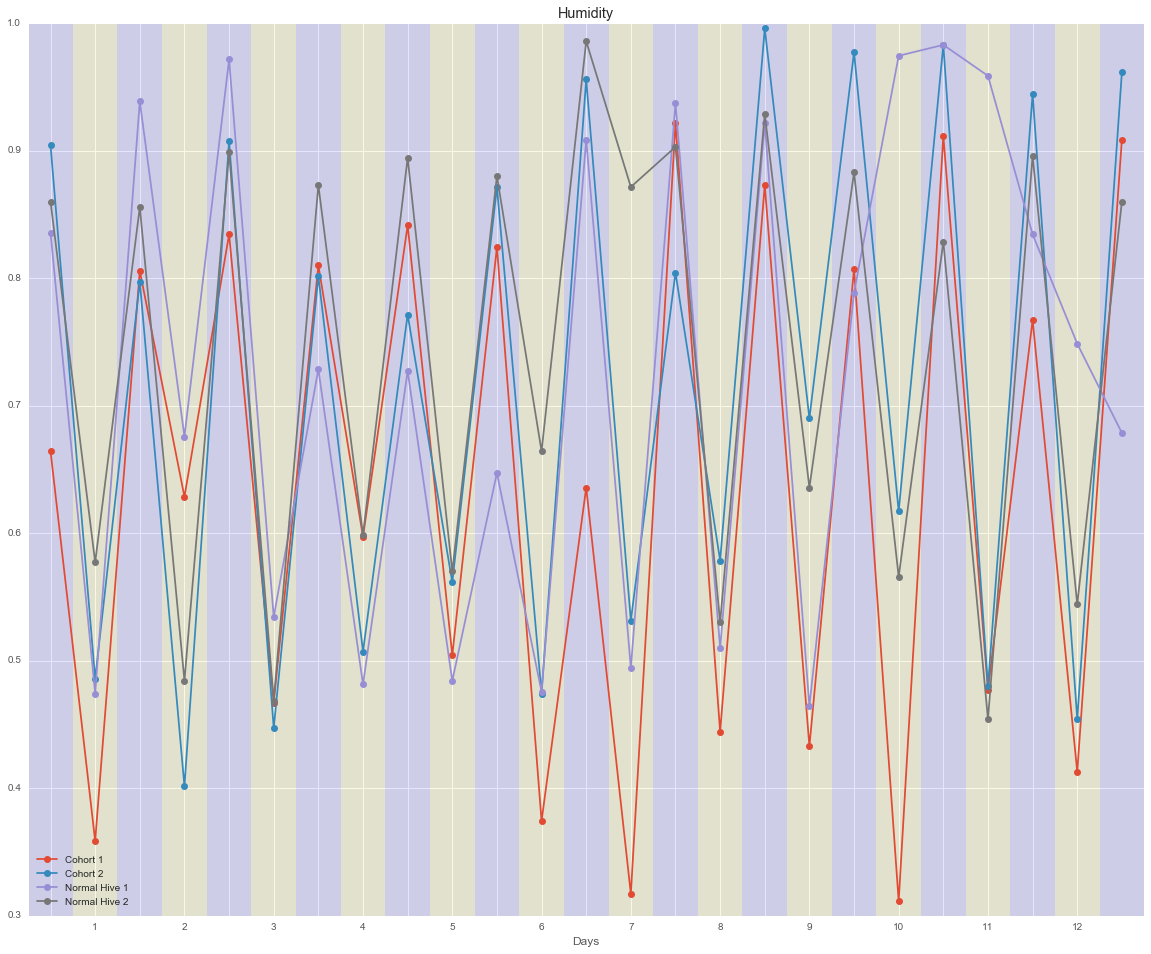

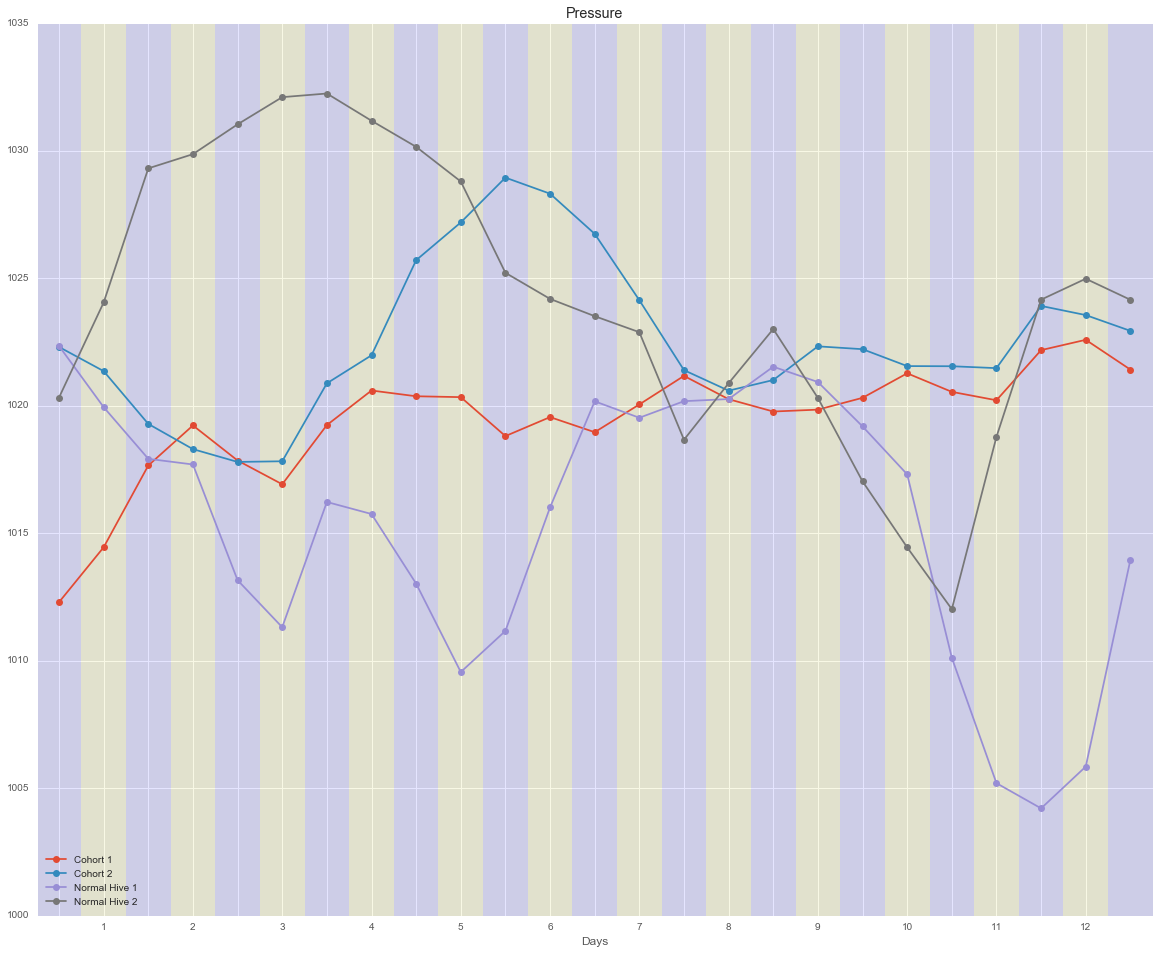

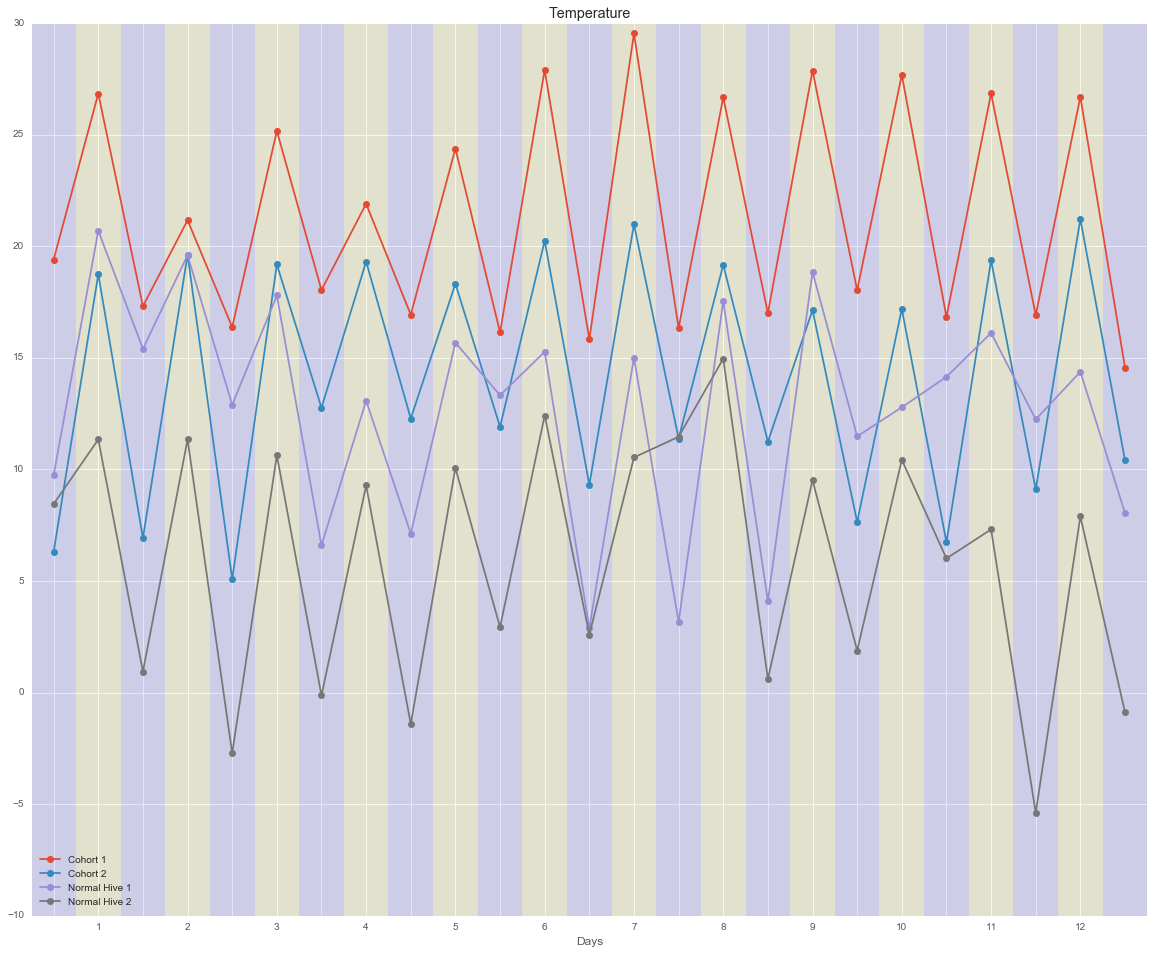

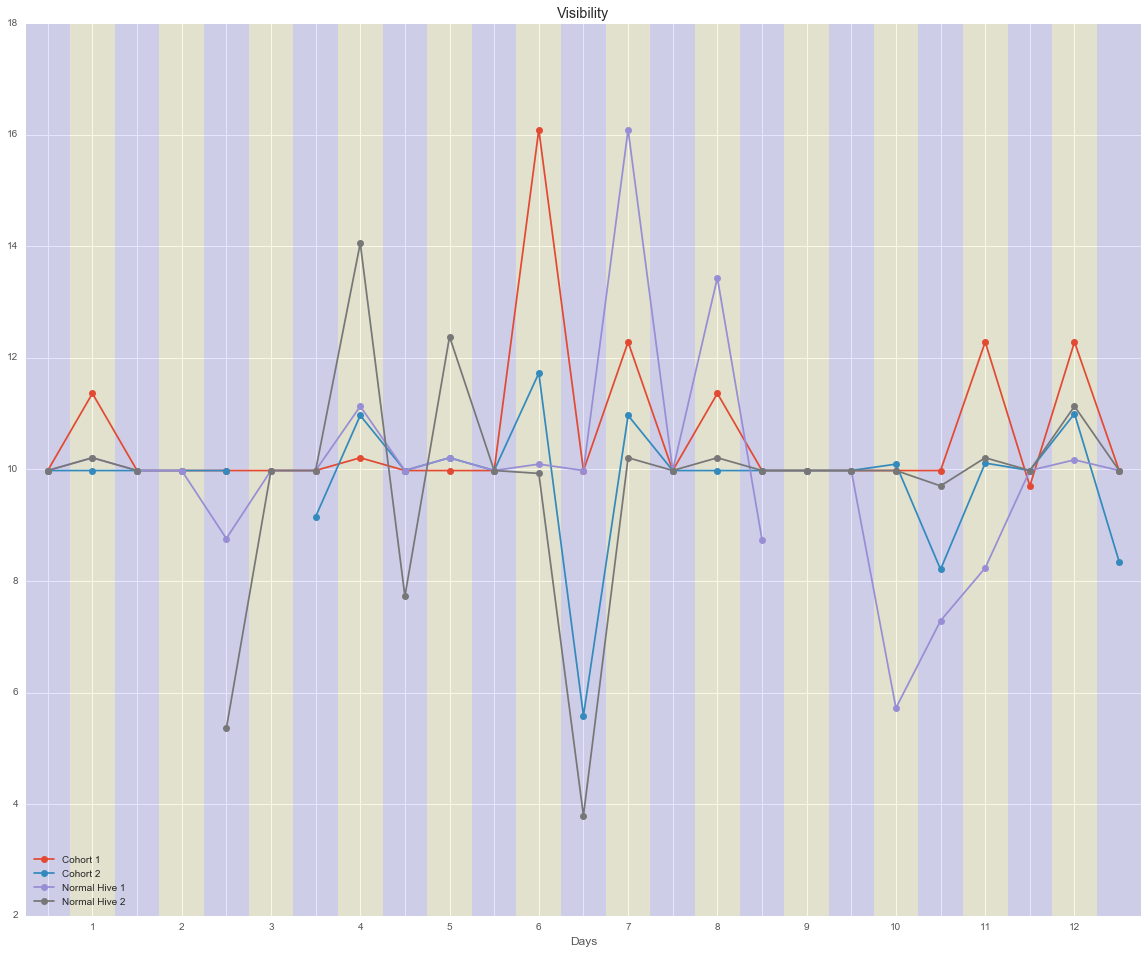

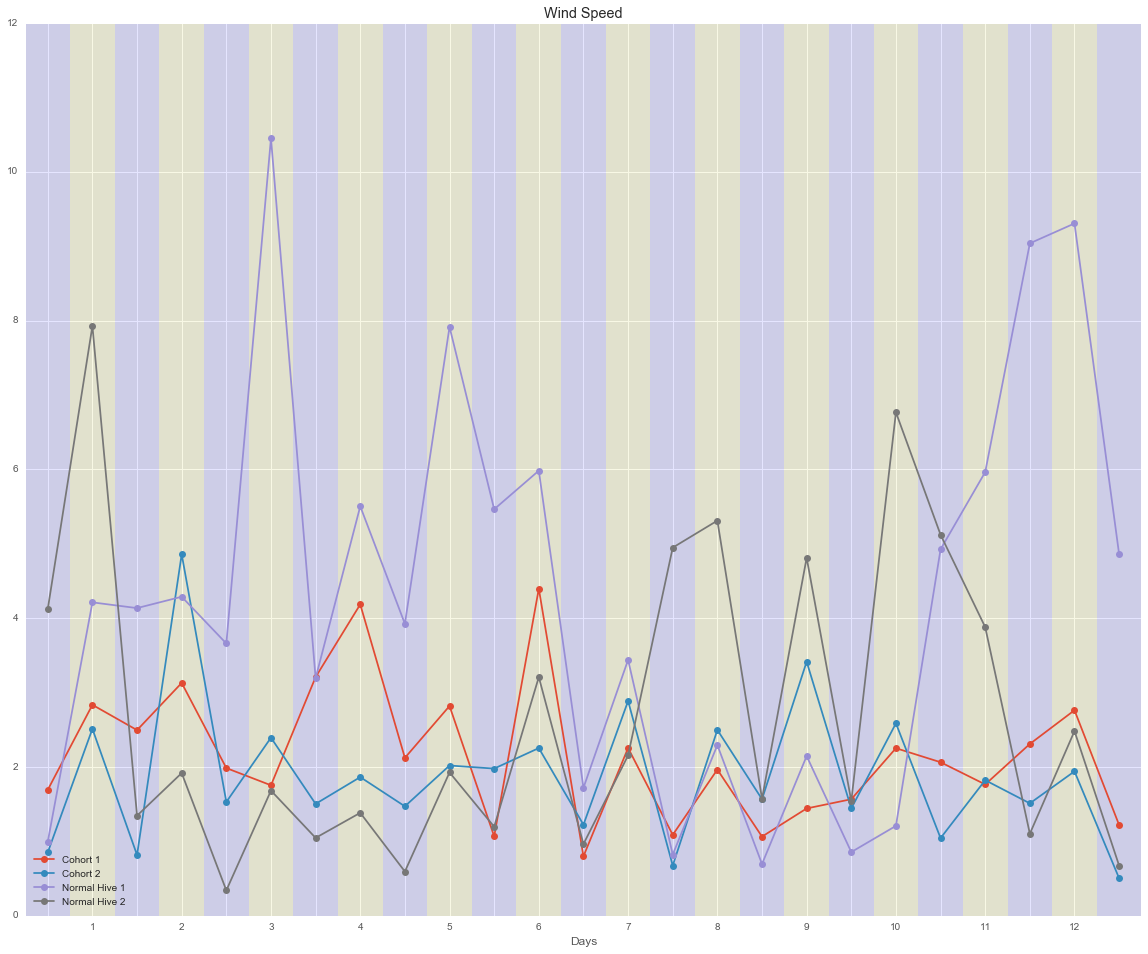

In [7]:
for jj, metric in enumerate(weather_metrics):
    
    x_len = 24
    day_nums = []
    [day_nums.extend(['', i + 1]) for i in range(int(x_len / 2))]

    for i, df in enumerate(weather_df_list):
        plt.plot(df[metric][0:25], marker='o', label='{}'.format(hive_names[i]))
    plt.title(weather_metrics_names[jj])
    plt.xlabel('Days')
    plt.xticks(range(x_len), day_nums)
    plt.xlim(-0.5,24.5)
    plt.legend(loc='lower left')

    for j, time_period in enumerate(weather_df_list[0]['time_period'][0:25]):
        if time_period == 'night':
            plt.axvspan(j - 0.5, j + 0.5, facecolor='b', alpha=0.1, edgecolor='none')
        else:
            plt.axvspan(j - 0.5, j + 0.5, facecolor='y', alpha=0.1, edgecolor='none')
    plt.show()